# Аналитика данных компании Gectaro

## Введение

<span style="font-weight: 600">Объект исследования</span>\
Gectaro — это облачный сервис для автоматизации управления строительством и ремонтом.\
Компания продает софт с платной подпиской в сегменте B2B (наиболее частый срок подписки 12-24 месяца), предназначенный для управления процессами в сфере строительства и ремонта.\
B2B значит, что клиентом, подписчиком является другая компания. Рассматриваем эти три слова как синонимичные.
<br><br>
<span style="font-weight: 600">Проблема</span>\
Уход из сервиса большого количества подписчиков-компаний и непродление подписки.
<br><br>
<span style="font-weight: 600">Цель проекта</span>\
Разобраться в причинах оттока клиентов и предложить решения по их минимизации.
<br><br>
<span style="font-weight: 600">Задачи</span>
* Проанализировать имеющиеся данные.
* Составить портреты наиболее типичных клиентов.
* Определить ключевые признаки для компаний, наличие которых (или их появление) влияет на отмену (отсутствие оплаты) подписки.
<br><br>

<span style="font-weight: 600">План действий (оглавление)</span>
1. Подготовка
2. Активности | activities.csv
    1. Обзор
    2. Предобработка
3. Платежи | billing.csv
    1. Обзор
    2. Предобработка
4. Компании | companies.csv
    1. Обзор
    2. Предобработка
5. Сотрудники | people.csv
    1. Обзор
    2. Предобработка
6. Исследовательский анализ данных.
    1. Описание числовых данных
    2. Описание категориальных данных
7. Выводы
8. Исследовательский анализ данных.
    1. Анализ по всем компаниям.
        1. Активности | activities.csv.
        2. Платежи | billing.csv
        3. Компании | companies.csv
        4. Сотрудники | people.csv
    2. Рефлексия
    3. Клиенты Gectaro в настоящее время (актуальные компании)
        1. Фильтрация компаний
        2. Запись актуальных компаний
    4. Анализ по актуальным компаниям
        1. Активность актуальных компаний
            1. Корреляция переменных
            2. Суммы активностей
            3. Суммы активностей каждой компании за все месяцы
            4. Корреляция переменных
            5. Суммы активностей всех компаний за каждый месяц
        2. Как актуальные компании платят по счётам
        3. Портрет компаний
            1. Направление деятельности
            2. Кол-во регистраций компаний в Gectaro по годам
            3. Кол-во сотрудников в компаниях
9. Итоговая рефлексия
    1. Введение и сегментирование компаний
    2. Идентификация проблемы
    3. Активности компаний внутри сервиса
    4. Тарифы
    5. Направление деятельности
    6. Число сотрудников в компаниях
    7. Итог итогов.
    
<br><br>

<span style="font-weight: 600">Исходные данные</span>\
Даны 4 датасета:
* Помесячная активность компаний.
* Платежи.
* Клиенты-компании.
* Сотрудники компаний.
<br><br>

<br>

<br>

## Подготовка

Импортируем библиотеки.

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# для считывания файлов
import requests
from urllib.parse import urlencode
from io import BytesIO

<br>

Прочитаем данные из `Yandex Disk` и запишем их в свои переменные.

In [2]:
# Базовый URL для загрузки данных
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

# Словарь URL для загрузки каждого файла
file_urls = {'activities': 'https://disk.yandex.ru/d/fyCpR_tofoEHFQ',
             'billings': 'https://disk.yandex.ru/d/Jhi3YPxIoQklEA',
             'companies': 'https://disk.yandex.ru/d/gdOqTtA6-QbBhQ',
             'people': 'https://disk.yandex.ru/d/Fv6w_AjVBn5WmQ'}

# Словарь для хранения загруженных данных
dfs = {}

# Получение загрузочной ссылки и загрузка каждого файла
for file_name, url in file_urls.items():
    # Получаем загрузочную ссылку
    final_url = base_url + urlencode(dict(public_key=url))
    response = requests.get(final_url)
    download_url = response.json()['href']
    
    # Загружаем файл и считываем его как DataFrame
    download_response = requests.get(download_url)
    dfs[file_name] = pd.read_csv(BytesIO(download_response.content))

# Присваиваем переменным значения
activities_df = dfs['activities']
billing_df = dfs['billings']
companies_df = dfs['companies']
people_df = dfs['people']

В каждом датасете были паразитные колонки-индексы, которые сохранились вместе с экспортом из источника.\
Выше мы их приняли как индексы. Затем мы избавились от этих индексов, сбросив их.

<br>

Каждую таблицу следует обозреть и предобработать.

<br>

## Активности | `activities.csv`

Первая на очереди — таблица с активностями `activities.csv`.\
Каждая строка показывает как определённая компания вела активность в конкретном месяце.

### Обзор

In [3]:
activities_df

Unnamed: 0  company_id                      month  \
0              0           1  2019-09-01 00:00:00+00:00   
1              1           1  2019-12-01 00:00:00+00:00   
2              2           1  2020-04-01 00:00:00+00:00   
3              3           1  2020-07-01 00:00:00+00:00   
4              4          21  2020-01-01 00:00:00+00:00   
...          ...         ...                        ...   
6311        6552        7882  2023-12-01 00:00:00+00:00   
6312        6553        8495  2024-02-01 00:00:00+00:00   
6313        6554        8513  2024-02-01 00:00:00+00:00   
6314        6555        8603  2023-11-01 00:00:00+00:00   
6315        6556        9698  2024-03-01 00:00:00+00:00   

      company-month-billing  company-month-stocks  company-month-backups  \
0                       1.0                   0.0                    0.0   
1                       1.0                   0.0                    0.0   
2                       4.0                   1.0                    0.0   
3                       1.0                   7.0                    3.0   
4                       3.0                   0.0                    0.0   
...                     ...                   ...                    ...   
6311                    0.0                   0.0                    0.0   
6312                    0.0                   0.0                    0.0   
6313                    0.0                   0.0                    0.0   
6314                    0.0                   0.0                    0.0   
6315                    0.0                   0.0                    0.0   

      company-month-projects  company-month-contractors  \
0                        7.0                        0.0   
1                        2.0                        1.0   
2                        1.0                        6.0   
3                        5.0                        0.0   
4                        1.0                        0.0   
...                      ...                        ...   
6311                     0.0                        0.0   
6312                     0.0                        0.0   
6313                     0.0                        0.0   
6314                     0.0                        0.0   
6315                     0.0                        0.0   

      company-month-resource_orders  
0                               0.0  
1                               0.0  
2                               0.0  
3                               0.0  
4                               0.0  
...                             ...  
6311                            1.0  
6312                            1.0  
6313                            2.0  
6314                            2.0  
6315                            1.0  

[6316 rows x 9 columns]

$6$ $316$ строк и $8$ колонок:

`company_id` — идентификатор компании;

`month` — отчётный месяц;

`company-month-billing` — количество счетов, выставленных компанией-клиентом контрагенту;

`company-month-stocks` — месячное количество складов (аренда, заказы и т.д.), используемых компанией;

`company-month-backups` — месячное количество бэкапов компании (сколько раз компания сохранила свои данные);

`company-month-projects` — месячное количество проектов компании;

`company-month-contractors` — месячное количество контрагентов компании  (компании/лица, с которыми эта компания имеет дела);

`company-month-resource_orders` — месячное количество заказов материалов компании у контрагентов.

<br>

В ТЗ указано, что таблица должна быть сгруппирована по компаниям и отсортирована по компаниям, а в пределах каждой компании — отсортирована по месяцам.\
Сделаем же это.

In [4]:
activities_df = activities_df.sort_values(by=['company_id', 'month']).reset_index(drop=True)

<br>

Иерархия в сервисе **Gectaro** кажется такой:
1. Во главе стоит сервис Gectaro.
2. Компании, зарегистрировавшиеся в Gectaro.
3. Контрагенты этих компаний.

<br>

Посмотрим описание данных.

In [5]:
activities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6316 entries, 0 to 6315
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     6316 non-null   int64  
 1   company_id                     6316 non-null   int64  
 2   month                          6316 non-null   object 
 3   company-month-billing          6316 non-null   float64
 4   company-month-stocks           6316 non-null   float64
 5   company-month-backups          6316 non-null   float64
 6   company-month-projects         6316 non-null   float64
 7   company-month-contractors      6316 non-null   float64
 8   company-month-resource_orders  6316 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 444.2+ KB


Пропуски не наблюдаются.

Но у всех колонок неверный тип данных. Это нужно исправить следующим образом:
* `company_id` (`int64` > `object`) — никаких математических операций не нужно делать с этой колонкой, поэтому тип данных должен быть `object`.

* `month` (`object` > `datetime`) — дата должна иметь свой тип данных.

* `company-month-billing` (`float64` > `int64`)

* `company-month-stocks` (`float64` > `int64`)

* `company-month-backups` (`float64` > `int64`)

* `company-month-projects` (`float64` > `int64`)

* `company-month-contractors` (`float64` > `int64`)

* `company-month-resource_orders` (`float64` > `int64`)

<br>

### Предобработка

**Смена типа данных**

Поменяем тип данных во всех колонках.

In [6]:
# int > object
activities_df['company_id'] = activities_df['company_id'].astype('object')

# object > datetime
activities_df['month'] = pd.to_datetime(activities_df['month'])
# усечение времени до даты, отчего вновь стало object, затем object > datetime
activities_df['month'] = pd.to_datetime(activities_df['month'].dt.date)

# float > int
columns_to_int = ['company-month-billing', 'company-month-stocks', 'company-month-backups',
                  'company-month-projects', 'company-month-contractors', 'company-month-resource_orders']

for column in columns_to_int:
    activities_df[column] = activities_df[column].astype('int')

<br>

Проверим, поменялись ли типы.

In [7]:
activities_df.dtypes

Unnamed: 0                                int64
company_id                               object
month                            datetime64[ns]
company-month-billing                     int32
company-month-stocks                      int32
company-month-backups                     int32
company-month-projects                    int32
company-month-contractors                 int32
company-month-resource_orders             int32
dtype: object

Всё ок.

<br>

**Дубликаты и аномалии**

Посмотрим, есть ли полные дубликаты.

In [8]:
activities_df.duplicated().sum()

0

Явных дубликатов нет.

<br>

Посмотрим числовое описание данных.

In [9]:
activities_df.describe()

Unnamed: 0  company-month-billing  company-month-stocks  \
count  6316.000000            6316.000000           6316.000000   
mean   3159.237650               0.375079              7.408486   
std    1826.512344               0.800281             13.107824   
min       0.000000               0.000000              0.000000   
25%    1578.750000               0.000000              1.000000   
50%    3157.500000               0.000000              3.000000   
75%    4736.250000               1.000000              8.000000   
max    6556.000000              16.000000            166.000000   

       company-month-backups  company-month-projects  \
count            6316.000000             6316.000000   
mean                1.178277                7.262666   
std                 3.135253               13.899203   
min                 0.000000                0.000000   
25%                 0.000000                1.000000   
50%                 0.000000                2.000000   
75%                 0.000000                7.000000   
max                22.000000              221.000000   

       company-month-contractors  company-month-resource_orders  
count                6316.000000                    6316.000000  
mean                    7.906428                      10.346105  
std                    27.966199                      40.569956  
min                     0.000000                       0.000000  
25%                     0.000000                       0.000000  
50%                     2.000000                       0.000000  
75%                     7.000000                       4.000000  
max                  1014.000000                    1182.000000

На беглый взгляд, с данными всё в порядке.\
Если доказывать почему, то можно просидеть до полуночи.\
Анализ будет позже.

<br>

In [10]:
# случайная выборка из 5 строк
activities_df.sample(5)

Unnamed: 0 company_id      month  company-month-billing  \
6066        1517       8702 2023-09-01                      1   
960          345       1339 2020-12-01                      1   
281         1721        483 2020-09-01                      0   
6116        5195       8862 2023-10-01                      0   
567         1841        865 2020-05-01                      0   

      company-month-stocks  company-month-backups  company-month-projects  \
6066                    11                      0                       9   
960                     61                      9                      56   
281                      6                      0                       6   
6116                     5                      4                       4   
567                      1                      0                       1   

      company-month-contractors  company-month-resource_orders  
6066                         25                              2  
960                          19                              0  
281                           0                              0  
6116                         30                             15  
567                           0                              0

Неявных дубликатов быть не может.

<br>

<span style="font-weight: 600">Обзор и предобработка таблицы `activities_df` завершены.</span>

<br>

<br>

## Платежи | `billing.csv`

Далее идёт таблица с платежами `billing.csv`.

### Обзор

In [11]:
billing_df

Unnamed: 0  Unnamed: 0.1     id  user_id  company_id  billing_tariff_id  \
0              4             4   3050      567         512                  3   
1              6             6   3051     2861        2474                  7   
2             16            16   3059     1902        1645                  2   
3             18            18   3065     2352        2035                  7   
4             24            24   3062     1074         926                  3   
...          ...           ...    ...      ...         ...                ...   
3475       14341         14341  14362    14513       10848                  2   
3476       14343         14343  14364     4980        4004                 17   
3477       14344         14344  14365    13378        9841                  7   
3478       18868         18868  13441    10388        7745                  2   
3479       18953         18953  18932    10091        7526                  2   

      payed_until  is_payed  created_at  updated_at  billing_tariff_price_id  \
0      1640153302     False  1608617302  1608617302                     12.0   
1      1640131200      True  1608626162  1608626181                     23.0   
2      1616577484     False  1608801484  1608801484                      6.0   
3      1643500799     False  1608883175  1608883175                     23.0   
4      1611964800      True  1608814072  1608899674                      9.0   
...           ...       ...         ...         ...                      ...   
3475   1742342399     False  1710258814  1710258814                      8.0   
3476   1741737600     False  1710263717  1710263729                      5.0   
3477   1741824000     False  1710265949  1710266009                     23.0   
3478   1745884800      True  1708074224  1710325318                      8.0   
3479   1714435200      True  1710325446  1710325577                      8.0   

                                                comment      pay_date  
0                                                   NaN           NaN  
1                                                   NaN  1.608626e+09  
2                                                   NaN           NaN  
3                                                   NaN           NaN  
4                                                   NaN  1.609200e+09  
...                                                 ...           ...  
3475                                                NaN           NaN  
3476                                                NaN           NaN  
3477                                                NaN  1.710461e+09  
3478  13,03,24 - добавили 3 месяца к подписке из-за ...  1.708042e+09  
3479                    13,03,24- убрали сводный график  1.710326e+09  

[3480 rows x 13 columns]

$3$ $480$ строк и $12$ колонок:

`Unnamed: 0.1` — мусорная колонка со старыми экспортными индексами. Нужно удалить;

`id` — очередная мусорная колонка с ничего не значащими идентификаторами. Нужно удалить;

`user_id` — идентификатор ответственного пользователя, который принимает счёт;

`company_id` — идентификатор компании-пользователя;

`billing_tariff_id` — идентификатор тарифного плана:

1. Старт — 4, 7, 8, 11, 19;
2. Базовый — 2, 17;
3. Бизнес — 9, 20;
4. Профи — 3, 10, 13, 21;
6. Архивный — 6 (не используется).

`payed_until` — дата, до которой подписка компании действует;

`is_payed` — статус оплаты;

`created_at` — дата создания;

`updated_at` — дата обновления;

`billing_tariff_price_id` — id стоимости тарифа. В разное время или для разных клиентов  один и тот же тариф может стоить по-разному;

`comment` — комментарии;

`pay_date` — дата платежа.

В колонках с датами даты сами выражены в формате `Unix Epoch time`. Это означает количество секунд, прошедших с начала эпохи Unix, которая обычно определяется как $1$ января $1970$ года.

<br>

Посмотрим описание данных.

In [12]:
billing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3480 non-null   int64  
 1   Unnamed: 0.1             3480 non-null   int64  
 2   id                       3480 non-null   int64  
 3   user_id                  3480 non-null   int64  
 4   company_id               3480 non-null   int64  
 5   billing_tariff_id        3480 non-null   int64  
 6   payed_until              3480 non-null   int64  
 7   is_payed                 3480 non-null   bool   
 8   created_at               3480 non-null   int64  
 9   updated_at               3480 non-null   int64  
 10  billing_tariff_price_id  3480 non-null   float64
 11  comment                  745 non-null    object 
 12  pay_date                 1108 non-null   float64
dtypes: bool(1), float64(2), int64(9), object(1)
memory usage: 329.8+ KB


У колонок `comment` и `pay_date` есть пропуски.

Есть неверные типы данных в потенциально полезных колонках:
* `user_id`, `company_id`, `billing_tariff_id` (`int64` > `object`) — никаких математических операций не нужно делать с этими колонками, поэтому тип данных должен быть object.
* `billing_tariff_price_id` (`float64` > `object`) — аналогичная ситуация.
* `payed_until`, `created_at`, `updated_at`, `pay_date` (`int64` > `datetime`) — секунды в этих колонках нужно преобразовать в даты.


<br>

### Предобработка

**Удаление колонок**

Удалим мусорные колонки.

In [13]:
billing_df.drop(columns=['Unnamed: 0.1', 'id'], inplace=True)

<br>

**Смена типа данных**

Поменяем тип данных в колонках.

In [14]:
# список колонок, которые нужно преобразовать в object тип данных
billing_to_obj = ['user_id', 'company_id', 'billing_tariff_id']

# список колонок, которые нужно преобразовать в datetime тип данных
billing_to_dt = ['payed_until', 'created_at', 'updated_at', 'pay_date']

# преобразование float в object
billing_df['billing_tariff_price_id'] = billing_df['billing_tariff_price_id'].astype('int').astype('object')

# преобразование int в object
for column in billing_to_obj:
    billing_df[column] = billing_df[column].astype('object')

# преобразование int в datetime
for column in billing_to_dt:
    billing_df[column] = pd.to_datetime(billing_df[column], unit='s')

<br>

Проверим, поменялись ли типы.

In [15]:
billing_df.dtypes

Unnamed: 0                          int64
user_id                            object
company_id                         object
billing_tariff_id                  object
payed_until                datetime64[ns]
is_payed                             bool
created_at                 datetime64[ns]
updated_at                 datetime64[ns]
billing_tariff_price_id            object
comment                            object
pay_date                   datetime64[ns]
dtype: object

Всё ок.

<br>

**Дубликаты и аномалии**

Посмотрим, есть ли полные дубликаты.

In [16]:
billing_df.duplicated().sum()

0

Есть 1 явный дубликат.

<br>

In [17]:
billing_df[billing_df.duplicated(keep=False)]

Empty DataFrame
Columns: [Unnamed: 0, user_id, company_id, billing_tariff_id, payed_until, is_payed, created_at, updated_at, billing_tariff_price_id, comment, pay_date]
Index: []

Две одинаковые строки.

<br>

Удалим дубликат.

In [18]:
billing_df = billing_df.drop_duplicates().reset_index(drop=True)

<br>

<br>

In [19]:
# случайная выборка из 5 строк
billing_df.sample(5)

Unnamed: 0 user_id company_id billing_tariff_id         payed_until  \
370         1259    4573       3716                 7 2022-07-11 00:00:00   
2315        8309    4620       3750                 7 2024-01-19 00:00:00   
1371        5722    5598       4442                 2 2023-10-15 00:00:00   
3236       12464   10672       7939                10 2023-10-27 00:00:00   
739         2713       6          5                 2 2020-01-31 23:59:59   

      is_payed          created_at          updated_at  \
370      False 2021-07-07 16:29:31 2021-07-07 16:29:44   
2315      True 2022-05-13 10:05:58 2022-05-16 07:21:57   
1371     False 2021-10-15 09:33:51 2021-10-15 09:34:00   
3236      True 2023-05-15 09:24:36 2023-10-27 10:20:02   
739      False 2019-07-26 11:07:29 2019-07-26 11:07:29   

     billing_tariff_price_id  \
370                       23   
2315                      26   
1371                      35   
3236                      37   
739                        6   

                                                comment   pay_date  
370                                                 NaN        NaT  
2315                                    Стартовый 158+2 2022-05-16  
1371                                                NaN        NaT  
3236  26,05,23-- активация тарифа 24+4\r\n27,10,23- ... 2023-05-23  
739                                                 NaN        NaT

Ничто не указывает на неявные дубликаты.

<br>

**Пропуски**

Посмотрим процент пропусков в колонках.

In [20]:
pd.concat([round(billing_df.isna().mean() * 100, 1), billing_df.isna().sum()], axis=1)\
  .rename(columns={0: 'Процент пропусков',
                   1: 'Пропуски'})\
  .sort_values(by='Процент пропусков', ascending=False)

Процент пропусков  Пропуски
comment                               78.6      2735
pay_date                              68.2      2372
Unnamed: 0                             0.0         0
user_id                                0.0         0
company_id                             0.0         0
billing_tariff_id                      0.0         0
payed_until                            0.0         0
is_payed                               0.0         0
created_at                             0.0         0
updated_at                             0.0         0
billing_tariff_price_id                0.0         0

В колонке `comment` $78.6\%$ пропусков, а в колонке `pay_date` — $68.2\%$.

<br>

In [21]:
billing_df[billing_df['comment'].isna()].sample(5)

Unnamed: 0 user_id company_id billing_tariff_id         payed_until  \
3059       11469    9179       6939                 2 2025-01-26 00:00:00   
307         1094    3455       2922                 7 2022-03-24 00:00:00   
1106        4576    1902       1645                 2 2020-12-30 00:00:00   
592         1936       6          5                 7 2025-06-19 23:59:59   
1105        4559     755        667                 3 2020-10-28 23:59:59   

      is_payed          created_at          updated_at  \
3059     False 2023-07-26 08:24:09 2023-07-26 08:24:23   
307      False 2021-03-24 16:11:27 2021-03-24 16:11:43   
1106      True 2020-09-30 06:27:25 2020-09-30 06:27:46   
592      False 2021-07-16 12:13:21 2021-07-16 12:13:21   
1105     False 2020-09-28 13:00:13 2020-09-28 13:00:13   

     billing_tariff_price_id comment   pay_date  
3059                      24     NaN 2023-07-26  
307                       23     NaN 2021-03-26  
1106                       6     NaN        NaT  
592                       34     NaN        NaT  
1105                       9     NaN        NaT

In [22]:
billing_df[billing_df['pay_date'].isna()].sample(5)

Unnamed: 0 user_id company_id billing_tariff_id         payed_until  \
1986        7407    7042       5461                 2 2024-02-22 00:00:00   
1675        6561    5707       4517                 9 2023-12-27 14:44:37   
1101        4542     711        628                 2 2020-10-25 00:00:00   
912         3525    1103        953                 4 2020-08-05 00:00:00   
1133        4765    1556       1339                 2 2022-06-01 00:00:00   

      is_payed          created_at          updated_at  \
1986     False 2022-02-22 15:23:46 2022-02-22 15:23:49   
1675     False 2021-12-27 14:44:37 2021-12-27 14:44:37   
1101      True 2020-09-25 10:16:15 2020-09-25 10:17:08   
912       True 2020-04-27 08:08:21 2020-04-30 07:51:30   
1133      True 2020-10-19 07:22:56 2020-10-19 07:23:14   

     billing_tariff_price_id  \
1986                      35   
1675                      36   
1101                       1   
912                       14   
1133                       8   

                                                comment pay_date  
1986                                                NaN      NaT  
1675                                                NaN      NaT  
1101  оплатил стартовый, но хотел с бэкапом, поэтому...      NaT  
912                                                 NaN      NaT  
1133                                                NaN      NaT

Есть очень большая вероятность, что эти пропуски органичны. В детали вдаваться будем позже.

<br>

<span style="font-weight: 600">Обзор и предобработка таблицы `billing_df` завершены.</span>

<br>

<br>

## Компании | `companies.csv`

Таблица с компаниями `companies.csv`.

### Обзор

In [23]:
companies_df

Unnamed: 0    id                                  working_direction  \
0            19   514                                                  -   
1            57   383                                      Строительство   
2            69   495                                                  -   
3            75   724                                                  -   
4            99   471                                                  -   
..          ...   ...                                                ...   
718       11434  7074                                                  -   
719       11500  6279                                                  -   
720       11547  6256                                                  -   
721       15463  5411                                                  -   
722       17972  7526  Строительство частной и коммерческой недвижимо...   

     employer_count_interval  created_at  updated_at  billing_tariff_id  \
0                        1.0  1571316635  1670298314                4.0   
1                        2.0  1564142565  1676550050                7.0   
2                        1.0  1570535695  1598281714                2.0   
3                        1.0  1579514393  1670298294                4.0   
4                        1.0  1569328017  1670298360                7.0   
..                       ...         ...         ...                ...   
718                      1.0  1671548145  1709157602                7.0   
719                      3.0  1656313100  1709676001                2.0   
720                      1.0  1655827277  1709848801                7.0   
721                      1.0  1645018850  1710233935                9.0   
722                      2.0  1678793983  1710325577                2.0   

     billing_is_over  
0               True  
1              False  
2              False  
3               True  
4               True  
..               ...  
718             True  
719             True  
720             True  
721            False  
722            False  

[723 rows x 8 columns]

$723$ строки и $7$ колонок:

`id` — id компании. Нужно бы переименовать эту колонку в `company_id`, как в других таблицах;

`working_direction` — сфера деятельности компании;

`employer_count_interval` — id количества сотрудников в компании. Только вот employer — это работодатель. Правильнее было бы исправить на employee. id такие:
* 1 — 1-4 сотрудника;
* 2 — 5-10 сотрудников;
* 3 — 11-20;
* 4 — 21-30;
* 5 — 31-50;
* 6 — 51-100;
* 7 — 101-200;
* 8 — >201.

`created_at` — дата создания компании в системе;

`updated_at` — дата обновления информации о компании;

`billing_tariff_id` — id тарифа;

`billing_is_over` — истекла ли оплата;

В колонках с датами даты сами выражены в формате `Unix Epoch time`. Это означает количество секунд, прошедших с начала эпохи Unix, которая обычно определяется как $1$ января $1970$ года.

<br>

Посмотрим описание данных.

In [24]:
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               723 non-null    int64  
 1   id                       723 non-null    int64  
 2   working_direction        720 non-null    object 
 3   employer_count_interval  723 non-null    float64
 4   created_at               723 non-null    int64  
 5   updated_at               723 non-null    int64  
 6   billing_tariff_id        716 non-null    float64
 7   billing_is_over          723 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(1)
memory usage: 40.4+ KB


У колонок `working_direction` и `billing_tariff_id` есть совсем немного пропусков.

Есть неверные типы данных в колонках:
* `id` (`int64` > `object`) — никаких математических операций не нужно делать с этой колонкой, поэтому тип данных должен быть object.
* `employer_count_interval`, `billing_tariff_id` (`float64` > `object`) — аналогичная ситуация. Нет матопераций у идентификаторов.
* `created_at`, `updated_at` (`int64` > `datetime`) — секунды в этих колонках нужно преобразовать в даты.

<br>

### Предобработка

**Переименование колонок**

Переименуем колонки `id` и `employer_count_interval`.

In [25]:
companies_df = companies_df.rename(columns={'id': 'company_id',
                                            'employer_count_interval': 'employee_count_interval'})

In [26]:
companies_df.head()

Unnamed: 0  company_id working_direction  employee_count_interval  \
0          19         514                 -                      1.0   
1          57         383     Строительство                      2.0   
2          69         495                 -                      1.0   
3          75         724                 -                      1.0   
4          99         471                 -                      1.0   

   created_at  updated_at  billing_tariff_id  billing_is_over  
0  1571316635  1670298314                4.0             True  
1  1564142565  1676550050                7.0            False  
2  1570535695  1598281714                2.0            False  
3  1579514393  1670298294                4.0             True  
4  1569328017  1670298360                7.0             True

Порядок.

<br>

**Смена типа данных**

Поменяем тип данных в колонках.

In [27]:
# список колонок, которые нужно преобразовать в object тип данных
companies_to_obj = ['company_id', 'employee_count_interval', 'billing_tariff_id']

# список колонок, которые нужно преобразовать в datetime тип данных
companies_to_dt = ['created_at', 'updated_at']

# преобразование int в object
for column in companies_to_obj:
    try:
        companies_df[column] = companies_df[column].astype('int').astype('object')
    except:
        companies_df[column] = pd.to_numeric(companies_df[column], errors='coerce').astype('Int64').astype('object')


# список колонок, которые нужно преобразовать в datetime тип данных
companies_to_dt = ['created_at', 'updated_at']

# преобразование int в datetime
for column in companies_to_dt:
    companies_df[column] = pd.to_datetime(companies_df[column], unit='s')

<br>

Проверим, поменялись ли типы.

In [28]:
companies_df.dtypes

Unnamed: 0                          int64
company_id                         object
working_direction                  object
employee_count_interval            object
created_at                 datetime64[ns]
updated_at                 datetime64[ns]
billing_tariff_id                  object
billing_is_over                      bool
dtype: object

Всё ок.

<br>

**Дубликаты и аномалии**

Посмотрим, есть ли полные дубликаты.

In [29]:
companies_df.duplicated().sum()

0

Таких нет.

<br>

In [30]:
# случайная выборка из 5 строк
companies_df.sample(5)

Unnamed: 0 company_id working_direction employee_count_interval  \
718       11434       7074                 -                       1   
59         1155       1275                 -                       1   
278        4216       4407                 -                       1   
571        7622       1050                 -                       1   
422        5680       5262                 -                       1   

             created_at          updated_at billing_tariff_id  billing_is_over  
718 2022-12-20 14:55:45 2024-02-28 22:00:02                 7             True  
59  2020-06-15 08:26:50 2022-12-06 03:46:01                 7             True  
278 2021-10-12 07:25:56 2022-12-06 03:45:37                 2             True  
571 2020-04-28 09:36:55 2022-12-06 03:45:40                 7             True  
422 2022-02-03 13:35:50 2023-05-21 22:00:02                 7             True

Возможно, есть неявные дубликаты в колонке `working_direction`, нужно копнуть глубже.

<br>

Отсортируем значения в колонке в лексикографическом порядке и выведем их.

In [31]:
display(companies_df['working_direction'].sort_values().unique())
print('')
print(f"Количество уникальных значений: {companies_df['working_direction'].nunique()}")

array(['-', '- чистовая отделка квартир', '-Инженерные системы',
       '-Малоэтажное строительство', '-Отделочные работы МОП, ТЦ, Офисы',
       '-Ремонт', '-Ремонт под ключ', '-Строительство и ремонт',
       '-Строительство, продажа стройматериалов',
       '-малоэтажное строительство', '-ремонт',
       '-строительно-монтажное направление. электроснабжение электрификация . ',
       '-строительство', '-строительство ', 'it',
       'Агрегатор элитных ремонтов', 'Архитектура Строительство',
       'Вентиляция Кондиционирование', 'Внутренние Инженерные системы',
       'Внутренние отделочные работы', 'Водоподготовка',
       'Генеральный подряд', 'Генеральный подрядчик', 'Генподряд',
       'Гидроизоляция, ремонт, строительство', 'Дарить людям радость',
       'Девелопмент', 'Демонтажные работы', 'Деревья',
       'Дизайн интерьеров', 'Дизайн, отделка, мебель',
       'Дома для хорошей жизни', 'Загородное строительство',
       'Изготовление заборов', 'Инвестиционно-строительная комп


Количество уникальных значений: 170


<br>

Приведём все значения к нижнему регистру.

In [32]:
companies_df['working_direction'] = companies_df['working_direction'].str.lower()

Сколько значений стало.

In [33]:
companies_df['working_direction'].nunique()

157

<br>

В началах и концах некоторых значений есть шлаковые символы: пробелы, точки, тире.\
Избавимся от них.

In [34]:
companies_df['working_direction'] = companies_df['working_direction'].str.strip('.')\
                                                                     .str.strip('-')\
                                                                     .str.strip(' ')

Сколько значений стало.

In [35]:
companies_df['working_direction'].nunique()

144

<br>

Сделаем первые буквы строчными.

In [36]:
companies_df['working_direction'] = companies_df['working_direction'].str.capitalize()

<br>

Заменим одну неточность.

In [37]:
companies_df['working_direction'] = companies_df['working_direction'].replace('Стройтельство', 'Строительство')

<br>

Посмотрим распределение значений.

In [38]:
companies_df['working_direction'].value_counts()

                                                   458
Строительство                                       78
Малоэтажное строительство                            9
Строительство и ремонт                               5
Строительство домов                                  4
                                                  ... 
Строительство объектов связи                         1
Строительство, монтаж инженерных систем              1
Строительство жилых и нежилых зданий (основной)      1
Строительство, ремонт                                1
Строительство из лстк и фпб                          1
Name: working_direction, Length: 143, dtype: int64

Мы убрали символы тире, и теперь на их месте просто пробелы.\
Распределение показывает $458$ пустых значений. Наверняка это пропуски. Компания не сказала, чем она занимается.\
Эти значения нужно сделать пропусками.

<br>

Так как тип данных `object`, заменим пробелы на пропуски нечислового типа `NoneType`.

In [39]:
companies_df.loc[companies_df['working_direction'] == '', 'working_direction'] = None

# замена всех NaN на None
companies_df.loc[companies_df['working_direction'].isna(), 'working_direction'] = None

<br>

Все направления работы положим в 4 корзины:
* Строительство
* Ремонт
* Другое (уникальные услуги)
* Неизвестно (в этих местах пропуски)

Создадим функцию с условной конструкцией и применим её к новой колонке `working_category`.

In [40]:
def working_category(direction):
    # проверяем, что значение переменной direction не является пустым
    if direction is not None:
        # проверяем, содержит ли direction слова из списка
        if any(word in direction.lower() for word in ['строитель', 'домостроение', 'производство']):
            return 'Строительство'
        # проверяем, содержит ли direction слова из первого списка, а также что нет слов из второго списка
        elif any(word in direction.lower() for word in ['ремонт', 'отдел']) and all(word not in direction.lower() for word in ['строитель', 'агрегатор']):
            return 'Ремонт'
        else:
            return 'Другое'  # "Другое", если ни одно из вышеперечисленных условий не выполнено
    else:
        return 'Неизвестно'  # "Неизвестно", если значение direction равно None

In [41]:
companies_df.loc[:, 'working_category'] = companies_df['working_direction'].apply(working_category)

<br>

Проверим.

In [42]:
companies_df['working_category'].unique()

array(['Неизвестно', 'Строительство', 'Другое', 'Ремонт'], dtype=object)

Корзины создались.

<br>

**Пропуски**

Посмотрим процент пропусков в колонках.

In [43]:
pd.concat([round(companies_df.isna().mean() * 100, 2), companies_df.isna().sum()], axis=1)\
  .rename(columns={0: 'Процент пропусков',
                   1: 'Пропуски'})\
  .sort_values(by='Процент пропусков', ascending=False)

Процент пропусков  Пропуски
working_direction                    63.76       461
billing_tariff_id                     0.97         7
Unnamed: 0                            0.00         0
company_id                            0.00         0
employee_count_interval               0.00         0
created_at                            0.00         0
updated_at                            0.00         0
billing_is_over                       0.00         0
working_category                      0.00         0

Процент пропусков в колонке `billing_tariff_id` не достигает даже $1\%$.\
А вот в `working_direction` — $63.7\%$ пропусков.

Сами мы не можем знать, чем занимаются компании, в роде деятельности которых есть пропуски. Оставим их как есть.

<br>

<span style="font-weight: 600">Обзор и предобработка таблицы `companies_df` завершены.</span>

<br>

<br>

## Сотрудники | `people.csv`

Таблица с сотрудниками `companies.csv`.

<br>

### Обзор

In [44]:
people_df

Unnamed: 0     id  company_id  user_id  role_id  created_at  updated_at  \
0              2   6601         495      NaN     7133  1570535962  1570535962   
1              6   7025           1      NaN        1  1594120484  1594120484   
2              7   7165        1255   1734.0    18085  1595438102  1595439391   
3             10   7130        1470   1703.0        1  1595234824  1595234824   
4             17   7163        1492   1731.0        1  1595429211  1598540644   
...          ...    ...         ...      ...      ...         ...         ...   
5090       17048  21900        3611  12987.0    51204  1702455168  1702455197   
5091       17049  21901        3611   7282.0        1  1702455320  1702455320   
5092       17051  21902        7000  12989.0    99113  1702463224  1702463667   
5093       17053  21897        9278  12991.0   131246  1702438738  1702470794   
5094       17054  21904        3518  12992.0        1  1702478483  1702478522   

      is_deleted    deleted_at  
0           True  1.594067e+09  
1           True  1.594120e+09  
2           True  1.633960e+09  
3          False           NaN  
4           True  1.620195e+09  
...          ...           ...  
5090       False           NaN  
5091       False           NaN  
5092       False           NaN  
5093       False           NaN  
5094       False           NaN  

[5095 rows x 9 columns]

$5$ $095$ строк и $8$ колонок:

`id` — просто старый индекс, колонку нужно снести; 

`company_id` — id компании;

`user_id` — id сотрудника;

`role_id` — id роли (должности) сотрудника;

`created_at` — дата создания сотрудника;

`updated_at` — дата обновления информации о сотруднике;

`is_deleted` — удалён ли сотрудник;

`deleted_at` — дата удаления сотрудника.

Даты снова выражены как секунды.

<br>

Посмотрим описание данных.

In [45]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095 entries, 0 to 5094
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5095 non-null   int64  
 1   id          5095 non-null   int64  
 2   company_id  5095 non-null   int64  
 3   user_id     3813 non-null   float64
 4   role_id     5095 non-null   int64  
 5   created_at  5095 non-null   int64  
 6   updated_at  5095 non-null   int64  
 7   is_deleted  5095 non-null   bool   
 8   deleted_at  2180 non-null   float64
dtypes: bool(1), float64(2), int64(6)
memory usage: 323.5 KB


У колонок `user_id` и `deleted_at` есть пропуски.

Есть неверные типы данных в колонках:
* `company_id`, `role_id` (`int64` > `object`) — никаких математических операций не нужно делать с этой колонкой, поэтому тип данных должен быть object.
* `user_id` (`float64` > `object`) — аналогичная ситуация. Нет матопераций у идентификаторов.
* `created_at`, `updated_at` (`int64` > `datetime`) — секунды в этих колонках нужно преобразовать в даты.
* `deleted_at` (`float64` > `datetime`) — секунды в даты.

<br>

### Предобработка

**Удаление колонок**

Удалим `id`.

In [46]:
people_df.drop(columns='id', inplace=True)

<br>

**Смена типа данных**

Поменяем тип данных в колонках.

In [47]:
# список колонок, которые нужно преобразовать в object тип данных
people_to_obj = ['company_id', 'role_id', 'user_id']

# список колонок, которые нужно преобразовать в datetime тип данных
people_to_dt = ['created_at', 'updated_at', 'deleted_at']

# преобразование int в object
for column in people_to_obj:
    try:
        people_df[column] = people_df[column].astype('int').astype('object')
    except:
        people_df[column] = pd.to_numeric(people_df[column], errors='coerce').astype('Int64').astype('object')

# преобразование int в datetime
for column in people_to_dt:
    people_df[column] = pd.to_datetime(people_df[column], unit='s')

<br>

Проверим, поменялись ли типы.

In [48]:
people_df.dtypes

Unnamed: 0             int64
company_id            object
user_id               object
role_id               object
created_at    datetime64[ns]
updated_at    datetime64[ns]
is_deleted              bool
deleted_at    datetime64[ns]
dtype: object

Всё ок.

<br>

**Дубликаты и аномалии**

Посмотрим, есть ли полные дубликаты.

In [49]:
people_df.duplicated().sum()

0

In [50]:
round(people_df.duplicated().sum() / len(people_df) * 100, 2)

0.0

$7$ дублей, это $0.14\%$ от всей таблицы.

<br>

Что это за строки? Выведем их с оригиналами.

In [51]:
people_df[people_df.duplicated(keep=False)]

Empty DataFrame
Columns: [Unnamed: 0, company_id, user_id, role_id, created_at, updated_at, is_deleted, deleted_at]
Index: []

С явными дубликатами нам стали явны и неявные дубли.\
Строки с $3$ по $8$ доказывают это. Разница между ними — $1$ секунда.\
Ну и ладно. Пока что оставим их. А удалим лишь явные дубли.

In [52]:
people_df = people_df.drop_duplicates()

<br>

Проверка.

In [53]:
people_df.duplicated().sum()

0

<br>

In [54]:
# случайная выборка из 5 строк
people_df.sample(5)

Unnamed: 0 company_id user_id role_id          created_at  \
1280        5610       3597    4392   51008 2021-06-18 07:51:08   
1979        7972       3705    4937   54704 2021-08-16 09:54:25   
4046       13854       7446   10585       1 2023-05-02 12:56:06   
1847        7437       4351    <NA>       1 2021-11-03 09:11:08   
2226        8729       1255    1457       1 2022-02-07 06:57:28   

              updated_at  is_deleted          deleted_at  
1280 2021-06-18 07:52:08       False                 NaT  
1979 2021-08-16 09:57:46        True 2021-12-17 12:41:51  
4046 2023-05-02 15:22:15       False                 NaT  
1847 2021-11-03 09:11:08        True 2021-11-03 09:13:52  
2226 2022-04-07 12:33:28        True 2022-05-05 11:24:51

Возможно, есть неявные дубликаты, как было упомянуто сверху. Но нужно ли их искать? Пока неясно.

<br>

**Пропуски**

Посмотрим процент пропусков в колонках.

In [55]:
pd.concat([round(people_df.isna().mean() * 100, 2), people_df.isna().sum()], axis=1)\
  .rename(columns={0: 'Процент пропусков',
                   1: 'Пропуски'})

Процент пропусков  Пропуски
Unnamed: 0               0.00         0
company_id               0.00         0
user_id                 25.16      1282
role_id                  0.00         0
created_at               0.00         0
updated_at               0.00         0
is_deleted               0.00         0
deleted_at              57.21      2915

Процент пропусков в колонке `user_id` — $25\%$.\
В `deleted_at` — $57.1\%$ пропусков.

In [56]:
people_df[people_df['user_id'].isna()].sample(5)

Unnamed: 0 company_id user_id role_id          created_at  \
795         4088       1222    <NA>   17614 2020-06-08 21:06:31   
1165        5262       3178    <NA>   45096 2021-05-20 13:03:37   
624         3685        408    <NA>    5870 2019-08-13 14:08:37   
3967       13688       7773    <NA>  110045 2023-04-20 11:08:24   
4398       14916       4902    <NA>   69420 2023-08-01 09:36:55   

              updated_at  is_deleted          deleted_at  
795  2020-06-08 21:06:31        True 2020-06-17 11:57:32  
1165 2021-06-03 07:22:54        True 2021-06-03 07:24:54  
624  2019-08-13 14:08:37        True 2019-08-14 11:55:09  
3967 2023-04-20 11:20:00        True 2023-04-24 13:29:02  
4398 2023-08-01 09:36:55        True 2023-09-05 03:48:43

In [57]:
people_df[people_df['deleted_at'].isna()].sample(5)

Unnamed: 0 company_id user_id role_id          created_at  \
864         4312       2300    <NA>   32762 2021-03-03 08:45:27   
971         4704       2631    3270   37395 2021-04-14 04:45:19   
2381        9207       5561    7176       1 2022-03-11 08:16:45   
333         1249        720    2858   10360 2020-12-02 10:47:22   
4722       15912       8996   12162       1 2023-10-02 08:46:20   

              updated_at  is_deleted deleted_at  
864  2021-03-03 08:45:27       False        NaT  
971  2021-04-14 04:45:19       False        NaT  
2381 2022-03-11 08:16:45       False        NaT  
333  2020-12-03 09:52:54       False        NaT  
4722 2023-10-02 08:46:20       False        NaT

Мы не можем знать, какие id пользователей прячутся под пропусками.\
А вот если в колонке `is_deleted` стоит False, то `deleted_at` будет стоять пропуск, что логично.

<br>

<span style="font-weight: 600">Обзор и предобработка таблицы `people_df` завершены.</span>

<br>

<br>

<br>

## Выводы

**Резюмируем, что же значит каждая таблица.**

<span style="font-weight: 600">1. Активность компаний</span>

Каждая строка показывает как определённая компания вела активность в конкретном месяце.

Компании ежемесячно выставляют счета контрагентам, пользуются складами, делают бэкапы данных, имеют проекты, сотрудничают с контрагентами и заказывают у них материалы.

<br>

<span style="font-weight: 600">2. Платежи компаний</span>

Каждая строка показывает выставленный платёж сервисом Gectaro компании-клиенту.

<span style="font-weight: 600">Гипотетически:</span>

Gectaro выставляет счёт ответственному лицу, представляющему компанию-клиента, в определённую дату.

Счёт за определённый тариф с определённой стоимостью. Если счёт оплачен, появляется дата оплаты и обновляется статус оплаты с обновлением даты квитанции.

Итак, компания выбирает тариф, который действует до определённой даты > получает квитанцию > оплачивает > статус обновляется > дата квитанции обновляется.

Наблюдения: \
Бывает, что через несколько секунд или в эту же секунду счёт обновляется после его выставления. Видимо, эта колонка значит дату последнего изменения, даже если это изменение — создание счёта.\
Бывает, что дата обновления равна дате действия подписки. Видимо, подписка закончилась и статус обновился.

Было сообщено, что так как до конца непонятно, что колонка `updated_at` значит.\
`is_payed`, и даже `pay_date` не всегда являются гарантом оплаты.

В качестве <span style="font-weight: 600">целевой переменной</span>, определяющей, является ли компания на данный момент клиентом `Gectaro`, предлагается смотреть на наиболее позднее значение поля `payed_until` для компании и сравнивать его с релевантной датой — $28.03.2024$.

То есть, если дата в `payed_until` больше, чем $28.03.2024$ — компания является действующим клиентом `Gectaro`.\
В другом случае — компания ушла.

<br>

Давайте посмотрим на некоторые интерестности с переменными `is_payed` (оплачен ли счёт) и `pay_date` (дата оплаты).

Узнаем количество строк, где `is_payed` равен `True` и нет пропусков в `pay_date`.\
Счёт оплачен и стоит дата оплаты — это логичное заявление.

In [58]:
len(billing_df[(billing_df['is_payed'] == True) & (~billing_df['pay_date'].isna())])

871

<br>

Количество строк, где `is_payed` равен `False` и есть пропуски в `pay_date`.\
Счёт не оплачен и даты оплаты тоже нет — это также логично.

In [59]:
len(billing_df[(billing_df['is_payed'] == False) & (billing_df['pay_date'].isna())])

2127

<br>

Количество строк, где `is_payed` равен `True` и есть пропуски в `pay_date`.\
То есть счёт оплачен, но нет даты оплаты. Почему? Кто виноват в этом?

In [60]:
len(billing_df[(billing_df['is_payed'] == True) & (billing_df['pay_date'].isna())])

245

<br>

Количество строк, где `is_payed` равен `False` и нет пропусков в `pay_date`.\
То есть счёт не оплачен, а дата оплаты есть. Почему возникает такая оплошность?

In [61]:
len(billing_df[(billing_df['is_payed'] == False) & (~billing_df['pay_date'].isna())])

237

<br>

То есть ориентироваться на `is_payed` и `pay_date` как на гарант того, является ли компания на данный момент клиентом `Gectaro`, некорректно.\
Поэтому смотрим на колонку `payed_until`.

<br>

<span style="font-weight: 600">3. Компании</span>

Каждая строка таблицы представляет каждую компанию: её идентификатор, чем она занимается, количество сотрудников, когда она создана, каким тарифом пользуется и истекла ли оплата этого тарифа.

<br>

<span style="font-weight: 600">4. Сотрудники компаний</span>

Каждая строка описывает сотрудника: из какой он компании, какой у него id, когда он добавлен в компанию, когда удалён и удалён ли вообще.

<br>

## Исследовательский анализ данных

### Анализ по всем компаниям

Углубимся подробнее в таблицы.

#### Активности | `activities.csv`

Разберёмся с таблицей активностей компаний.

In [62]:
activities_df.head()

Unnamed: 0 company_id      month  company-month-billing  \
0        5747          1 2019-01-01                      0   
1        6094          1 2019-02-01                      0   
2        5748          1 2019-05-01                      0   
3        6095          1 2019-06-01                      0   
4        5749          1 2019-07-01                      0   

   company-month-stocks  company-month-backups  company-month-projects  \
0                     0                      0                       4   
1                     0                      0                       0   
2                     0                      0                       2   
3                     0                      0                       0   
4                     0                      0                       1   

   company-month-contractors  company-month-resource_orders  
0                          3                              0  
1                          1                              0  
2                          2                              0  
3                          2                              0  
4                          1                              0

<br>

Компании.

In [63]:
activities_df['company_id'].value_counts()

1255    46
1088    46
2771    38
2919    37
3224    36
        ..
4435     1
6155     1
7109     1
3891     1
8338     1
Name: company_id, Length: 716, dtype: int64

Всего $716$ компаний.\
Распределение показывает $2$ самые активные компании, их ID $1255$ и $1088$. Они встречаются по $46$ раз, то есть они были активны $46$ месяцев.

<br>

Посмотрим числовое описание данных.

In [64]:
activities_df.describe(datetime_is_numeric=True)

Unnamed: 0                          month  company-month-billing  \
count  6316.000000                           6316            6316.000000   
mean   3159.237650  2022-06-08 03:06:57.226092288               0.375079   
min       0.000000            2019-01-01 00:00:00               0.000000   
25%    1578.750000            2021-08-01 00:00:00               0.000000   
50%    3157.500000            2022-07-01 00:00:00               0.000000   
75%    4736.250000            2023-06-01 00:00:00               1.000000   
max    6556.000000            2024-03-01 00:00:00              16.000000   
std    1826.512344                            NaN               0.800281   

       company-month-stocks  company-month-backups  company-month-projects  \
count           6316.000000            6316.000000             6316.000000   
mean               7.408486               1.178277                7.262666   
min                0.000000               0.000000                0.000000   
25%                1.000000               0.000000                1.000000   
50%                3.000000               0.000000                2.000000   
75%                8.000000               0.000000                7.000000   
max              166.000000              22.000000              221.000000   
std               13.107824               3.135253               13.899203   

       company-month-contractors  company-month-resource_orders  
count                6316.000000                    6316.000000  
mean                    7.906428                      10.346105  
min                     0.000000                       0.000000  
25%                     0.000000                       0.000000  
50%                     2.000000                       0.000000  
75%                     7.000000                       4.000000  
max                  1014.000000                    1182.000000  
std                    27.966199                      40.569956

Мы видим, что самые старые данные датируются январём $2019$ года.\
Самые свежие — за март $2024$ года.

In [65]:
date_history = activities_df['month'].max() - activities_df['month'].min()

print(f"{date_history.components.days // 365} лет и {(date_history.components.days % 365) // 30} месяца.")

5 лет и 2 месяца.


Вероятно всего, столько и существует сервис Gectaro — $5$ лет и $2$ месяца. За такой промежуток времени есть данные о компаниях.

<br>

Проверим, не встречается ли одна и та же компания больше одного раза в одном и том же месяце.

In [66]:
flag = True  # флаг для отслеживания

for value, unique in zip(activities_df.groupby('month')['company_id'].agg('count').reset_index()['company_id'],\
                         activities_df.groupby('month')['company_id'].nunique().reset_index()['company_id']):
    if value != unique:
        ok_flag = False  # если хотя бы одно значение количества компаний за определённый месяц не равно, меняем флаг
        break  # прерываем цикл, так как условие уже не выполняется

if flag == True:
    print('Порядок. Одна и та же компания не встречается в одном и том же месяце.')

Порядок. Одна и та же компания не встречается в одном и том же месяце.


<br>

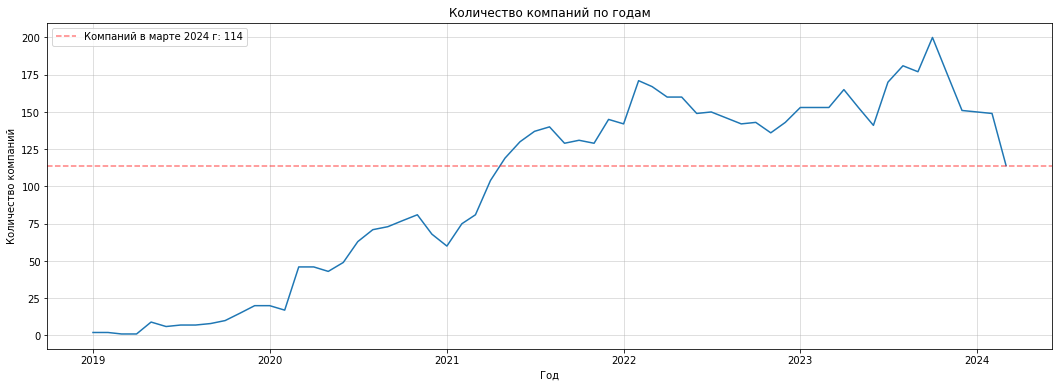

In [67]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=activities_df.groupby('month')['company_id'].agg('count').reset_index(), x='month', y='company_id')

# Получение последнего значения количества компаний
last_value = activities_df.groupby('month')['company_id'].agg('count').reset_index()['company_id'].iloc[-1]

# Построение горизонтальной линии по последнему значению
plt.axhline(y=last_value, color='r', linestyle='--', label=f'Компаний в марте 2024 г: {last_value}', alpha=0.5)

plt.title('Количество компаний по годам')
plt.xlabel('Год')
plt.ylabel('Количество компаний')

# Отображение легенды
plt.legend()

plt.grid(True, alpha=0.5)

plt.show()

Сервис здорово вырос за всё время его существования.\
Но видна та самая проблема оттока клиентов: начиная с $3$ квартала заметен приличный спад количества компаний, пользующихся сервисом.\
Сервис опустился на уровень конца первого квартала $2021$ года.

<br>

Сделаем срез и посмотрим спад подробнее.

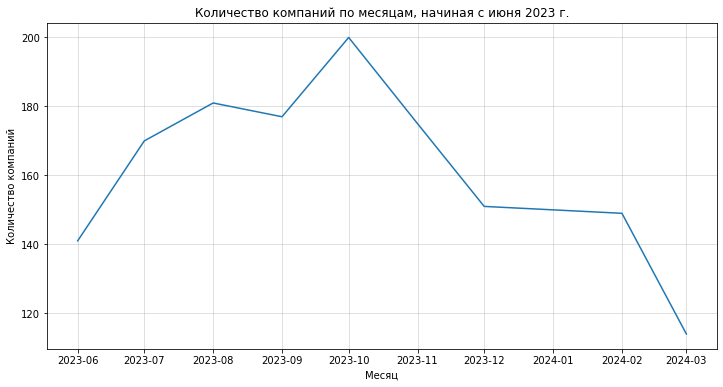

In [68]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=activities_df.query('month >= "2023-06-01"').groupby('month')['company_id'].agg('count').reset_index(), x='month', y='company_id')

plt.title('Количество компаний по месяцам, начиная с июня 2023 г.')
plt.xlabel('Месяц')
plt.ylabel('Количество компаний')
plt.grid(True, alpha=0.5)

Ещё в октябре $2023$ года `Gectaro` был на пике. Затем спад в ноябре, декабре и, наконец, в марте.

<br>

Посмотрим распределение значений числовых данных в этой таблице.

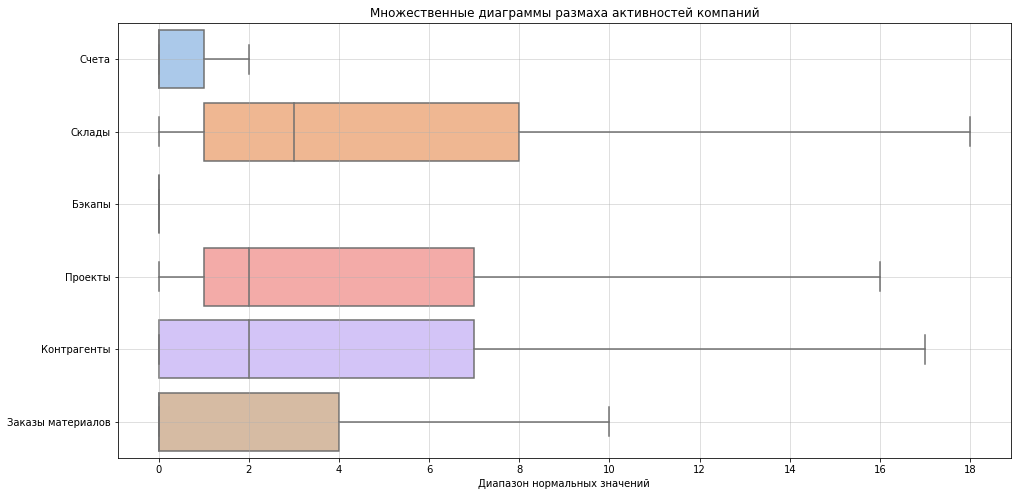

In [69]:
# Построение боксплотов с различными компонентами
plt.figure(figsize=(16, 8))
boxplot = sns.boxplot(data=activities_df[['company-month-billing',
                                          'company-month-stocks',
                                          'company-month-backups',
                                          'company-month-projects',
                                          'company-month-contractors',
                                          'company-month-resource_orders']],
                      showfliers=False, palette='pastel', orient='h')

plt.title('Множественные диаграммы размаха активностей компаний')
plt.xlabel('Диапазон нормальных значений')
plt.grid(True, alpha=0.5)

# установка целых чисел на оси X
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))  

# заголовки диаграмм
boxplot.set_yticklabels(['Счета', 'Склады', 'Бэкапы', 'Проекты', 'Контрагенты', 'Заказы материалов'])

plt.show()

<br>

Отобразим ещё раз числовое описание данных.

In [70]:
activities_df.describe()

Unnamed: 0  company-month-billing  company-month-stocks  \
count  6316.000000            6316.000000           6316.000000   
mean   3159.237650               0.375079              7.408486   
std    1826.512344               0.800281             13.107824   
min       0.000000               0.000000              0.000000   
25%    1578.750000               0.000000              1.000000   
50%    3157.500000               0.000000              3.000000   
75%    4736.250000               1.000000              8.000000   
max    6556.000000              16.000000            166.000000   

       company-month-backups  company-month-projects  \
count            6316.000000             6316.000000   
mean                1.178277                7.262666   
std                 3.135253               13.899203   
min                 0.000000                0.000000   
25%                 0.000000                1.000000   
50%                 0.000000                2.000000   
75%                 0.000000                7.000000   
max                22.000000              221.000000   

       company-month-contractors  company-month-resource_orders  
count                6316.000000                    6316.000000  
mean                    7.906428                      10.346105  
std                    27.966199                      40.569956  
min                     0.000000                       0.000000  
25%                     0.000000                       0.000000  
50%                     2.000000                       0.000000  
75%                     7.000000                       4.000000  
max                  1014.000000                    1182.000000

Наблюдается большой разброс. Только взгляните на эти медианы, на все остальные значения.\
Так, например, диапазон нормальных значений `company-month-billing` от $0$ до $2$ счетов в месяц.\
Если строить гистограммы, то они окажутся совсем неинформативными.

Отобразим процент нормальных значений в этих колонках.

In [71]:
def norm_val(column, val):
    return print(f"Диапазон нормальных значений {column} составляет {round(100 - (len(activities_df[activities_df[column] > val]) / len(activities_df) * 100), 1)}%.")

In [72]:
norm_val('company-month-billing', 2)
norm_val('company-month-stocks', 18)
norm_val('company-month-backups', 0)
norm_val('company-month-projects', 16)
norm_val('company-month-contractors', 17)
norm_val('company-month-resource_orders', 10)

Диапазон нормальных значений company-month-billing составляет 97.8%.
Диапазон нормальных значений company-month-stocks составляет 89.0%.
Диапазон нормальных значений company-month-backups составляет 81.1%.
Диапазон нормальных значений company-month-projects составляет 88.0%.
Диапазон нормальных значений company-month-contractors составляет 89.5%.
Диапазон нормальных значений company-month-resource_orders составляет 85.1%.


То есть диаграммы размаха посчитали, что значения, которые находятся вне диапазона нормальных значений, считаются выдающимися, нетипичными.

Таким образом, типичная активность компаний за каждый месяц выглядит таковой:

1. Выставляет от $0$ до $2$ счетов контрагентам (вероятность $97.8\%$). Рекордное значение — $16$ счетов.
2. Имеет от $0$ до $18$ складов (вероятность $89\%$). Рекордное значение — $166$ складов.
3. Не делает бэкапов ($81.1\%$). Рекордное значение — $22$ бэкапа.
4. Имеет от $0$ до $16$ проектов ($88\%$). Рекордное значение — $221$ проект.
5. Сотрудничает с контрагентами, коих количество от $0$ до $17$ ($89.5\%$). Рекордное значение — $1014$ контрагентов.
6. Заказывает материалы у контрагентов от $0$ до $10$ единиц ($85.1\%$). Рекордное значение — $1182$ материала.

<br>

<br>

#### Платежи | `billing.csv`

Разберёмся с таблицей счётов, выставленных компаниям.

In [73]:
billing_df.head()

Unnamed: 0 user_id company_id billing_tariff_id         payed_until  \
0           4     567        512                 3 2021-12-22 06:08:22   
1           6    2861       2474                 7 2021-12-22 00:00:00   
2          16    1902       1645                 2 2021-03-24 09:18:04   
3          18    2352       2035                 7 2022-01-29 23:59:59   
4          24    1074        926                 3 2021-01-30 00:00:00   

   is_payed          created_at          updated_at billing_tariff_price_id  \
0     False 2020-12-22 06:08:22 2020-12-22 06:08:22                      12   
1      True 2020-12-22 08:36:02 2020-12-22 08:36:21                      23   
2     False 2020-12-24 09:18:04 2020-12-24 09:18:04                       6   
3     False 2020-12-25 07:59:35 2020-12-25 07:59:35                      23   
4      True 2020-12-24 12:47:52 2020-12-25 12:34:34                       9   

  comment            pay_date  
0     NaN                 NaT  
1     NaN 2020-12-22 08:36:21  
2     NaN                 NaT  
3     NaN                 NaT  
4     NaN 2020-12-29 00:00:00

<br>

Посмотрим описание категориальных данных.

In [74]:
billing_df.describe(include='object')

user_id  company_id  billing_tariff_id  billing_tariff_price_id  \
count      3480        3480               3480                     3480   
unique     1841        1841                 13                       47   
top        3942        3276                  2                       23   
freq         61          61               1539                      557   

       comment  
count      745  
unique     650  
top       18+2  
freq        35

Количество пользователей равно количеству компаний, что логично. К каждой компании привязывается пользователь.\
В таблице платежей $1841$ компаний, это сильно расходится с количеством компаний из таблицы `activities`, в которой их всего $716$.

Видим, что всего $13$ тарифов, а в ТЗ заявлено $14$. Не хватает тарифа под номером $8$, который относится к группе `Старт`.\
Эти $13$ тарифов по колонке `billing_tariff_price_id` имеют $47$ разных стоимостей.

<br>

Как известно, эти тарифы поделены по группам: `старт, базовый, бизнес, профи, архивный`.\
Категоризируем данные.

In [75]:
start = ['4', '7', '8', '11', '19']

basic = ['2', '17']

business = ['9', '20']

professional = ['3', '10', '13', '21']

archive = ['6']

def cat_tariff(group):
    if str(group) in start:
        return 'Старт'
    elif str(group) in basic:
        return 'Базовый'
    elif str(group) in business:
        return 'Бизнес'
    elif str(group) in professional:
        return 'Профи'
    elif str(group) in archive:
        return 'Архивный'
    else:
        return 'Другие'

In [76]:
# применение функции
billing_df['tariff_group'] = billing_df['billing_tariff_id'].apply(cat_tariff)

<br>

Построим сводную таблицу с тарифами и их группами.

In [77]:
tariff_distr = billing_df.groupby(['tariff_group', 'billing_tariff_id']).agg(tariff_sum=('company_id', 'count')).reset_index()
tariff_distr['tariff_group_sum'] = tariff_distr.groupby('tariff_group')['tariff_sum'].transform('sum')
tariff_distr = tariff_distr.sort_values(by=['tariff_group_sum', 'tariff_sum'], ascending=False).reset_index(drop=True)
tariff_distr['in_group_perc'] = round(tariff_distr['tariff_sum'] / tariff_distr['tariff_group_sum'] * 100, 1)
tariff_distr['overall_sum'] = tariff_distr['tariff_sum'].sum()
tariff_distr['tariff_perc'] = round(tariff_distr['tariff_sum'] / tariff_distr['overall_sum'] * 100, 1)
tariff_distr['group_perc'] = round(tariff_distr['tariff_group_sum'] / tariff_distr['overall_sum'] * 100, 1)
tariff_distr

tariff_group  billing_tariff_id  tariff_sum  tariff_group_sum  \
0       Базовый                  2        1539              1573   
1       Базовый                 17          34              1573   
2         Старт                  7        1154              1417   
3         Старт                  4         242              1417   
4         Старт                 11          13              1417   
5         Старт                 19           8              1417   
6        Бизнес                  9         269               279   
7        Бизнес                 20          10               279   
8         Профи                  3          91               194   
9         Профи                 10          88               194   
10        Профи                 13          14               194   
11        Профи                 21           1               194   
12     Архивный                  6          17                17   

    in_group_perc  overall_sum  tariff_perc  group_perc  
0            97.8         3480         44.2        45.2  
1             2.2         3480          1.0        45.2  
2            81.4         3480         33.2        40.7  
3            17.1         3480          7.0        40.7  
4             0.9         3480          0.4        40.7  
5             0.6         3480          0.2        40.7  
6            96.4         3480          7.7         8.0  
7             3.6         3480          0.3         8.0  
8            46.9         3480          2.6         5.6  
9            45.4         3480          2.5         5.6  
10            7.2         3480          0.4         5.6  
11            0.5         3480          0.0         5.6  
12          100.0         3480          0.5         0.5

Таблица показывает:
* группу, в которой состоит тариф
* ID тарифа
* сколько раз определённым тарифом пользовались
* сколько вхождений тарифов в определённую группу
* процент тарифа внутри своей группы
* сколько раз вообще всеми тарифами пользовались
* процент тарифа среди всех тарифов
* процент группы среди всех групп

<br>

Установим рейтинг групп.

In [78]:
tariff_distr[['tariff_group', 'tariff_group_sum', 'group_perc']].drop_duplicates()

tariff_group  tariff_group_sum  group_perc
0       Базовый              1573        45.2
2         Старт              1417        40.7
6        Бизнес               279         8.0
8         Профи               194         5.6
12     Архивный                17         0.5

<br>

Посмотрим их распределение на столбчатой диаграмме.

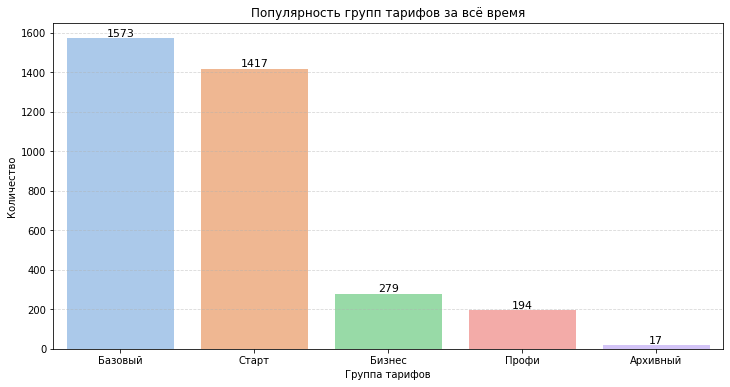

In [79]:
# столбчатая диаграмма
tariff_group_distr = billing_df.groupby('tariff_group').agg(tariff_group_sum=('company_id', 'count')).reset_index().sort_values(by='tariff_group_sum', ascending=False)

plt.figure(figsize=(12, 6))

sns.barplot(data=tariff_group_distr,
            x='tariff_group',
            y='tariff_group_sum',
            palette='pastel')

for index, value in enumerate(tariff_group_distr['tariff_group_sum']):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=11)
    
plt.title('Популярность групп тарифов за всё время')
plt.xlabel('Группа тарифов')
plt.ylabel('Количество')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Итак, рейтинг групп (сколько раз компании пользовались тарифом той или иной группы):
1. Базовый — $1573$ $(45.2\%)$
2. Старт — $1416$ $(40.7\%)$
3. Бизнес — $279$ $(8\%)$
4. Профи — $194$ $(5.6\%)$
5. Архивный — $17$ $(0.5\%)$

<br>

Посмотрим распределение тарифов.

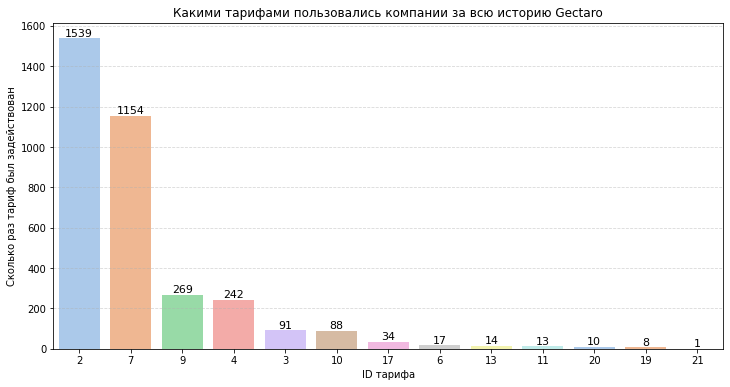

In [80]:
plt.figure(figsize=(12, 6))

sns.barplot(data=tariff_distr,
            x='billing_tariff_id',
            y='tariff_sum',
            order=tariff_distr.sort_values(by='tariff_sum', ascending=False)['billing_tariff_id'],
            palette='pastel')

for index, value in enumerate(tariff_distr.sort_values(by='tariff_sum', ascending=False)['tariff_sum']):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=11)

plt.title('Какими тарифами пользовались компании за всю историю Gectaro')
plt.xlabel('ID тарифа')
plt.ylabel('Сколько раз тариф был задействован')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [81]:
tariff_distr.sort_values(by='tariff_sum', ascending=False)

tariff_group  billing_tariff_id  tariff_sum  tariff_group_sum  \
0       Базовый                  2        1539              1573   
2         Старт                  7        1154              1417   
6        Бизнес                  9         269               279   
3         Старт                  4         242              1417   
8         Профи                  3          91               194   
9         Профи                 10          88               194   
1       Базовый                 17          34              1573   
12     Архивный                  6          17                17   
10        Профи                 13          14               194   
4         Старт                 11          13              1417   
7        Бизнес                 20          10               279   
5         Старт                 19           8              1417   
11        Профи                 21           1               194   

    in_group_perc  overall_sum  tariff_perc  group_perc  
0            97.8         3480         44.2        45.2  
2            81.4         3480         33.2        40.7  
6            96.4         3480          7.7         8.0  
3            17.1         3480          7.0        40.7  
8            46.9         3480          2.6         5.6  
9            45.4         3480          2.5         5.6  
1             2.2         3480          1.0        45.2  
12          100.0         3480          0.5         0.5  
10            7.2         3480          0.4         5.6  
4             0.9         3480          0.4        40.7  
7             3.6         3480          0.3         8.0  
5             0.6         3480          0.2        40.7  
11            0.5         3480          0.0         5.6

Можно сформировать рейтинг тарифов:
1. `2` — им пользовались $1539$ раз, он является лидером в своей группе `Базовый`, его процент в группе — $97.8\%$, процент среди всех тарифов — $44.2\%$.
2. `7` — им пользовались $1153$ раза, он является лидером в своей группе `Старт`, его процент в группе — $81.4\%$, процент среди всех тарифов — $33.1\%$.
3. `9` — пользовались $269$ раз, лидер группы `Бизнес`, процент в группе — $96.4\%$, процент среди всех тарифов — $7.7\%$.
4. `4` — пользовались $242$ раза, вице-лидер группы `Старт`, его процент в группе — $17.1\%$, процент среди всех тарифов — $7\%$.
5. `3` и `10` — пользовались $91$ и $88$ раз соответственно, лидеры группы `Профи`, их проценты — $46.9\%$ и $45.4\%$, вместе они составляют $5.1\%$ от всех тарифов.

In [82]:
tariff_distr[tariff_distr['billing_tariff_id'] == 2]['tariff_perc'].iloc[0] + \
tariff_distr[tariff_distr['billing_tariff_id'] == 7]['tariff_perc'].iloc[0] + \
tariff_distr[tariff_distr['billing_tariff_id'] == 9]['tariff_perc'].iloc[0] + \
tariff_distr[tariff_distr['billing_tariff_id'] == 4]['tariff_perc'].iloc[0] + \
tariff_distr[tariff_distr['billing_tariff_id'] == 3]['tariff_perc'].iloc[0] + \
tariff_distr[tariff_distr['billing_tariff_id'] == 10]['tariff_perc'].iloc[0]

97.2

Эти $6$ тарифов составляют $97.1\%$ от всех $13$ тарифов.

<br>

Поступила новая информация. Тарифы внутри группы ничем не отличаются, это просто формальное обновление.\
Поэтому стоит просто смотреть распределение среди групп. Но всё равно оставим ранее проделанные вычисления.\
Это подтверждает информация с сайта `Gectaro` по тарифам.

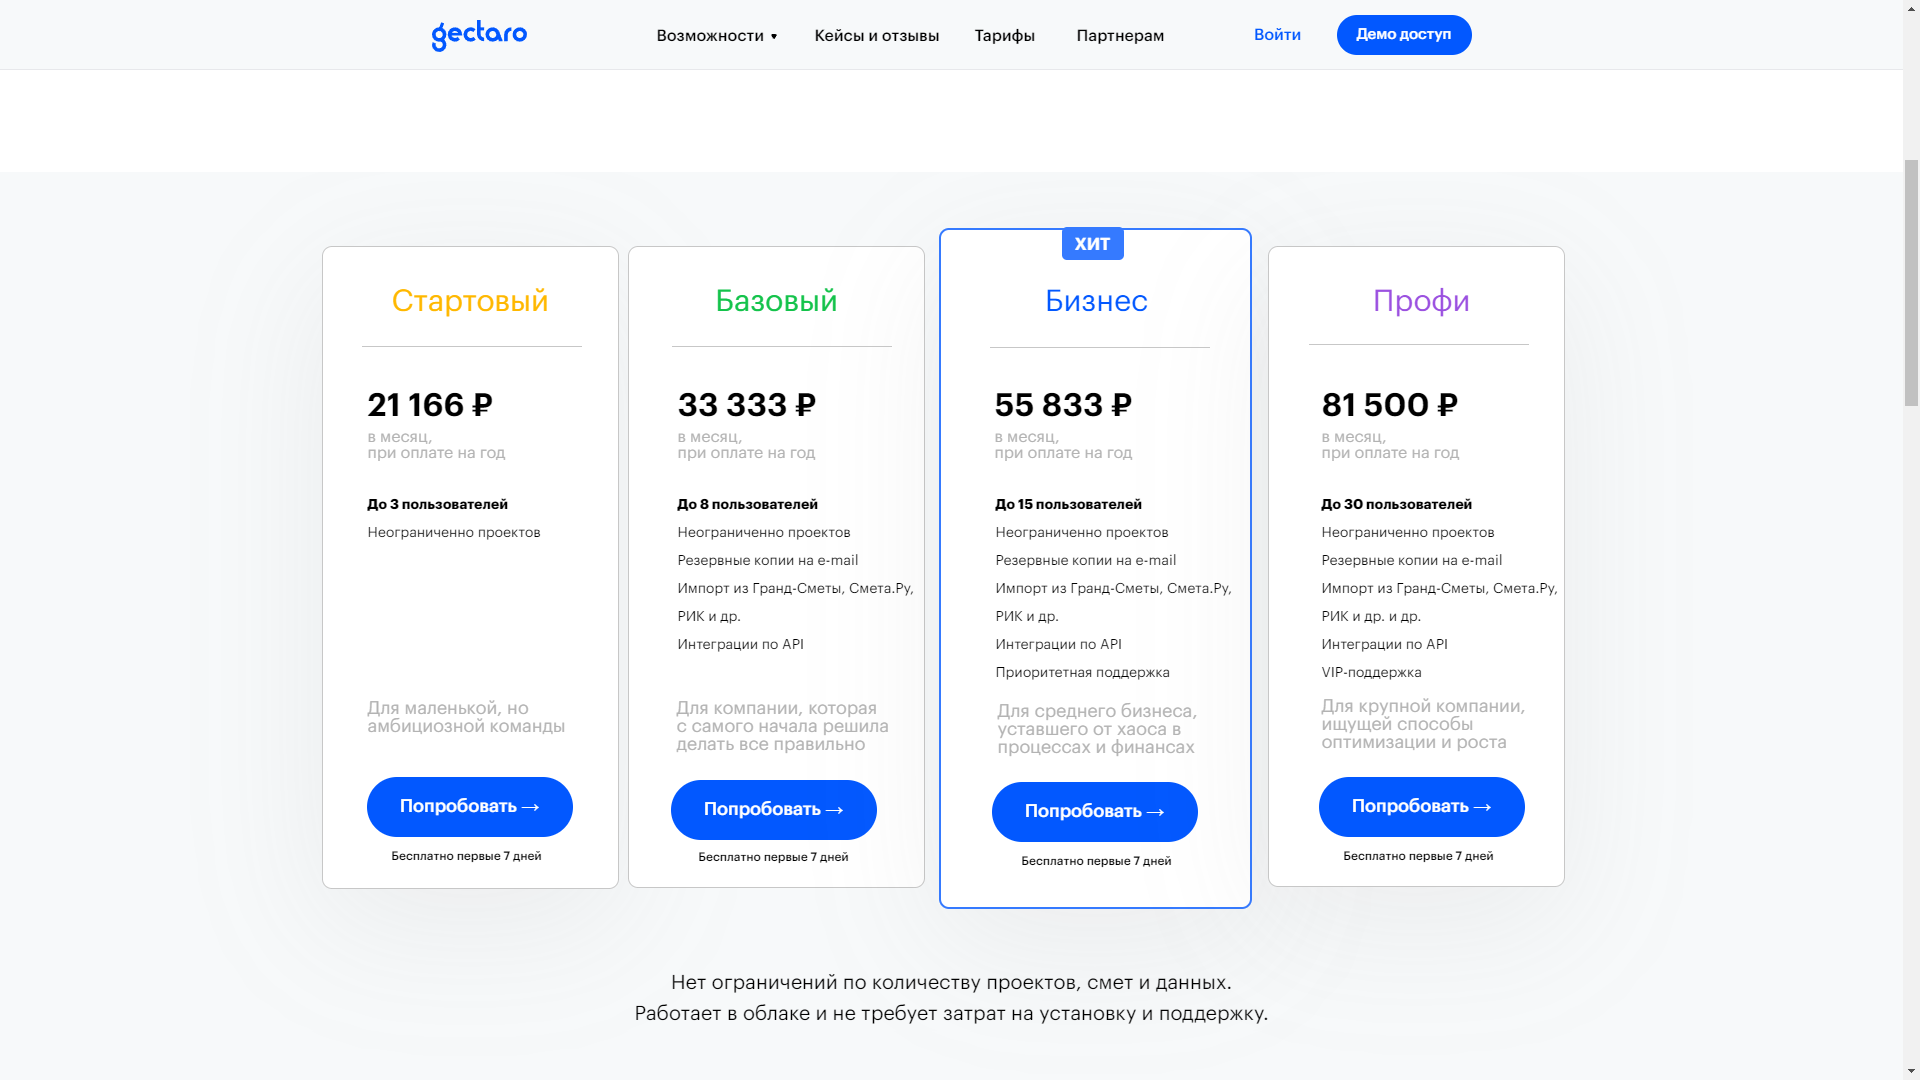

<br>

Далее посмотрим описание числовых данных.

In [83]:
billing_df.describe(datetime_is_numeric=True)

Unnamed: 0                    payed_until  \
count   3480.000000                           3480   
mean    6549.516379  2023-02-27 16:36:26.623276032   
min        4.000000            2019-09-11 23:59:59   
25%     3356.750000            2022-04-06 00:00:00   
50%     6763.500000            2023-06-04 12:00:00   
75%     9276.500000            2024-01-30 00:00:00   
max    18953.000000            2033-04-10 23:59:59   
std     3769.009467                            NaN   

                          created_at                     updated_at  \
count                           3480                           3480   
mean   2022-01-23 04:27:24.612931072  2022-02-12 11:18:13.425574656   
min              2019-07-23 09:32:39            2019-07-23 09:32:39   
25%              2021-06-11 13:12:27  2021-06-23 20:30:38.249999872   
50%       2022-01-15 23:21:57.500000     2022-01-25 12:46:59.500000   
75%    2022-08-29 12:46:51.249999872  2022-10-18 15:14:28.750000128   
max              2024-03-13 10:24:06            2024-03-13 10:26:17   
std                              NaN                            NaN   

                            pay_date  
count                           1108  
mean   2022-05-04 07:52:33.683212800  
min              2020-12-16 12:43:27  
25%              2021-06-30 00:00:00  
50%              2022-03-30 00:00:00  
75%              2023-02-28 00:00:00  
max              2024-03-15 00:00:00  
std                              NaN

Но "чисел" нет, есть только одни даты.

Мы уже решили, что самой главной, целевой переменной является `payed_until`, как ориентир на то, является ли компания клиентом Gectaro на данный момент или нет.\
Колонка `pay_date` не всегда адекватна, а `updated_at` не всегда пойми что обновляет.\
`created_at` просто создаёт эту строку-платёж, с ней всё понятно.

<br>

<br>

#### Компании | `companies.csv`

Разберёмся с таблицей измерений, где каждая строка описывает отдельную компанию.

In [84]:
companies_df.head()

Unnamed: 0 company_id working_direction employee_count_interval  \
0          19        514              None                       1   
1          57        383     Строительство                       2   
2          69        495              None                       1   
3          75        724              None                       1   
4          99        471              None                       1   

           created_at          updated_at billing_tariff_id  billing_is_over  \
0 2019-10-17 12:50:35 2022-12-06 03:45:14                 4             True   
1 2019-07-26 12:02:45 2023-02-16 12:20:50                 7            False   
2 2019-10-08 11:54:55 2020-08-24 15:08:34                 2            False   
3 2020-01-20 09:59:53 2022-12-06 03:44:54                 4             True   
4 2019-09-24 12:26:57 2022-12-06 03:46:00                 7             True   

  working_category  
0       Неизвестно  
1    Строительство  
2       Неизвестно  
3       Неизвестно  
4       Неизвестно

In [85]:
companies_df.describe(include='object')

company_id working_direction  employee_count_interval  \
count          723               262                      723   
unique         723               142                        8   
top           5120     Строительство                        1   
freq             1                78                      498   

        billing_tariff_id working_category  
count                 716              723  
unique                 13                4  
top                     2       Неизвестно  
freq                  321              461

Мы видим, что здесь у нас $723$ уникальные компании. Это число снова разнится с числом компаний в других таблицах.

$143$ разных вида деятельности, но это не так, есть немало скрытых неявных дубликатов. Обрабатывать их непросто, ведь строительство рыбоводных ферм и строительство коттеджей немного разные вещи, ведь так? Но есть и такие дубли, которые можно свести к одному, посмотрим, нужно ли это позже делать или нет.

Также наблюдается $8$ категорий компаний, которые значат количество сотрудников в них. Можно категоризировать данные.\
Видим $13$ тарифов, которые относятся к компании. Интересно, по какому принципу их здесь назначили? Видимо, это последний актуальный тариф для компании.

<br>

Категоризируем данные по количеству сотрудников в компаниях.

In [86]:
first = ['1']
second = ['2']
third = ['3']
fourth = ['4']
fifth = ['5']
sixth = ['6']
seventh = ['7']
eighth = ['8']

def emp_cat(id_cat):
    if str(id_cat) in first:
        return '1-4'
    elif str(id_cat) in second:
        return '5-10'
    elif str(id_cat) in third:
        return '11-20'
    elif str(id_cat) in fourth:
        return '21-30'
    elif str(id_cat) in fifth:
        return '31-50'
    elif str(id_cat) in sixth:
        return '51-100'
    elif str(id_cat) in seventh:
        return '101-200'
    elif str(id_cat) in eighth:
        return '201 and more'
    else:
        return 'other'
    
companies_df['number_of_employees'] = companies_df['employee_count_interval'].apply(emp_cat)

<br>

Получилось такое распределение.

In [87]:
companies_df.groupby('number_of_employees')\
            .agg(companies=('number_of_employees', 'count'))\
            .sort_values(by='companies', ascending=False)\
            .reset_index()

number_of_employees  companies
0                 1-4        498
1                5-10        147
2               11-20         46
3               21-30         14
4               31-50          9
5        201 and more          4
6             101-200          3
7              51-100          2

<br>

Посмотрим, что с датами.

In [88]:
companies_df.describe(datetime_is_numeric=True)

Unnamed: 0                     created_at  \
count    723.000000                            723   
mean    5213.614108  2021-11-05 22:12:26.153526784   
min       19.000000            2019-01-23 14:00:51   
25%     2954.500000     2020-12-27 21:42:21.500000   
50%     5272.000000            2021-10-14 08:13:28   
75%     7074.000000     2022-09-12 10:24:13.500000   
max    17972.000000            2024-02-07 12:56:09   
std     2881.204290                            NaN   

                          updated_at  
count                            723  
mean   2023-04-06 03:31:12.546334720  
min              2020-07-06 14:49:27  
25%       2022-12-06 03:45:22.500000  
50%              2022-12-19 10:05:07  
75%              2023-09-22 23:59:20  
max              2024-03-13 10:44:24  
std                              NaN

Первая компания, которая зарегистрировалась в сервере, сделала это $23$ января $2019$ года.\
Самая свежая компания — $7$ февраля $2024$ года.

<br>

#### Сотрудники | `people.csv`

Посмотрим.

In [89]:
people_df.describe(include='object')

company_id  user_id  role_id
count         5095     3813     5095
unique         712     3528     1411
top           6806     1845        1
freq            55        6     1602

Здесь $712$ компаний. Снова количество различается.\
В этих компниях зарегистрировано $3528$ сотрудников.\
Есть $1411$ ролей (должностей) у них.\
Какой-то сотрудник даже $6$ раз встречается. Должности менялись, что ли?

<br>

<br>

### Рефлексия

Нужно остановиться и подумать, что сделано и что важно сейчас.

Нам известно, что количество компаний в разных таблицах такое:
* активности — $716$;
* платежи — $1841$;
* компании — $723$;
* сотрудники — $712$.

<br>

Если озвучить важность таблиц, то я бы охарактеризовал их так:
* таблицы с активностями и платежами — главные. Первая показывает деятельность компании в сервисе, а вторая — как они оплачивают подписки.
* таблицы с профилями компаний и их сотрудниками — второстепенные. Они лишь помогут показать портрет этих компаний.

Данные из таблицы с активностями, несомненно, очень важные, их точно нужно сохранить.

Проверим, все ли компании из таблицы `activities_df` есть в других таблицах.

Подготовим список компаний `activities_df`.

In [90]:
# список компаний из activities_df
companies = list(set(activities_df['company_id']))

# их число
len(companies)

716

<br>

Все ли компании из таблицы `activities_df` есть в `billing_df`?

In [91]:
# проверка
flag = True

for company in companies:
    if company not in list(billing_df['company_id'].unique()):
        flag = False
        
if flag == True:
    print('Все компании из df_activities есть в billing_df.')
else: print('Кого-то не хватает.')

Все компании из df_activities есть в billing_df.


<br>

Все ли компании из таблицы `activities_df` есть в `companies_df`?

In [92]:
# проверка

flag = True

for company in companies:
    if company not in list(companies_df['company_id'].unique()):
        flag = False
        
if flag == True:
    print('Все компании из df_activities есть в companies_df.')
else: print('Кого-то не хватает.')

Все компании из df_activities есть в companies_df.


<br>

Все ли компании из таблицы `activities_df` есть в `people_df`?

In [93]:
# проверка

flag = True
not_in_list = 0
companies_not_in_list = []

for company in companies:
    if company not in list(people_df['company_id'].unique()):
        flag = False
        not_in_list += 1
        companies_not_in_list.append(company)
        
if flag == True:
    print('ok')
else:
    print(f"Кол-во компаний из df_activities, которых нет в people_df: {not_in_list} штук.")

Кол-во компаний из df_activities, которых нет в people_df: 10 штук.


<br>

Нехватка есть только в одной таблице, но это ничтожное количество, которое ничего не решает.

Каков процент компаний, по которым нет никакой информации, кроме как информации о платежах?

In [94]:
100 - round(activities_df['company_id'].nunique() / billing_df['company_id'].nunique() * 100, 1)

61.1

$61.1\%$ — таков процент безликих компаний, которые есть только в `billing_df`.

<br>

Посмотрим пересечение множеств компаний. Ранее проверка нам показала, что все компании из `activities_df` есть в `billing_df` и `companies_df`.

In [95]:
len(set(activities_df['company_id']).intersection(set(billing_df['company_id']), set(companies_df['company_id'])))

716

Порядок. Всё верно.

<br>

Посмотрим пересечение множеств из `activities_df` и `people_df`, нам показало, что 10 компаний не досчитались.

In [96]:
len(set(activities_df['company_id']).intersection(set(people_df['company_id'])))

706

Показывает на $10$ компаний меньше, как и сказала проверка ранее.

<br>

<br>

### Клиенты Gectaro в настоящее время (актуальные компании)

Определим, какие же компании являются клиентами `Gectaro` по состоянию на `28.03.24`.

In [97]:
billing_df.head()

Unnamed: 0 user_id company_id billing_tariff_id         payed_until  \
0           4     567        512                 3 2021-12-22 06:08:22   
1           6    2861       2474                 7 2021-12-22 00:00:00   
2          16    1902       1645                 2 2021-03-24 09:18:04   
3          18    2352       2035                 7 2022-01-29 23:59:59   
4          24    1074        926                 3 2021-01-30 00:00:00   

   is_payed          created_at          updated_at billing_tariff_price_id  \
0     False 2020-12-22 06:08:22 2020-12-22 06:08:22                      12   
1      True 2020-12-22 08:36:02 2020-12-22 08:36:21                      23   
2     False 2020-12-24 09:18:04 2020-12-24 09:18:04                       6   
3     False 2020-12-25 07:59:35 2020-12-25 07:59:35                      23   
4      True 2020-12-24 12:47:52 2020-12-25 12:34:34                       9   

  comment            pay_date tariff_group  
0     NaN                 NaT        Профи  
1     NaN 2020-12-22 08:36:21        Старт  
2     NaN                 NaT      Базовый  
3     NaN                 NaT        Старт  
4     NaN 2020-12-29 00:00:00        Профи

<br>

Для каждой компании выведем, когда заканчивается их последняя подписка, создав колонку `subscription_last_date`.

In [98]:
billing_df['subscription_last_date'] = billing_df.groupby('company_id')['payed_until'].transform('max')

In [99]:
billing_df.head()

Unnamed: 0 user_id company_id billing_tariff_id         payed_until  \
0           4     567        512                 3 2021-12-22 06:08:22   
1           6    2861       2474                 7 2021-12-22 00:00:00   
2          16    1902       1645                 2 2021-03-24 09:18:04   
3          18    2352       2035                 7 2022-01-29 23:59:59   
4          24    1074        926                 3 2021-01-30 00:00:00   

   is_payed          created_at          updated_at billing_tariff_price_id  \
0     False 2020-12-22 06:08:22 2020-12-22 06:08:22                      12   
1      True 2020-12-22 08:36:02 2020-12-22 08:36:21                      23   
2     False 2020-12-24 09:18:04 2020-12-24 09:18:04                       6   
3     False 2020-12-25 07:59:35 2020-12-25 07:59:35                      23   
4      True 2020-12-24 12:47:52 2020-12-25 12:34:34                       9   

  comment            pay_date tariff_group subscription_last_date  
0     NaN                 NaT        Профи    2033-04-10 23:59:59  
1     NaN 2020-12-22 08:36:21        Старт    2022-08-28 00:00:00  
2     NaN                 NaT      Базовый    2023-12-26 00:00:00  
3     NaN                 NaT        Старт    2022-11-03 00:00:00  
4     NaN 2020-12-29 00:00:00        Профи    2021-10-01 00:00:00

<br>

Теперь из текущей даты нужно вычесть дату окончания последней подписки, чтобы мы получили разницу в днях, выраженной в колонке `days_diff`.

In [100]:
# текущая дата
current_date = pd.to_datetime('28.03.24')

# разница
billing_df['days_diff'] = current_date - billing_df['subscription_last_date'].dt.round('1D')
billing_df['days_diff'] = billing_df['days_diff'].dt.days

In [101]:
billing_df.head()

Unnamed: 0 user_id company_id billing_tariff_id         payed_until  \
0           4     567        512                 3 2021-12-22 06:08:22   
1           6    2861       2474                 7 2021-12-22 00:00:00   
2          16    1902       1645                 2 2021-03-24 09:18:04   
3          18    2352       2035                 7 2022-01-29 23:59:59   
4          24    1074        926                 3 2021-01-30 00:00:00   

   is_payed          created_at          updated_at billing_tariff_price_id  \
0     False 2020-12-22 06:08:22 2020-12-22 06:08:22                      12   
1      True 2020-12-22 08:36:02 2020-12-22 08:36:21                      23   
2     False 2020-12-24 09:18:04 2020-12-24 09:18:04                       6   
3     False 2020-12-25 07:59:35 2020-12-25 07:59:35                      23   
4      True 2020-12-24 12:47:52 2020-12-25 12:34:34                       9   

  comment            pay_date tariff_group subscription_last_date  days_diff  
0     NaN                 NaT        Профи    2033-04-10 23:59:59      -3301  
1     NaN 2020-12-22 08:36:21        Старт    2022-08-28 00:00:00        578  
2     NaN                 NaT      Базовый    2023-12-26 00:00:00         93  
3     NaN                 NaT        Старт    2022-11-03 00:00:00        511  
4     NaN 2020-12-29 00:00:00        Профи    2021-10-01 00:00:00        909

<br>

Теперь с помощью `days_diff` нужно определить, является ли компания клиентом `Gectaro` на текущий момент по условию:\
если `days_diff` меньше или равно $0$, то компания является текущим клиентом `Gectaro`, в другом случае — не является.

In [102]:
billing_df['retention'] = billing_df['days_diff'].apply(lambda x: True if x <= 0 else False)

In [103]:
billing_df.head()

Unnamed: 0 user_id company_id billing_tariff_id         payed_until  \
0           4     567        512                 3 2021-12-22 06:08:22   
1           6    2861       2474                 7 2021-12-22 00:00:00   
2          16    1902       1645                 2 2021-03-24 09:18:04   
3          18    2352       2035                 7 2022-01-29 23:59:59   
4          24    1074        926                 3 2021-01-30 00:00:00   

   is_payed          created_at          updated_at billing_tariff_price_id  \
0     False 2020-12-22 06:08:22 2020-12-22 06:08:22                      12   
1      True 2020-12-22 08:36:02 2020-12-22 08:36:21                      23   
2     False 2020-12-24 09:18:04 2020-12-24 09:18:04                       6   
3     False 2020-12-25 07:59:35 2020-12-25 07:59:35                      23   
4      True 2020-12-24 12:47:52 2020-12-25 12:34:34                       9   

  comment            pay_date tariff_group subscription_last_date  days_diff  \
0     NaN                 NaT        Профи    2033-04-10 23:59:59      -3301   
1     NaN 2020-12-22 08:36:21        Старт    2022-08-28 00:00:00        578   
2     NaN                 NaT      Базовый    2023-12-26 00:00:00         93   
3     NaN                 NaT        Старт    2022-11-03 00:00:00        511   
4     NaN 2020-12-29 00:00:00        Профи    2021-10-01 00:00:00        909   

   retention  
0       True  
1      False  
2      False  
3      False  
4      False

<br>

Отберём строки с последними подписками компаний.

In [104]:
last_billing_df = billing_df.query("payed_until == subscription_last_date")

<br>

Также возникла ситуация, что в одно и то же время у некоторых компаний было 2 подписки точь-в-точь такое же время.\
Уберём такие строки.

In [105]:
last_billing_df = last_billing_df.drop_duplicates(subset='company_id', keep='first')

<br>

Итак, мы имеем срез таблицы с платежами компаний, чьи подписки как истекли, так и действуют на текущий момент.

In [106]:
last_billing_df.head()

Unnamed: 0 user_id company_id billing_tariff_id         payed_until  \
6           43    2707       2353                 2 2021-06-30 00:00:00   
8           57     531        483                 4 2022-01-11 23:59:59   
10          66    2989       2565                 2 2021-07-11 00:00:00   
12          78    4671       3785                 2 2023-07-16 00:00:00   
13          79    4451       3633                 7 2021-08-13 00:00:00   

    is_payed          created_at          updated_at billing_tariff_price_id  \
6       True 2020-12-29 07:31:09 2020-12-30 11:48:13                       7   
8      False 2021-01-11 05:14:11 2021-01-11 05:14:11                      16   
10     False 2021-01-11 14:53:13 2021-01-11 14:53:34                       7   
12     False 2021-07-16 13:59:48 2021-07-16 13:59:51                      35   
13      True 2021-07-21 09:04:55 2021-08-11 10:55:48                      23   

                                        comment   pay_date tariff_group  \
6                         30,12 - пришла оплата 2020-12-29      Базовый   
8                                           NaN        NaT        Старт   
10                                          NaN        NaT      Базовый   
12                                          NaN        NaT      Базовый   
13  оплата пришла 5,08\r\nПереоткрыла другой лк 2021-08-05        Старт   

   subscription_last_date  days_diff  retention  
6     2021-06-30 00:00:00       1002      False  
8     2022-01-11 23:59:59        806      False  
10    2021-07-11 00:00:00        991      False  
12    2023-07-16 00:00:00        256      False  
13    2021-08-13 00:00:00        958      False

<br>

Построим диаграмму размаха, которая покажет распределение значений разницы между текущим днём и конечной датой подписки.

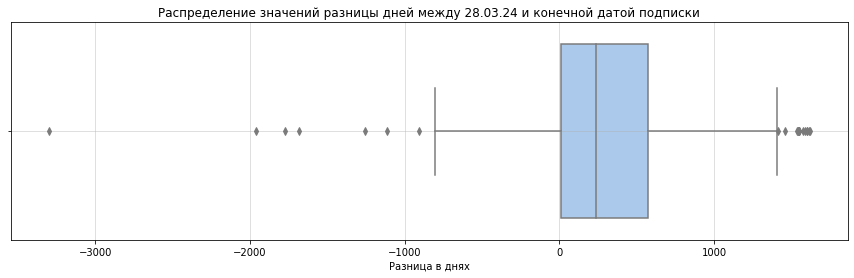

In [107]:
# диаграмма размаха
plt.figure(figsize=(15, 4))

sns.boxplot(data=last_billing_df,
            x='days_diff',
            palette='pastel')

plt.title('Распределение значений разницы дней между 28.03.24 и конечной датой подписки')
plt.xlabel('Разница в днях')

plt.grid(True, alpha=0.5)
plt.show()

In [108]:
# процент неушедших компаний
round(last_billing_df[last_billing_df['days_diff'] <= 0]['days_diff'].count() / last_billing_df['days_diff'].count() * 100, 1)

24.0

Боксплот и вычисление выше показывают, что только $24\%$ компаний подписаны на сервис сейчас, об этом говорит промежуток от нижней границы до первого квартиля.\
Среди них, у $7$ компаний, видны выдающиеся значения, у которых подписка будет длиться многие годы.

<br>

Построим гистограмму, которая покажет то же самое.

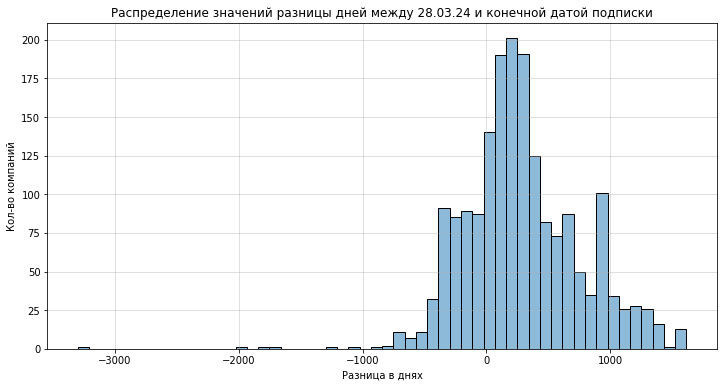

In [109]:
# гистограмма
plt.figure(figsize=(12, 6))

sns.histplot(data=last_billing_df['days_diff'],
             alpha=0.5)

plt.title('Распределение значений разницы дней между 28.03.24 и конечной датой подписки')
plt.xlabel('Разница в днях')
plt.ylabel('Кол-во компаний')

plt.grid(True, alpha=0.5)

plt.show()

Та же картина. Львиная доля компаний уже не являются клиентом `Gectaro`.

<br>

#### Фильтрация компаний

Мы посмотрели ситуацию по $1841$ компании.\
Но что будет, если посмотреть компании, по которым есть информация в других таблицах. \
Об этом мы говорили ранее. Таких компаний на порядок меньше — $38.9\%$.

<br>

Сделаем срез по этим $38.9\%$.\
Занесём эти актуальные компании в отдельную переменную.

In [110]:
actual_companies = set(activities_df['company_id'])

Срез по всем платежам актуальных компаний.

In [111]:
actual_billing_df = billing_df[billing_df['company_id'].isin(actual_companies)]

Срез по последним платежам актуальных компаний.

In [112]:
actual_last_billing_df = actual_billing_df.query("payed_until == subscription_last_date")

# удаление дублей платежей
actual_last_billing_df = actual_last_billing_df.drop_duplicates(subset='company_id', keep='first')

<br>

Снова построим диаграмму размаха, которая покажет распределение значений разницы между текущим днём и конечной датой подписки.

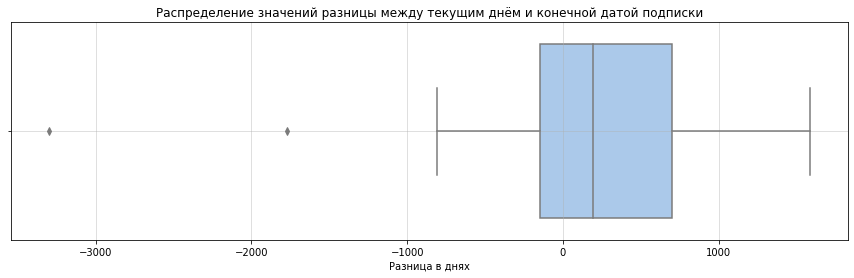

In [113]:
# диаграмма размаха
plt.figure(figsize=(15, 4))

sns.boxplot(data=actual_last_billing_df,
            x='days_diff',
            palette='pastel')

plt.title('Распределение значений разницы между текущим днём и конечной датой подписки')
plt.xlabel('Разница в днях')

plt.grid(True, alpha=0.5)

plt.show()

In [114]:
# процент неушедших компаний
round(actual_last_billing_df[actual_last_billing_df['days_diff'] <= 0]['days_diff'].count() / actual_last_billing_df['days_diff'].count() * 100, 1)

35.2

Статистически ситуация улучшилась. Видим компании, имеющие подписку, внутри межквартильного размаха. Компаний с подпиской $35.2\%$.\
"Выдающихся" компаний стало всего $2$.\
Также заметно, что убрались компании, которые создавали выбросы после верхнего уса боксплота.\
Такие компании уже давно не пользовались сервисом, и `Gectaro`, видимо, решил избавиться от них во всех остальных таблицах, чтобы не захламлять БД.

<br>

Построим гистограмму, которая покажет то же самое.

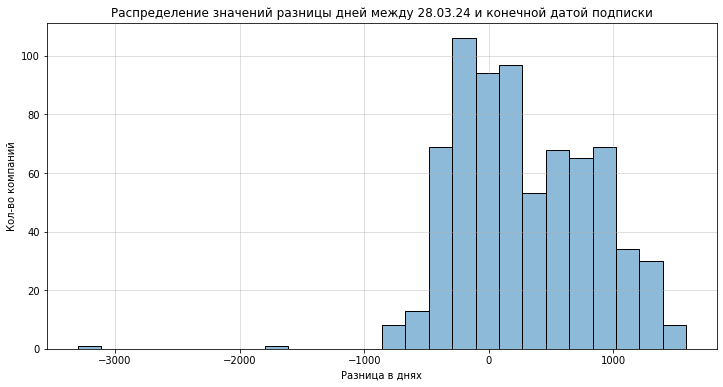

In [115]:
# гистограмма
plt.figure(figsize=(12, 6))

sns.histplot(data=actual_last_billing_df['days_diff'],
             alpha=0.5)

plt.title('Распределение значений разницы дней между 28.03.24 и конечной датой подписки')
plt.xlabel('Разница в днях')
plt.ylabel('Кол-во компаний')

plt.grid(True, alpha=0.5)

plt.show()

<br>

#### Запись актуальных компаний

<span style="font-weight: 600">Определимся, что такое актуальная компания. Это такая компания, о которой есть подробная информация в других таблицах.</span>

Узнаем, каков процент сохранения данных из-за того, что мы убираем информацию о компаниях, о которых ничего не известно в других таблицах.

In [116]:
round(activities_df[activities_df['company_id'].isin(actual_companies)]['company_id'].count() / activities_df['company_id'].count() * 100, 1)

100.0

В `activities` — $100\%$.\
Таблицу перезаписывать не нужно. Компании берутся из неё.

<br>

In [117]:
# учитываются только последние платежи
round(last_billing_df[last_billing_df['company_id'].isin(actual_companies)]['company_id'].count() / last_billing_df['company_id'].count() * 100, 1)

38.9

В `billing` — $38.9\%$.\
Таблицу перезаписывать не нужно.\
Мы уже это сделали, создав из `last_billing_df` (последняя подписка компании) и `actual_billing_df` (компании, у которых есть описание) >>> `actual_last_billing_df`.

<br>

In [118]:
round(companies_df[companies_df['company_id'].isin(actual_companies)]['company_id'].count() / companies_df['company_id'].count() * 100, 1)

99.0

В `companies` — $99\%$.\
Перезапишем таблицу.

In [119]:
actual_companies_df = companies_df[companies_df['company_id'].isin(actual_companies)]

<br>

In [120]:
round(people_df[people_df['company_id'].isin(actual_companies)]['company_id'].count() / people_df['company_id'].count() * 100, 1)

99.9

В `people` — $99.9\%$.\
Перезапишем таблицу.

In [121]:
actual_people_df = people_df[people_df['company_id'].isin(actual_companies)]

<br>

### Анализ по актуальным компаниям

Проанализируем активность ушедших и неушедших актуальных компаний в сервисе. 

In [122]:
# неушедшие компании
reten_comp_df = activities_df[activities_df['company_id'].isin(actual_last_billing_df[actual_last_billing_df['retention'] == True]['company_id'])]

# ушедшие компании
churn_comp_df = activities_df[activities_df['company_id'].isin(actual_last_billing_df[actual_last_billing_df['retention'] == False]['company_id'])]

<br>

Сколько из актуальных компаний на текущий момент являются клиентами `Gectaro`.

In [123]:
reten_comp_df['company_id'].nunique()

252

А у скольки компаний на текущий момент нет подписки на `Gectaro`.

In [124]:
churn_comp_df['company_id'].nunique()

464

Как мы раньше вычисляли, процент компаний с подпиской среди всех компаний равен $35.2\%$.

In [125]:
round(reten_comp_df['company_id'].nunique() / (reten_comp_df['company_id'].nunique() + churn_comp_df['company_id'].nunique()) * 100, 1)

35.2

<br>

#### Активность актуальных компаний

Будем строить боксплоты и анализировать числовые данные по всем колонкам таблицы с активностями компаний.\
Будем смотреть, каковы $90\%$ значений обеих групп, то есть это будет диапазоном нормальных значений.\
Нижний ус будет начинаться с $0\%$, верхний ус — с $90\%$. Такой выбор, потому экстраординарных значений ниже первого квартиля не наблюдается, следовательно, эти значения нормальные, и отсчёт начинаем с $0$.\
Для удобного сравнения зададим ограничение оси X.

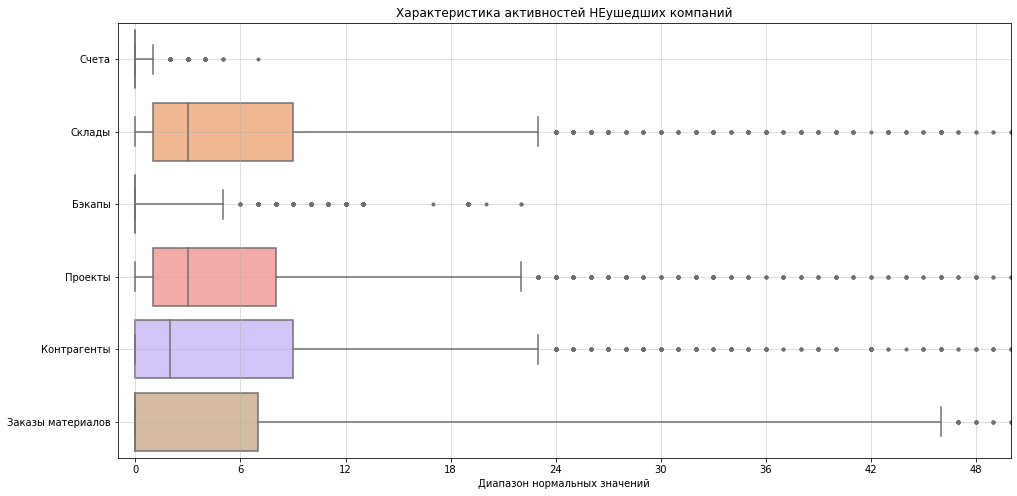

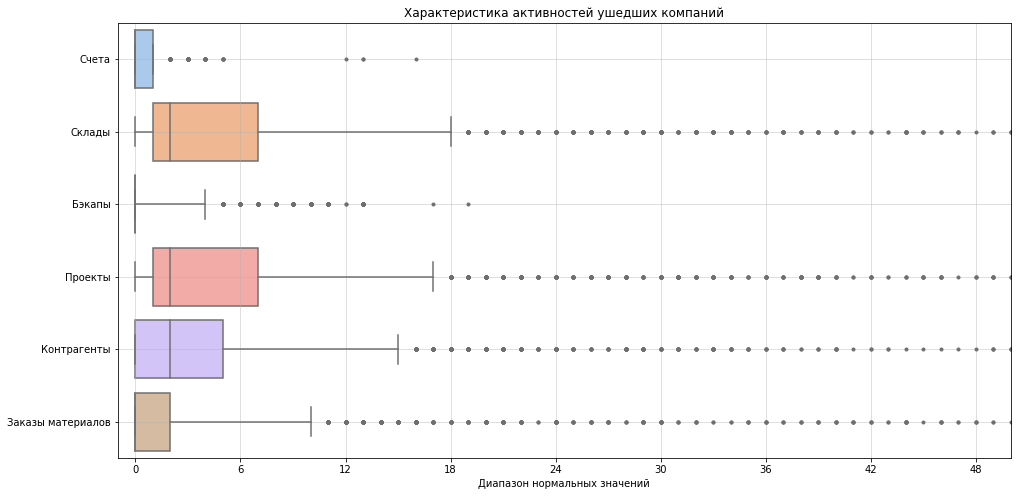

In [126]:
# неушедшие компании
plt.figure(figsize=(16, 8))
boxplot = sns.boxplot(data=reten_comp_df[['company-month-billing',
                                              'company-month-stocks',
                                              'company-month-backups',
                                              'company-month-projects',
                                              'company-month-contractors',
                                              'company-month-resource_orders']],
                      palette='pastel',
                      orient='h',
                      whis=(0, 90),
                      flierprops=dict(marker='o', markersize=3))

# настройка графика
plt.title('Характеристика активностей НЕушедших компаний')
plt.xlabel('Диапазон нормальных значений')
plt.grid(True, alpha=0.5)
plt.xlim(-1, 50)

# установка целых чисел на оси X
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))  

# заголовки диаграмм
boxplot.set_yticklabels(['Счета', 'Склады', 'Бэкапы', 'Проекты', 'Контрагенты', 'Заказы материалов'])


# ушедшие компании
plt.figure(figsize=(16, 8))
boxplot = sns.boxplot(data=churn_comp_df[['company-month-billing',
                                            'company-month-stocks',
                                            'company-month-backups',
                                            'company-month-projects',
                                            'company-month-contractors',
                                            'company-month-resource_orders']],
                      palette='pastel',
                      orient='h',
                      whis=(0, 90),
                      flierprops=dict(marker='o', markersize=3))

# настройка графика
plt.title('Характеристика активностей ушедших компаний')
plt.xlabel('Диапазон нормальных значений')
plt.grid(True, alpha=0.5)
plt.xlim(-1, 50)


# установка целых чисел на оси X
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))  

# заголовки диаграмм
boxplot.set_yticklabels(['Счета', 'Склады', 'Бэкапы', 'Проекты', 'Контрагенты', 'Заказы материалов'])

plt.show()

Диаграммы размаха показывают, какова помесячная активность компаний, будем называть неушедшие компании — **retention**, а ушедшие — **churn**. Учитываем значения, которые входят в $90\%$ значений:
1. В churn группе стремятся более чаще выставлять счета контрагентам, чем в retention.\
В целом, для обеих групп этот показатель в диапазоне от $0$ до $1$ счёта.\
Более частое выставление счетов у churn обусловлено нахождением внутри межквартильного размаха, у retention это значение вне квартильного размаха.
2. Компании retention группы имеют от $0$ до $23$ складов. Churn — от $0$ до $18$.
3. Обе группы делают равное кол-во бэкапов данных — от $0$ до $5$.
4. Количество проектов разнится: для retention — от $0$ до $22$, для churn — от $0$ до $17$.
5. Кол-во контрагентов также отличается: для retention — от $0$ до $23$, для churn — от $0$ до $15$.
6. Большая разница видна в кол-ве заказанных материалов: для retention — от $0$ до $46$, для churn — от $0$ до $10$.

<span style="font-weight: 600">Итак, компании, которые ушли с сервиса `Gectaro`, имеют меньшее количество складов, делают меньше проектов, имеют меньшее кол-во контрагентов, а также значительно меньше заказывают материалы у контрагентов.</span>

<br>

##### Корреляция переменных 

В обеих группах попробуем поискать корреляцию между числовыми данными.

Группа Retention.

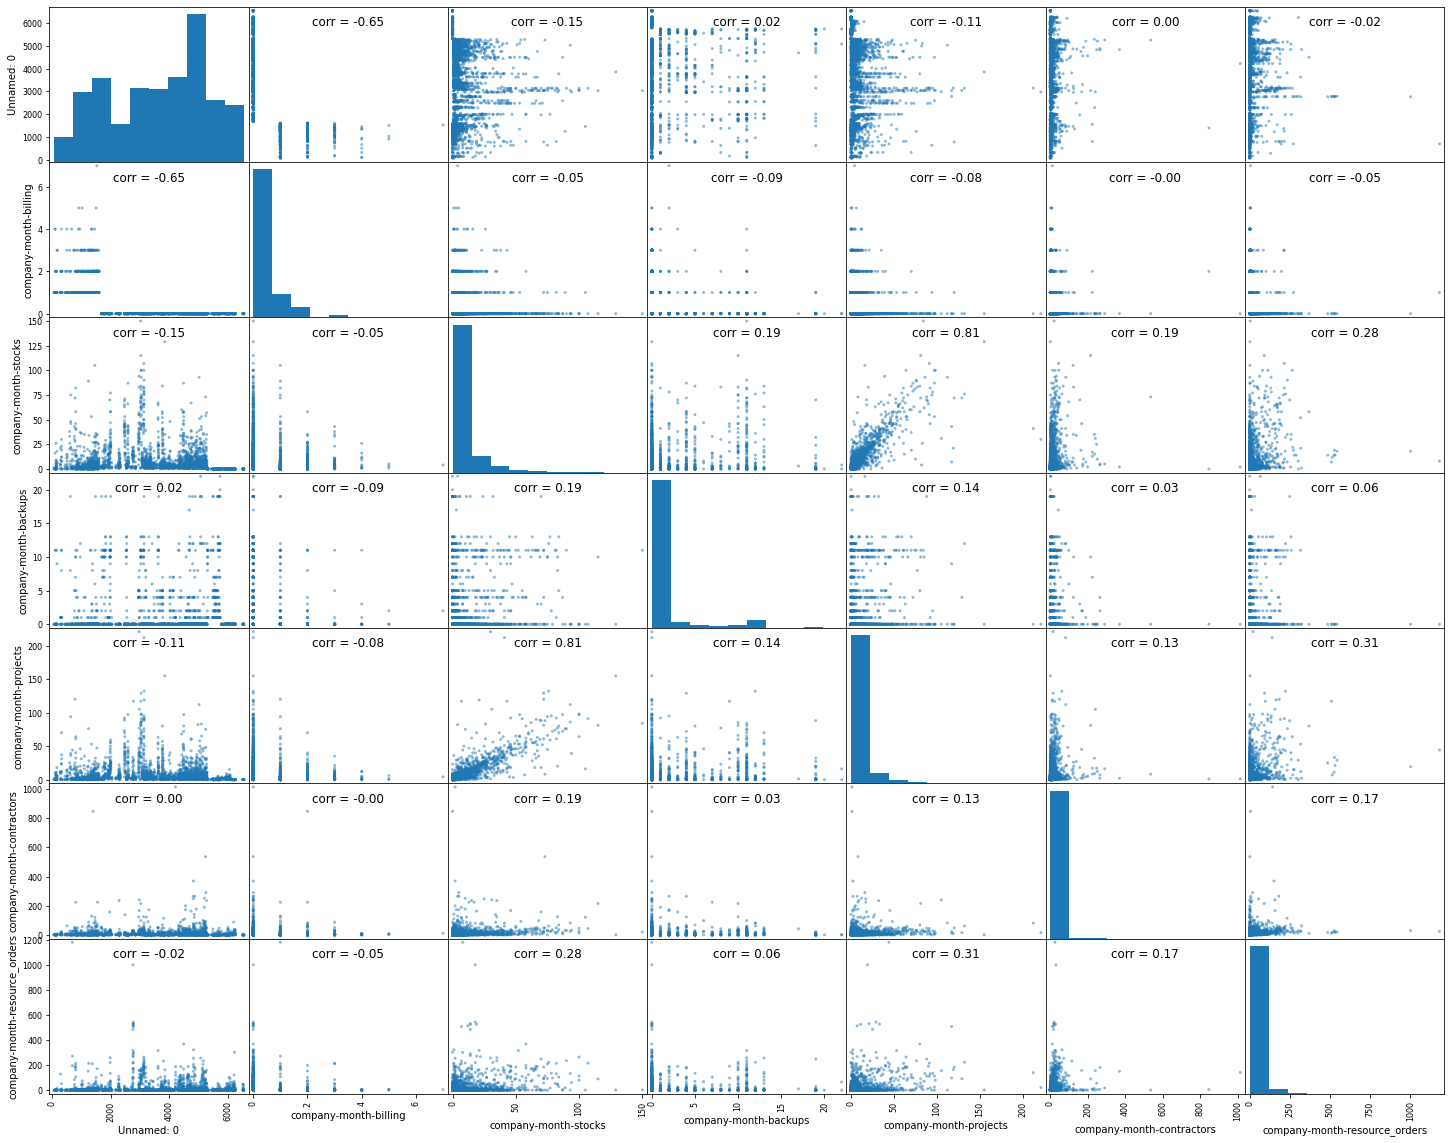

In [127]:
# создание scatter matrix с коэффициентами корреляции для retention компаний
scatter_matrix = pd.plotting.scatter_matrix(reten_comp_df, figsize=(25, 20))

# получение коэффициентов корреляции
correlation_matrix = reten_comp_df.corr()

# Добавление к каждому графику коэффициента корреляции
# перебираем каждый ряд в матрице графиков рассеяния
for i, row in enumerate(scatter_matrix):
    # перебираем каждый элемент в текущем ряду
    for j, ax in enumerate(row):
        # проверяем, что индексы не равны (не диагональные графики)
        if i != j:
            # добавляем аннотацию с коэффициентом корреляции на текущий график рассеяния
            ax.annotate(f'corr = {correlation_matrix.iloc[i, j]:.2f}',  # Значение коэффициента корреляции
                        xy=(0.5, 0.9),                                  # Координаты аннотации (в центре графика)
                        xycoords='axes fraction',                       # Координаты относительно размеров графика
                        ha='center', va='center',                       # Выравнивание текста
                        fontsize=12,                                    # Размер шрифта
                        color='black')                                  # Цвет текста

plt.show()

<br>

Churn группа.

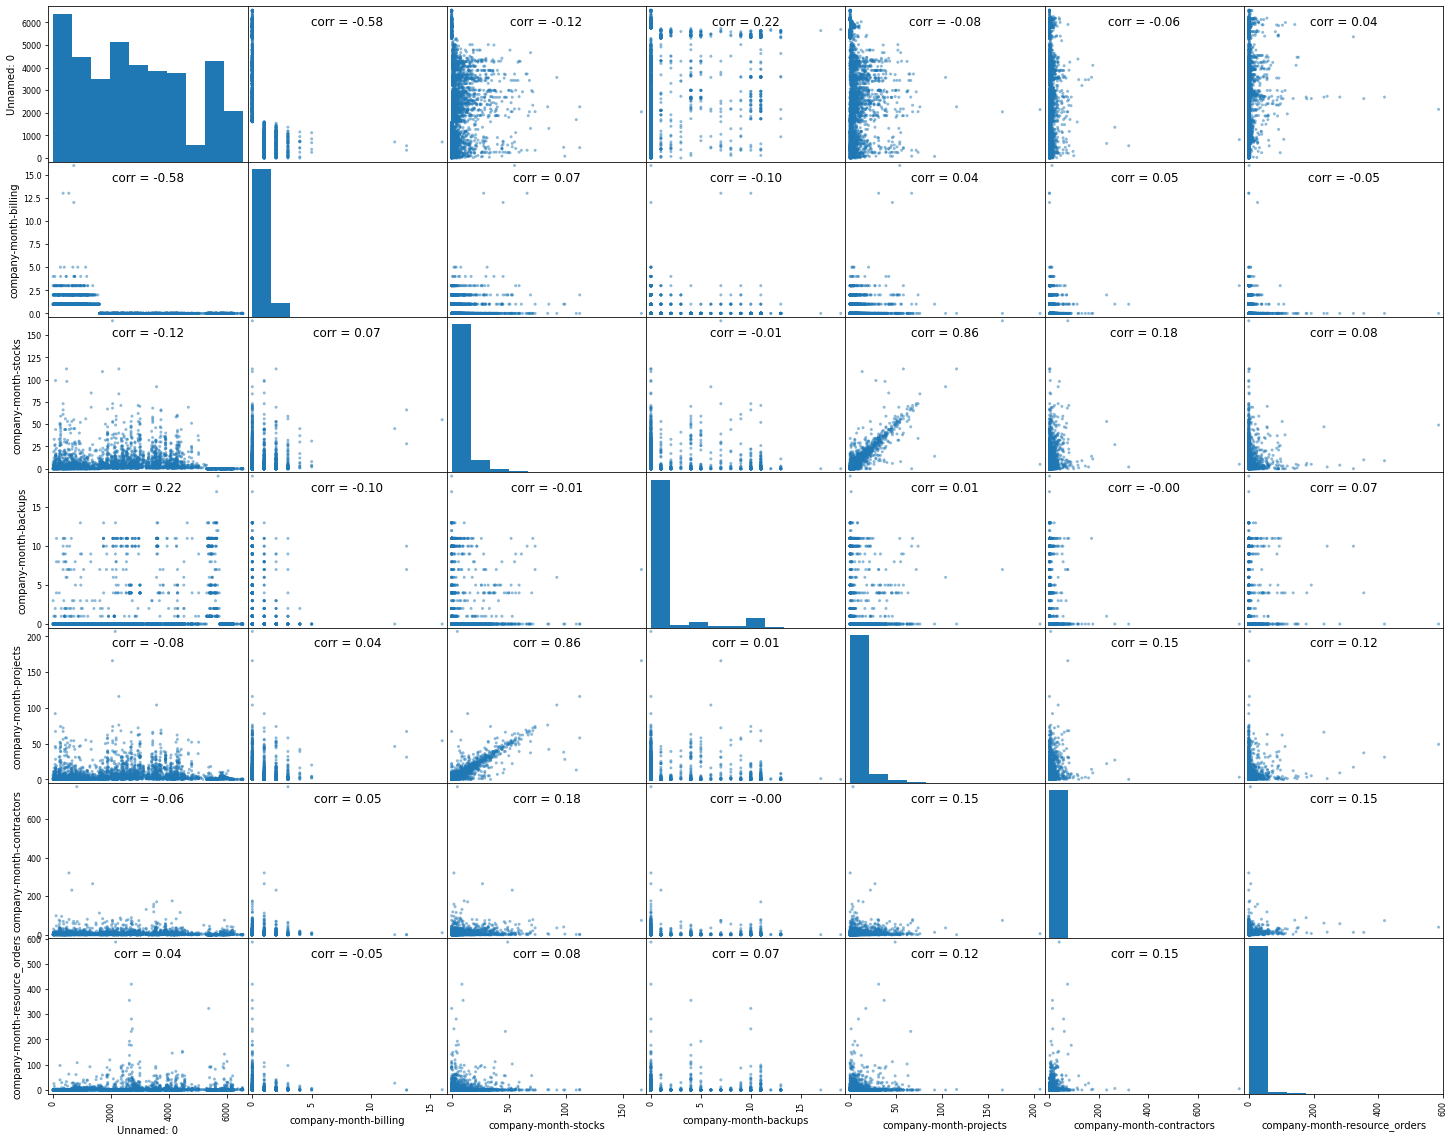

In [128]:
# Создание scatter matrix с коэффициентами корреляции для churn компаний
scatter_matrix = pd.plotting.scatter_matrix(churn_comp_df, figsize=(25, 20))

# Получение коэффициентов корреляции
correlation_matrix = churn_comp_df.corr()

# Перебираем каждый ряд в матрице графиков рассеяния
for i, row in enumerate(scatter_matrix):
    # Перебираем каждый элемент в текущем ряду
    for j, ax in enumerate(row):
        # Проверяем, что индексы не равны (не диагональные графики)
        if i != j:
            # Добавляем аннотацию с коэффициентом корреляции на текущий график рассеяния
            ax.annotate(f'corr = {correlation_matrix.iloc[i, j]:.2f}',  # Значение коэффициента корреляции
                        xy=(0.5, 0.9),                                  # Координаты аннотации (в центре графика)
                        xycoords='axes fraction',                       # Координаты относительно размеров графика
                        ha='center', va='center',                       # Выравнивание текста
                        fontsize=12,                                    # Размер шрифта
                        color='black')                                  # Цвет текста

plt.show()

В обеих группах среди всех числовых переменных только наблюдается значительная корреляция между количеством складов и количеством проектов — $0.81$ для retention группы и $0.86$ для churn группы.\
Это значит, что чем выше количество складов, тем выше количество проектов.

<br>

##### Суммы активностей

Попробуем разобраться, будут ли отличия, если мы:
* просуммируем активности по каждой компании в обеих группах **retention** и **churn**. Это скорее позволит описать портрет компаний.
* просуммируем активности всех компаний за каждый месяц в обеих группах **retention** и **churn**. Возможно, это позволит найти зависимость определённой активности от целевой переменной.

<br>

Присоединим колонку `retention` ко всей таблице с активностями.

In [129]:
# присоединение
activities_df = activities_df.merge(actual_last_billing_df[['company_id', 'retention']], on='company_id', how='inner')

<br>

##### Суммы активностей каждой компании за все месяцы 

Затем просуммируем активности по каждой компании за все месяцы, укажем статус retention, выведем среднее значение по каждому пункту активности.

In [130]:
# сводная таблица
total_activities = activities_df.groupby('company_id').agg(months_cnt=('month', 'count'),\
                                                          **{col: ('company-month-' + col, 'sum') for col in ['billing', 'stocks', 'backups', 'projects', 'contractors', 'resource_orders']})\
                                                      .reset_index()

# присоединение retention
total_activities = total_activities.merge(activities_df[['company_id', 'retention']].drop_duplicates(), on='company_id', how='inner')

# функция для создания колонок со средними значениями
def cr_col(avg_val, val):
    total_activities[avg_val] = round(total_activities[val] / total_activities['months_cnt'], 2)

# вызов функции
cr_col('avg_billing', 'billing')
cr_col('avg_stocks', 'stocks')
cr_col('avg_backups', 'backups')
cr_col('avg_projects', 'projects')
cr_col('avg_contractors', 'contractors')
cr_col('avg_resource_orders', 'resource_orders')

total_activities

company_id  months_cnt  billing  stocks  backups  projects  contractors  \
0            1          21        7      59       17        57           22   
1           21          24       21      84        0        83          127   
2           30          24       11      62        3        61          142   
3          108           6        4      10        1        10           21   
4          116          19        5      52        0        50           61   
..         ...         ...      ...     ...      ...       ...          ...   
711       9777           2        3       2        0         2            3   
712       9802           2        2      23        0        23            7   
713       9815           3        2      12        0        11            5   
714       9817           3        2      13        0        13            5   
715       9931           2        2      18        0        17           19   

     resource_orders  retention  avg_billing  avg_stocks  avg_backups  \
0                  0      False         0.33        2.81         0.81   
1                 15      False         0.88        3.50         0.00   
2                  0      False         0.46        2.58         0.12   
3                  0      False         0.67        1.67         0.17   
4                 69      False         0.26        2.74         0.00   
..               ...        ...          ...         ...          ...   
711                8       True         1.50        1.00         0.00   
712                9       True         1.00       11.50         0.00   
713                9       True         0.67        4.00         0.00   
714                5       True         0.67        4.33         0.00   
715               38       True         1.00        9.00         0.00   

     avg_projects  avg_contractors  avg_resource_orders  
0            2.71             1.05                 0.00  
1            3.46             5.29                 0.62  
2            2.54             5.92                 0.00  
3            1.67             3.50                 0.00  
4            2.63             3.21                 3.63  
..            ...              ...                  ...  
711          1.00             1.50                 4.00  
712         11.50             3.50                 4.50  
713          3.67             1.67                 3.00  
714          4.33             1.67                 1.67  
715          8.50             9.50                19.00  

[716 rows x 15 columns]

<br>

Построим диаграммы размаха в обеих группах, чтобы узнать отличия в распределенях боксплотов.

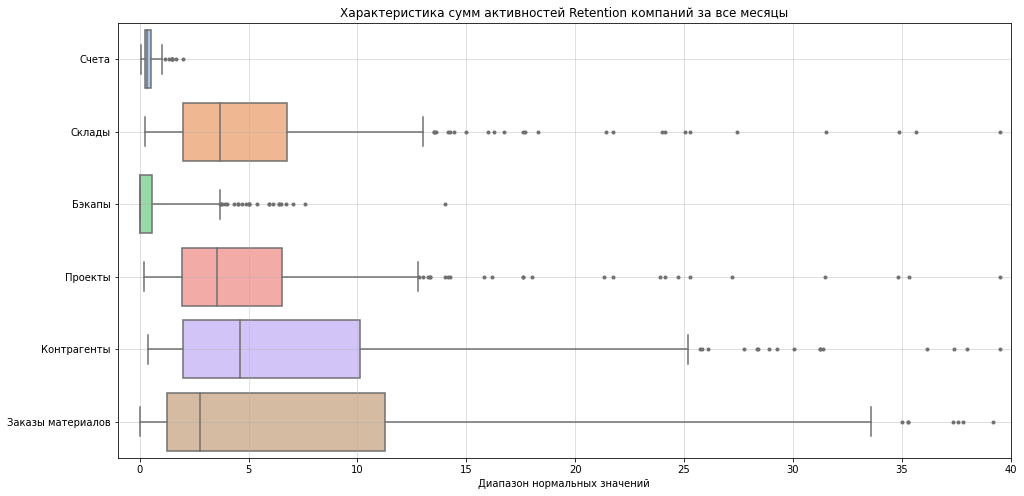

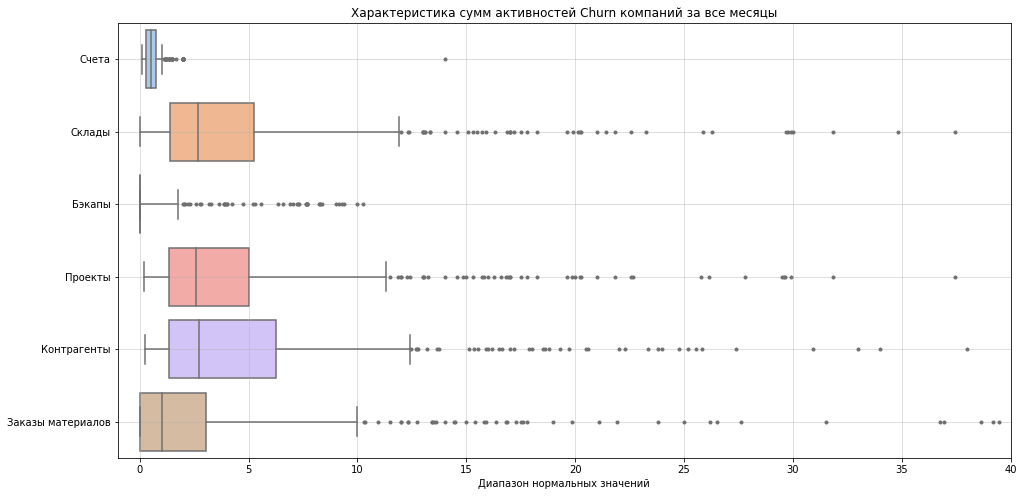

In [131]:
# неушедшие компании
plt.figure(figsize=(16, 8))
boxplot = sns.boxplot(data=total_activities[total_activities['retention'] == True][['avg_billing',
                                                                                    'avg_stocks',
                                                                                    'avg_backups',
                                                                                    'avg_projects',
                                                                                    'avg_contractors',
                                                                                    'avg_resource_orders']],
                      palette='pastel',
                      orient='h',
                      whis=(0, 90),
                      flierprops=dict(marker='o', markersize=3))

# настройка графика
plt.title('Характеристика сумм активностей Retention компаний за все месяцы')
plt.xlabel('Диапазон нормальных значений')
plt.grid(True, alpha=0.5)
plt.xlim(-1, 40)

# установка целых чисел на оси X
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))  

# заголовки диаграмм
boxplot.set_yticklabels(['Счета', 'Склады', 'Бэкапы', 'Проекты', 'Контрагенты', 'Заказы материалов'])


# ушедшие компании
plt.figure(figsize=(16, 8))
boxplot = sns.boxplot(data=total_activities[total_activities['retention'] == False][['avg_billing',
                                                                                     'avg_stocks',
                                                                                     'avg_backups',
                                                                                     'avg_projects',
                                                                                     'avg_contractors',
                                                                                     'avg_resource_orders']],
                      palette='pastel',
                      orient='h',
                      whis=(0, 90),
                      flierprops=dict(marker='o', markersize=3))

# настройка графика
plt.title('Характеристика сумм активностей Churn компаний за все месяцы')
plt.xlabel('Диапазон нормальных значений')
plt.grid(True, alpha=0.5)
plt.xlim(-1, 40)


# установка целых чисел на оси X
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))  

# заголовки диаграмм
boxplot.set_yticklabels(['Счета', 'Склады', 'Бэкапы', 'Проекты', 'Контрагенты', 'Заказы материалов'])

plt.show()

**В глаза сильно бросается, что заказов материалов и контрагентов в группе retention значительно больше, чем в группе churn.**

**Выходит, заметна связь между уходом компании и количеством контрагентов и заказов материалов.**

<br>

##### Корреляция переменных 

В обеих группах попробуем поискать корреляцию между числовыми данными.

Retention группа.

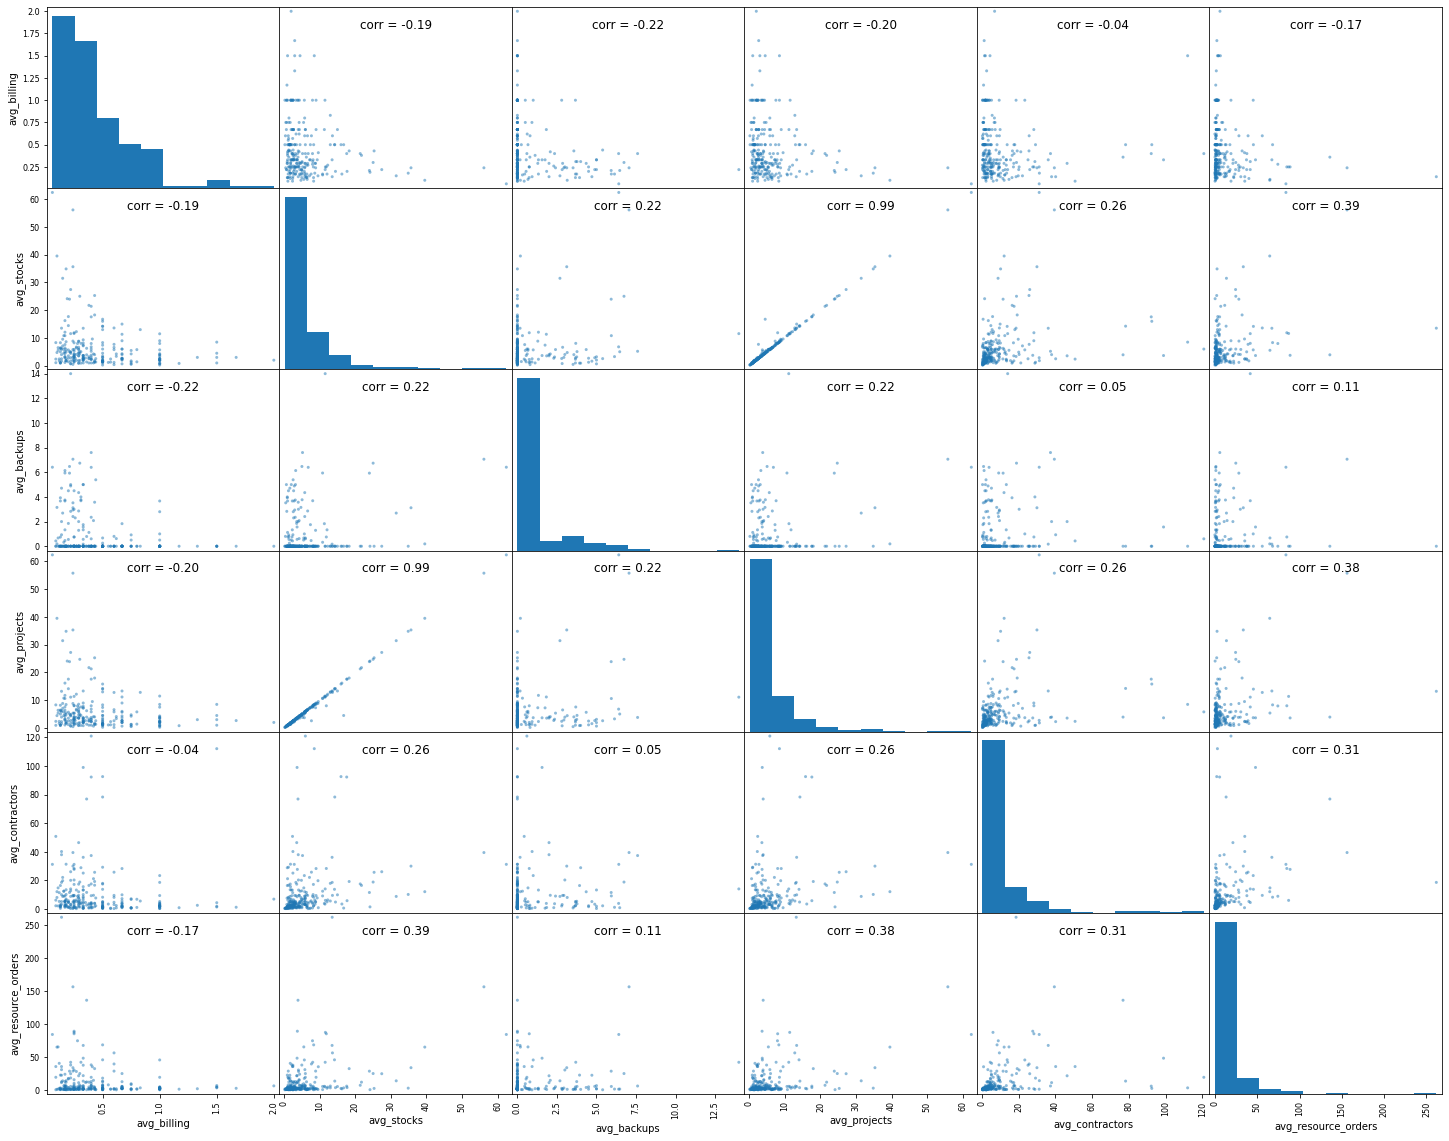

In [132]:
# Создание scatter matrix с коэффициентами корреляции для churn компаний
scatter_matrix = pd.plotting.scatter_matrix(total_activities[total_activities['retention'] == True][['avg_billing', 'avg_stocks', 'avg_backups', 'avg_projects', 'avg_contractors', 'avg_resource_orders']], figsize=(25, 20))

# Получение коэффициентов корреляции
correlation_matrix = total_activities[total_activities['retention'] == True][['avg_billing', 'avg_stocks', 'avg_backups', 'avg_projects', 'avg_contractors', 'avg_resource_orders']].corr()

# Перебираем каждый ряд в матрице графиков рассеяния
for i, row in enumerate(scatter_matrix):
    # Перебираем каждый элемент в текущем ряду
    for j, ax in enumerate(row):
        # Проверяем, что индексы не равны (не диагональные графики)
        if i != j:
            # Добавляем аннотацию с коэффициентом корреляции на текущий график рассеяния
            ax.annotate(f'corr = {correlation_matrix.iloc[i, j]:.2f}',  # Значение коэффициента корреляции
                        xy=(0.5, 0.9),                                  # Координаты аннотации (в центре графика)
                        xycoords='axes fraction',                       # Координаты относительно размеров графика
                        ha='center', va='center',                       # Выравнивание текста
                        fontsize=12,                                    # Размер шрифта
                        color='black')                                  # Цвет текста

plt.show()

<br>

Churn группа.

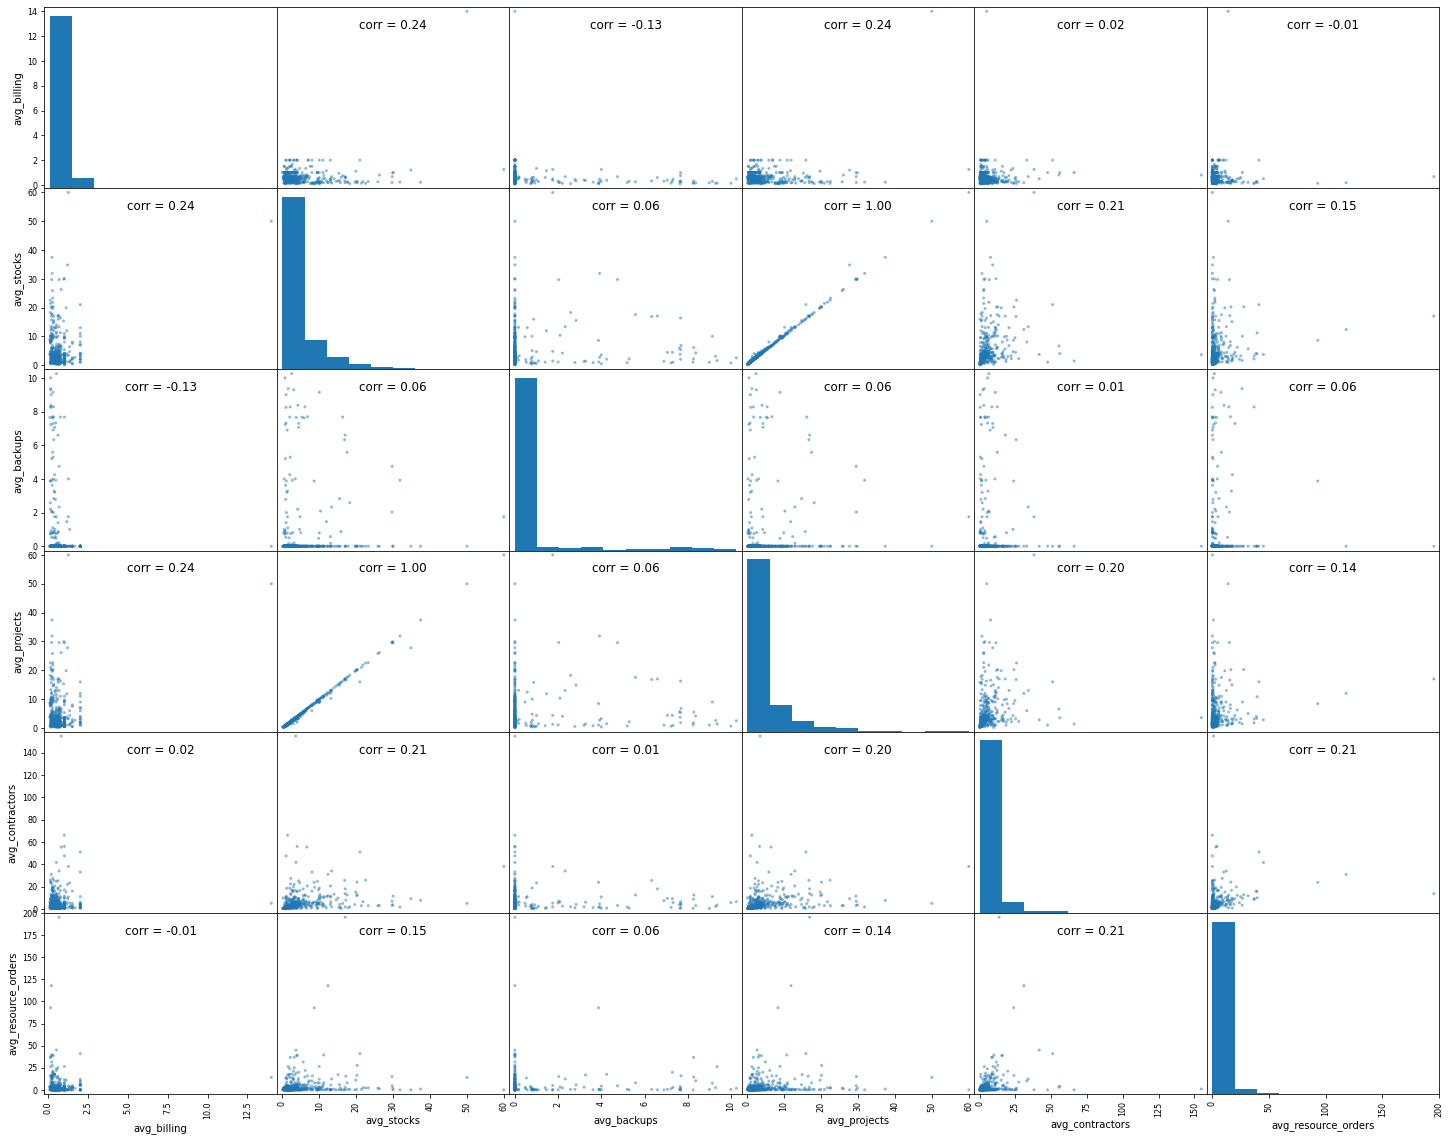

In [133]:
# Создание scatter matrix с коэффициентами корреляции для churn компаний
scatter_matrix = pd.plotting.scatter_matrix(total_activities[total_activities['retention'] == False][['avg_billing', 'avg_stocks', 'avg_backups', 'avg_projects', 'avg_contractors', 'avg_resource_orders']], figsize=(25, 20))

# Получение коэффициентов корреляции
correlation_matrix = total_activities[total_activities['retention'] == False][['avg_billing', 'avg_stocks', 'avg_backups', 'avg_projects', 'avg_contractors', 'avg_resource_orders']].corr()

# Перебираем каждый ряд в матрице графиков рассеяния
for i, row in enumerate(scatter_matrix):
    # Перебираем каждый элемент в текущем ряду
    for j, ax in enumerate(row):
        # Проверяем, что индексы не равны (не диагональные графики)
        if i != j:
            # Добавляем аннотацию с коэффициентом корреляции на текущий график рассеяния
            ax.annotate(f'corr = {correlation_matrix.iloc[i, j]:.2f}',  # Значение коэффициента корреляции
                        xy=(0.5, 0.9),                                  # Координаты аннотации (в центре графика)
                        xycoords='axes fraction',                       # Координаты относительно размеров графика
                        ha='center', va='center',                       # Выравнивание текста
                        fontsize=12,                                    # Размер шрифта
                        color='black')                                  # Цвет текста

plt.show()

<br>

В обеих группах среди всех числовых переменных приметно наблюдается корреляция только между количеством складов и количеством проектов, которая принимает значение $1$ для обеих групп, как для Retention, так и для Churn.\
Это всегда значит, что чем больше складов, тем больше проектов.

<br>

##### Суммы активностей всех компании за каждый месяц 

Для этого сделаем сводные таблицы, в которых сгруппируем все данные по месяцам и просуммируем их.\
Сделаем в отдельности для retention и churn групп.

In [134]:
# retention группа
total_activities_ret = activities_df[activities_df['retention'] == True].groupby('month')\
                                                                        .agg(**{col: ('company-month-' + col, 'sum') for col in ['billing',
                                                                                                                                 'stocks',
                                                                                                                                 'backups',
                                                                                                                                 'projects',
                                                                                                                                 'contractors',
                                                                                                                                 'resource_orders']})\
                                                                        .reset_index()
total_activities_ret.sample(10)

month  billing  stocks  backups  projects  contractors  \
27 2021-12-01       23     401       51       389          456   
9  2020-06-01        0      10       32         7            4   
39 2022-12-01       24     476      153       418          452   
16 2021-01-01        0      38       27        40           26   
25 2021-10-01       10     440       42       359          158   
53 2024-02-01       33    1116       29      1530         1432   
8  2020-05-01        0       8        0         5            3   
44 2023-05-01       25     921        0       755          931   
21 2021-06-01        4     182       22       176          124   
32 2022-05-01       26     579       91       449          290   

    resource_orders  
27              427  
9                 0  
39             1407  
16                0  
25              439  
53             3793  
8                 0  
44             1789  
21               53  
32              764

<br>

In [135]:
# churn группа
total_activities_churn = activities_df[activities_df['retention'] == False].groupby('month')\
                                                                           .agg(**{col: ('company-month-' + col, 'sum') for col in ['billing',
                                                                                                                                    'stocks',
                                                                                                                                    'backups',
                                                                                                                                    'projects',
                                                                                                                                    'contractors',
                                                                                                                                    'resource_orders']})\
                                                                           .reset_index()
total_activities_churn.sample(10)

month  billing  stocks  backups  projects  contractors  \
25 2021-02-01       39     580       53       550          550   
49 2023-02-01       13     423       45       444          233   
19 2020-08-01       47     415        0       443          356   
43 2022-08-01       12     776      120       724          695   
24 2021-01-01       33     514       45       473          322   
47 2022-12-01       13     366      116       334          288   
42 2022-07-01       28     753      124       721          447   
48 2023-01-01       13     336      130       378          267   
17 2020-06-01       32     293       14       213          207   
11 2019-12-01       22       0        0        21           37   

    resource_orders  
25                0  
49              282  
19                0  
43              699  
24                0  
47              196  
42              591  
48              232  
17                0  
11                0

<br>

Визуализируем активности групп диаграммами с областями.

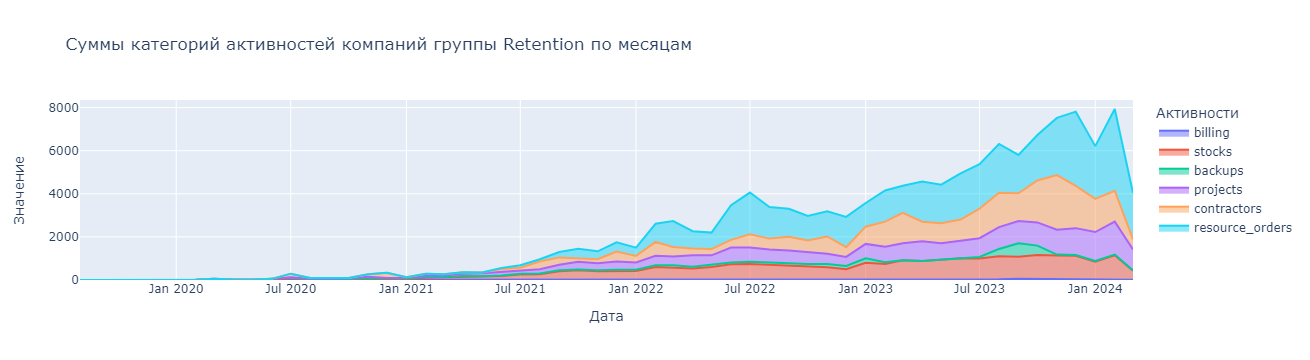

In [136]:
# retention группа
px.area(total_activities_ret,
        x='month',
        y=['billing', 'stocks', 'backups', 'projects', 'contractors', 'resource_orders'],
        title='Суммы категорий активностей компаний группы Retention по месяцам',
        labels={'month': 'Дата',
                'value': 'Значение',
                'variable': 'Активности'})

Чем ближе дата к сегодняшней, тем больше активностей проявляют компании, у которых есть подписка, логично.

<br>

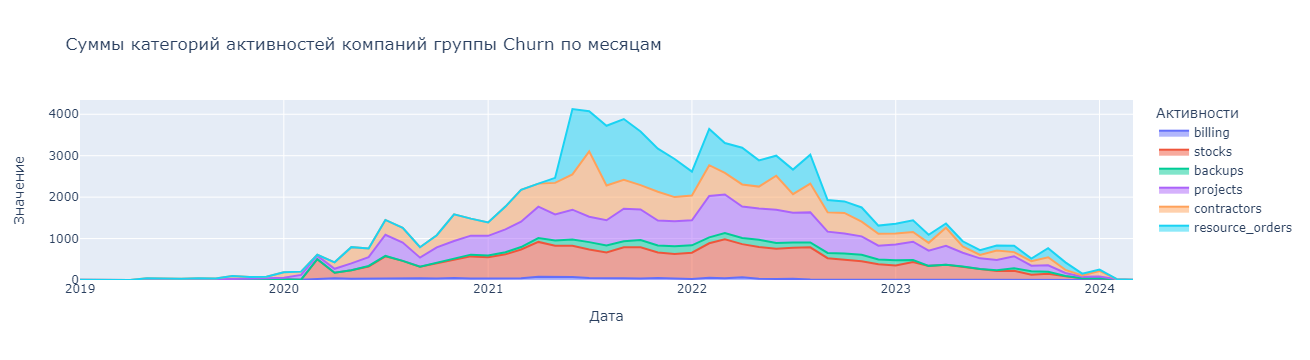

In [137]:
# churn группа
px.area(total_activities_churn,
        x='month',
        y=['billing', 'stocks', 'backups', 'projects', 'contractors', 'resource_orders'],
        title='Суммы категорий активностей компаний группы Churn по месяцам',
        labels={'month': 'Дата',
                'value': 'Значение',
                'variable': 'Активности'})

Компании, подписка которых исчерпалась, имеют пик активностей на середине истории Gectaro, в период с середины 2021 по середину 2022 года.

Смотря на два этих графика, складывается впечатление, что срок жизни компаний имеют цикл, и рано или поздно одни компании сменяют другие.

<br>

Также построим нормированные диаграммы с областями.

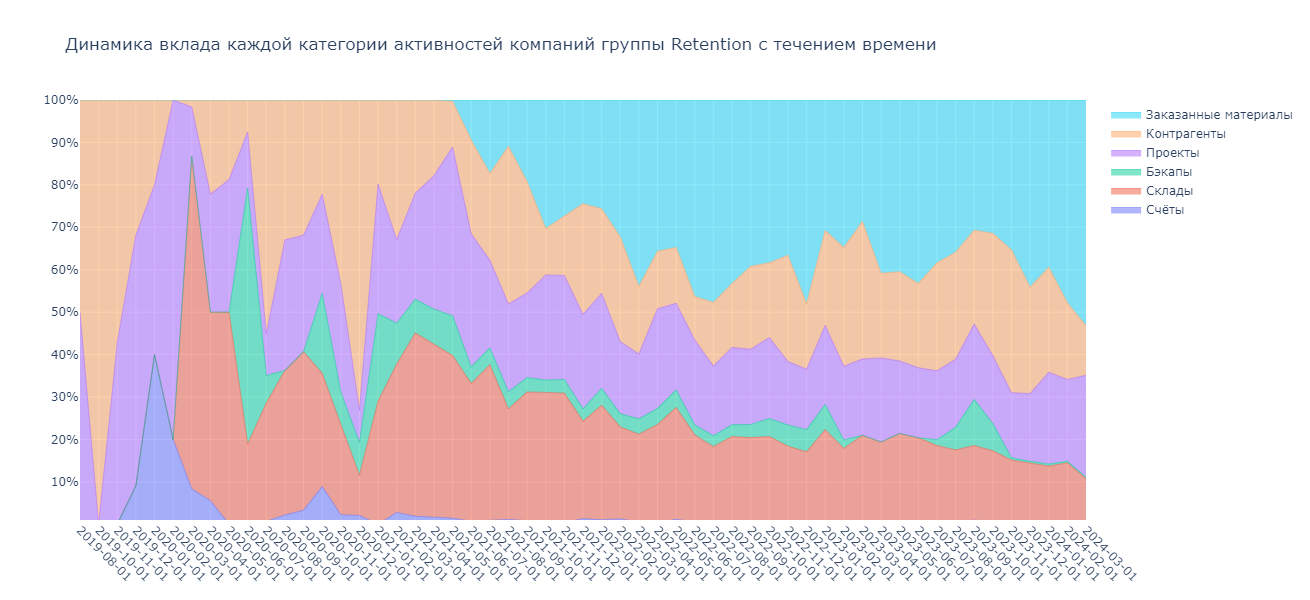

In [138]:
# retention группа

x = total_activities_ret['month'].astype('str')
fig = go.Figure()

fig.add_trace(go.Scatter(x=x,
                         y=total_activities_ret['billing'],
                         mode='lines',
                         line=dict(width=0.5),
                         stackgroup='one',
                         groupnorm='percent',
                         name='Счёты'))

fig.add_trace(go.Scatter(x=x,
                         y=total_activities_ret['stocks'],
                         mode='lines',
                         line=dict(width=0.5),
                         stackgroup='one',
                         name='Склады'))

fig.add_trace(go.Scatter(x=x,
                         y=total_activities_ret['backups'],
                         mode='lines',
                         line=dict(width=0.5),
                         stackgroup='one',
                         name='Бэкапы'))

fig.add_trace(go.Scatter(x=x,
                         y=total_activities_ret['projects'],
                         mode='lines',
                         line=dict(width=0.5),
                         stackgroup='one',
                         name='Проекты'))

fig.add_trace(go.Scatter(x=x,
                         y=total_activities_ret['contractors'],
                         mode='lines',
                         line=dict(width=0.5),
                         stackgroup='one',
                         name='Контрагенты'))

fig.add_trace(go.Scatter(x=x,
                         y=total_activities_ret['resource_orders'],
                         mode='lines',
                         line=dict(width=0.5),
                         stackgroup='one',
                         name='Заказанные материалы'))

fig.update_layout(title_text='Динамика вклада каждой категории активностей компаний группы Retention с течением времени',
                  showlegend=True,
                  xaxis=dict(type='category',
                             tickmode='linear'),
                  yaxis=dict(type='linear',
                             range=[1, 100],
                             ticksuffix='%'),
                  height=600)

fig.update_xaxes(tickangle=45)

fig.show()

<br>

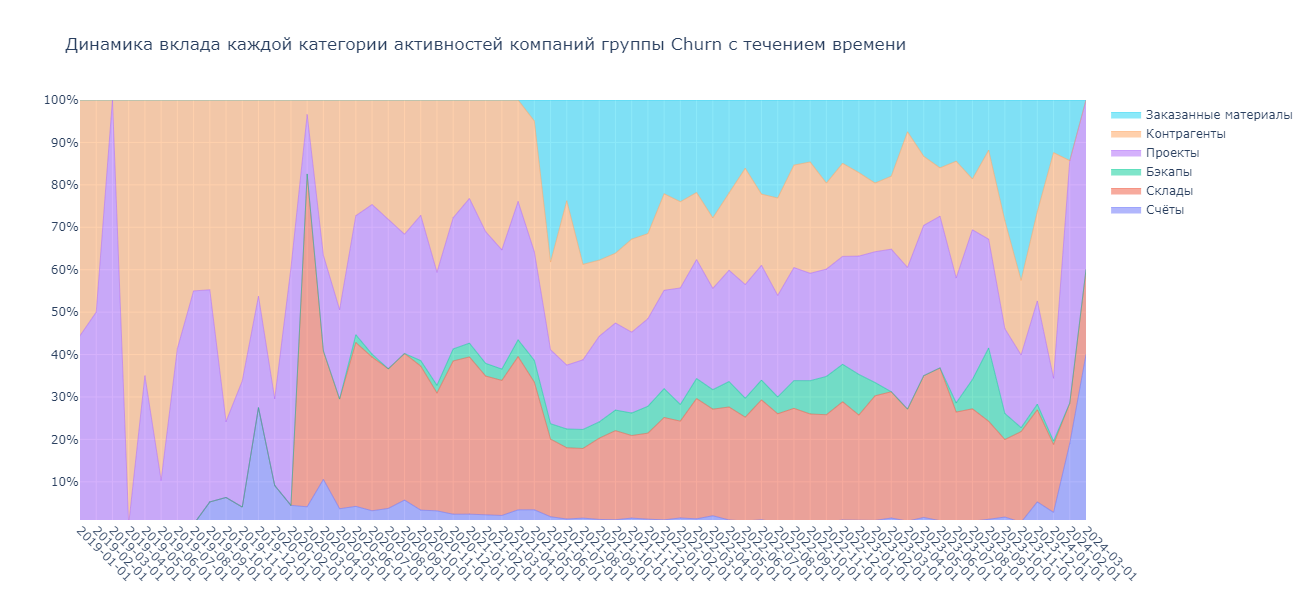

In [139]:
# churn группа

x = total_activities_churn['month'].astype('str')
fig = go.Figure()

fig.add_trace(go.Scatter(x=x,
                         y=total_activities_churn['billing'],
                         mode='lines',
                         line=dict(width=0.5),
                         stackgroup='one',
                         groupnorm='percent',
                         name='Счёты'))

fig.add_trace(go.Scatter(x=x,
                         y=total_activities_churn['stocks'],
                         mode='lines',
                         line=dict(width=0.5),
                         stackgroup='one',
                         name='Склады'))

fig.add_trace(go.Scatter(x=x,
                         y=total_activities_churn['backups'],
                         mode='lines',
                         line=dict(width=0.5),
                         stackgroup='one',
                         name='Бэкапы'))

fig.add_trace(go.Scatter(x=x,
                         y=total_activities_churn['projects'],
                         mode='lines',
                         line=dict(width=0.5),
                         stackgroup='one',
                         name='Проекты'))

fig.add_trace(go.Scatter(x=x,
                         y=total_activities_churn['contractors'],
                         mode='lines',
                         line=dict(width=0.5),
                         stackgroup='one',
                         name='Контрагенты'))

fig.add_trace(go.Scatter(x=x,
                         y=total_activities_churn['resource_orders'],
                         mode='lines',
                         line=dict(width=0.5),
                         stackgroup='one',
                         name='Заказанные материалы'))

fig.update_layout(title_text='Динамика вклада каждой категории активностей компаний группы Churn с течением времени',
                  showlegend=True,
                  xaxis=dict(type='category',
                             tickmode='linear'),
                  yaxis=dict(type='linear',
                             range=[1, 100],
                             ticksuffix='%'),
                  height=600)

fig.update_xaxes(tickangle=45)

fig.show()

Среди двух этих графиков однозначно можно сказать одно: функцию заказа материалов ввели в мае $2021$ года.

Области активностей компаний группы Retention кажутся более сглаженными, сбалансированными, начиная с того момента, когда ввели эту фичу заказа материалов.\
Кроме того, эта функция занимает львиную долю у этих компаний.

Области группы Churn выглядят более рваными и менее сбалансированными: доля заказов материалов мала, доля контрагентов чуть больше, а доля проектов велика.

<br>

#### Как актуальные компании платят по счетам

In [140]:
actual_last_billing_df.head()

Unnamed: 0 user_id company_id billing_tariff_id         payed_until  \
6           43    2707       2353                 2 2021-06-30 00:00:00   
8           57     531        483                 4 2022-01-11 23:59:59   
10          66    2989       2565                 2 2021-07-11 00:00:00   
13          79    4451       3633                 7 2021-08-13 00:00:00   
21         102    4857       3917                 2 2021-09-06 00:00:00   

    is_payed          created_at          updated_at billing_tariff_price_id  \
6       True 2020-12-29 07:31:09 2020-12-30 11:48:13                       7   
8      False 2021-01-11 05:14:11 2021-01-11 05:14:11                      16   
10     False 2021-01-11 14:53:13 2021-01-11 14:53:34                       7   
13      True 2021-07-21 09:04:55 2021-08-11 10:55:48                      23   
21      True 2021-08-05 14:35:46 2021-09-06 13:24:24                      35   

                                        comment   pay_date tariff_group  \
6                         30,12 - пришла оплата 2020-12-29      Базовый   
8                                           NaN        NaT        Старт   
10                                          NaN        NaT      Базовый   
13  оплата пришла 5,08\r\nПереоткрыла другой лк 2021-08-05        Старт   
21             24 + 4 мес\r\n06.09,2021 Возврат 2021-08-06      Базовый   

   subscription_last_date  days_diff  retention  
6     2021-06-30 00:00:00       1002      False  
8     2022-01-11 23:59:59        806      False  
10    2021-07-11 00:00:00        991      False  
13    2021-08-13 00:00:00        958      False  
21    2021-09-06 00:00:00        934      False

Мы знаем, что тарифы `billing_tariff_id` поделены на 4 категории `tariff_group`:
* Стартовый ($4$, $7$, $8$, $11$, $19$)
* Базовый ($2$, $17$)
* Бизнес ($9$, $20$)
* Профи ($3$, $10$, $13$, $21$)

Как раньше было отмечено, поступила информация, что номера тарифов внутри группы фактически ничем не отличаются.\
Поэтому будем учитывать эти $4$ категории без номеров их тарифов.

<br>

Сделаем сводную таблицу, которая покажет распределение категорий тарифов по **retention** и **churn** компаниям.\
Эта таблица будет основой для круговых диаграмм.

In [141]:
# retention компании
tariff_group_retention = actual_last_billing_df[actual_last_billing_df['retention'] == True].groupby('tariff_group')\
                                                                                            .agg(companies=('tariff_group', 'count'))\
                                                                                            .reset_index()\
# churn компании
tariff_group_churn = actual_last_billing_df[actual_last_billing_df['retention'] == False].groupby('tariff_group')\
                                                                                         .agg(companies=('tariff_group', 'count'))\
                                                                                         .reset_index()
# объединение
tariff_group_companies = tariff_group_retention.merge(tariff_group_churn, on='tariff_group', how='inner')

# суммирование
tariff_group_companies['both_groups'] = tariff_group_companies['companies_x'] + tariff_group_companies['companies_y']

# переименование
tariff_group_companies = tariff_group_companies.rename(columns={'companies_x': 'reten_group',
                                                                'companies_y': 'churn_group'})\
                                               .sort_values(by='both_groups', ascending=False)

tariff_group_companies

tariff_group  reten_group  churn_group  both_groups
1      Базовый          127          196          323
4        Старт           83          227          310
2       Бизнес           33           19           52
3        Профи            8           17           25
0     Архивный            1            5            6

<br>

Отобразим распределение в столбчатых диаграммах.\
Для этого нужно создать ещё одну сводную таблицу.

In [142]:
# сводная таблица
tariff_group_companies_2 = actual_last_billing_df.groupby(['tariff_group', 'retention']).agg(companies=('tariff_group', 'count')).reset_index()

# суммирование кол-ва тарифов внутри окна группы тарифа
tariff_group_companies_2['tariff_total_companies'] = tariff_group_companies_2.groupby('tariff_group')['companies'].transform('sum')

# сортировка
tariff_group_companies_2 = tariff_group_companies_2.sort_values(by='tariff_total_companies', ascending=False)

tariff_group_companies_2

tariff_group  retention  companies  tariff_total_companies
2      Базовый      False        196                     323
3      Базовый       True        127                     323
8        Старт      False        227                     310
9        Старт       True         83                     310
4       Бизнес      False         19                      52
5       Бизнес       True         33                      52
6        Профи      False         17                      25
7        Профи       True          8                      25
0     Архивный      False          5                       6
1     Архивный       True          1                       6

<br>

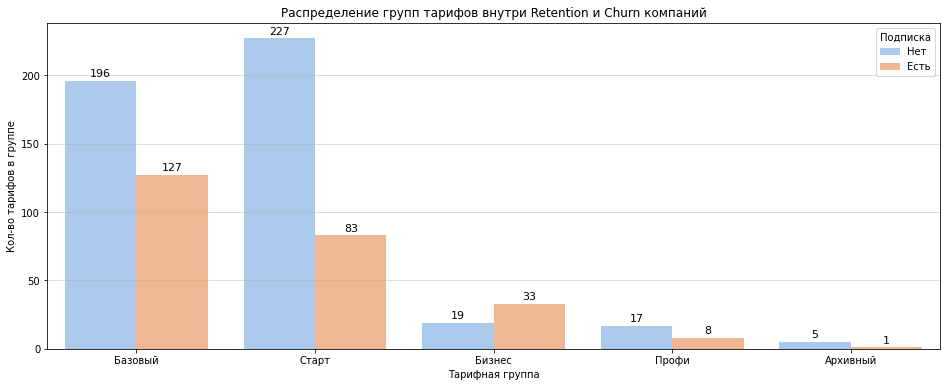

In [143]:
# Создание столбчатой диаграммы
plt.figure(figsize=(16, 6))

ax = sns.barplot(data=tariff_group_companies_2,
                 x='tariff_group',
                 y='companies',
                 hue='retention',
                 palette='pastel')

plt.title('Распределение групп тарифов внутри Retention и Churn компаний')
plt.xlabel('Тарифная группа')
plt.ylabel('Кол-во тарифов в группе')

plt.grid(axis='y', alpha=0.5)

# Добавление текстовой аннотации над каждой колонкой
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{int(height)}',  # Форматирование числа без десятичных знаков
            ha='center',
            fontsize=11)
    
handles, _ = ax.get_legend_handles_labels() 
ax.legend(handles=handles, labels=['Нет', 'Есть'], title='Подписка')

plt.show()

<br>

Отобразим распределение в круговых диаграммах.

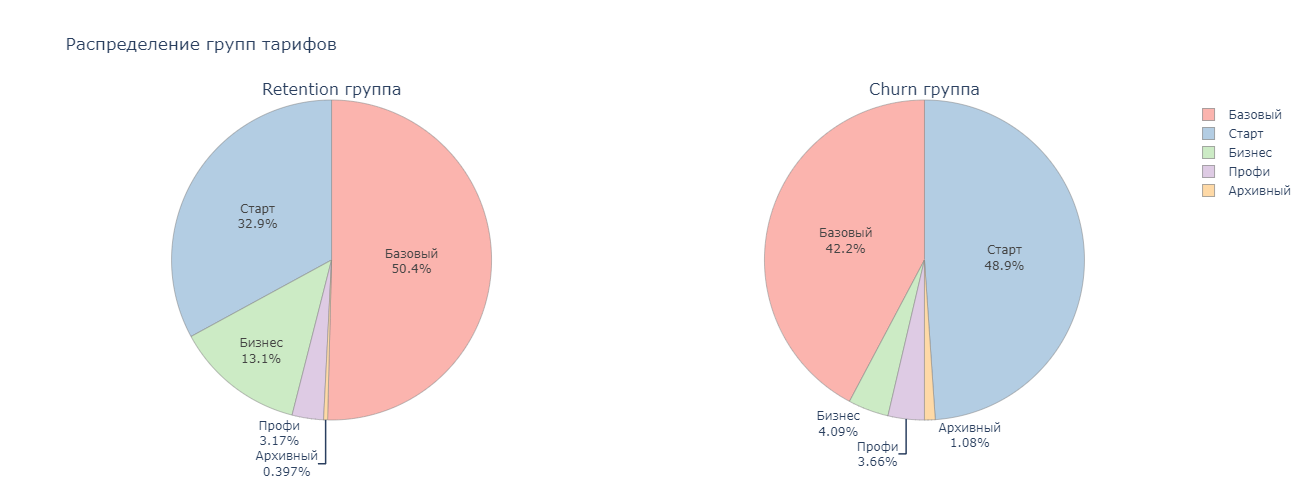

In [144]:
# круговые диаграммы (2)
fig = make_subplots(rows=1, cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Retention группа', 'Churn группа'])
    
fig.add_trace(go.Pie(labels=tariff_group_companies['tariff_group'],
                        values=tariff_group_companies['reten_group'],
                        marker_line_color='#808080',
                        marker_line_width=0.5), 1, 1)
    
fig.add_trace(go.Pie(labels=tariff_group_companies['tariff_group'],
                        values=tariff_group_companies['churn_group'],
                        marker_line_color='#808080',
                        marker_line_width=0.5), 1, 2)

fig.update_layout(title_text='Распределение групп тарифов',
                    height=500,
                    colorway=px.colors.qualitative.Pastel1 + px.colors.qualitative.Pastel2)

fig.update_traces(textinfo='percent+label')

fig.show()

Есть отличия в распределении долей групп retention и churn по тарифам базовый, старт, бизнес.

<span style="font-weight: 600">Какими тарифами пользуются компании, у которых действует подписка Gectaro на данный момент:</span>
1. Базовый ($127$ компаний, $50.4\%$ от всех внутри retention)
2. Старт ($83$ компаний, $32.9\%$)
3. Бизнес ($33$ компании, $13.1\%$)
4. Профи ($8$ компаний, $3.17\%$)
5. Архивный ($1$ компания, $0.39\%$)

<span style="font-weight: 600">Какими последними тарифами пользовались компании, у которых нет подписки Gectaro на данный момент:</span>
1. Старт ($227$ компаний, $48.9\%$ от всех внутри churn)
2. Базовый ($196$ компаний, $42.2\%$)
3. Бизнес ($19$ компании, $4.09\%$)
4. Профи ($17$ компаний, $3.66\%$)
5. Архивный ($5$ компаний, $1.08\%$)

Компании группы retention больше предпочитают пользоваться базовой версией, она дороже и даёт больше возможностей пользующейся компании.\
Если смотреть на тариф бизнес, то этих компаний в процентном соотношений больше в retention, чем в churn группе.\
Есть ещё мелкие детали. Только пока все эти наблюдения не указывают на причину оттока компаний из сервиса.

<br>

<br>

#### Портрет компаний

Нам интересно посмотреть, какое в какой области специализируются компании, когда они были созданы и сколько сотрудников у них работает.\
Эта информация есть в таблице `actual_companies_df`.

Но сначала нужно дать этим компаниям их статус `retention`, присоединив колонку `retention` к таблице `actual_companies_df`.

In [145]:
# присоединение
actual_companies_df = actual_companies_df.merge(actual_last_billing_df[['company_id', 'retention']], on='company_id')

In [146]:
actual_companies_df.head()

Unnamed: 0 company_id working_direction employee_count_interval  \
0          19        514              None                       1   
1          57        383     Строительство                       2   
2          69        495              None                       1   
3          75        724              None                       1   
4          99        471              None                       1   

           created_at          updated_at billing_tariff_id  billing_is_over  \
0 2019-10-17 12:50:35 2022-12-06 03:45:14                 4             True   
1 2019-07-26 12:02:45 2023-02-16 12:20:50                 7            False   
2 2019-10-08 11:54:55 2020-08-24 15:08:34                 2            False   
3 2020-01-20 09:59:53 2022-12-06 03:44:54                 4             True   
4 2019-09-24 12:26:57 2022-12-06 03:46:00                 7             True   

  working_category number_of_employees  retention  
0       Неизвестно                 1-4      False  
1    Строительство                5-10      False  
2       Неизвестно                 1-4       True  
3       Неизвестно                 1-4      False  
4       Неизвестно                 1-4      False

<br>

##### Направление деятельности

Посмотрим направления деятельности актуальных компаний.

Создадим сводную таблицу со всеми вычислениями.

In [147]:
actual_companies_pt = actual_companies_df.groupby(['working_category', 'retention']).agg(companies=('company_id', 'count')).reset_index()

In [148]:
actual_companies_pt['work_cat_companies'] = actual_companies_pt.groupby('working_category')['companies'].transform('sum')

In [149]:
actual_companies_pt = actual_companies_pt.sort_values(by='work_cat_companies', ascending=False)
actual_companies_pt

working_category  retention  companies  work_cat_companies
2       Неизвестно      False        299                 455
3       Неизвестно       True        156                 455
6    Строительство      False        108                 184
7    Строительство       True         76                 184
0           Другое      False         32                  44
1           Другое       True         12                  44
4           Ремонт      False         25                  33
5           Ремонт       True          8                  33

<br>

Построим групповую столбчатую диаграмму.

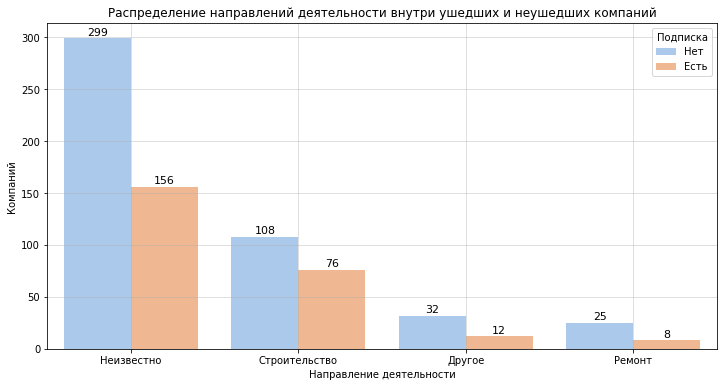

In [150]:
# столбчатая диаграмма
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=actual_companies_pt,
                 x='working_category',
                 y='companies',
                 hue='retention',
                 palette='pastel')

# Добавление текстовой аннотации над каждой колонкой
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{int(height)}',  # Форматирование числа без десятичных знаков
            ha='center',
            fontsize=11)

plt.title('Распределение направлений деятельности внутри ушедших и неушедших компаний')
plt.xlabel('Направление деятельности')
plt.ylabel('Компаний')
plt.grid(True, alpha=0.5)

handles, _ = ax.get_legend_handles_labels() 
ax.legend(handles=handles, labels=['Нет', 'Есть'], title='Подписка')

plt.show()

<br>

Построим круговые диаграммы.

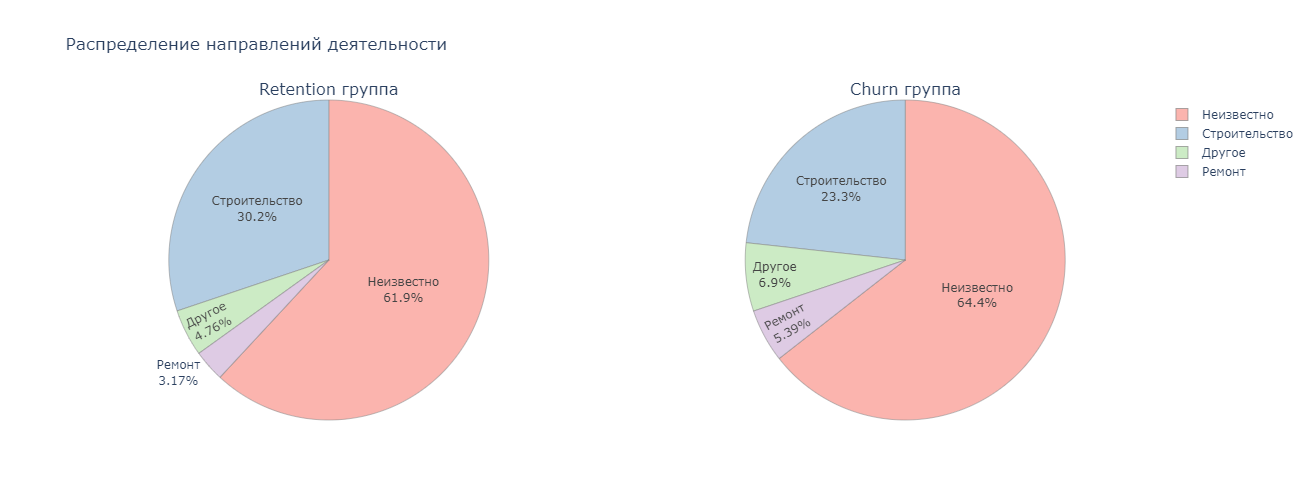

In [151]:
# круговые диаграммы (2)
fig = make_subplots(rows=1, cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Retention группа', 'Churn группа'])
    
fig.add_trace(go.Pie(labels=actual_companies_pt[actual_companies_pt['retention'] == True]['working_category'],
                        values=actual_companies_pt[actual_companies_pt['retention'] == True]['companies'],
                        marker_line_color='#808080',
                        marker_line_width=0.5), 1, 1)
    
fig.add_trace(go.Pie(labels=actual_companies_pt[actual_companies_pt['retention'] == False]['working_category'],
                        values=actual_companies_pt[actual_companies_pt['retention'] == False]['companies'],
                        marker_line_color='#808080',
                        marker_line_width=0.5), 1, 2)

fig.update_layout(title_text='Распределение направлений деятельности',
                    height=500,
                    colorway=px.colors.qualitative.Pastel1 + px.colors.qualitative.Pastel2)

fig.update_traces(textinfo='percent+label')

fig.show()

Мы получили распределение направлений деятельности компаний в абсолютном и относительном плане.\
Отличия в долях не кажутся столь значимыми, разве что в Retention группе доля строительных компаний почти на $7\%$ больше группы Churn. 

<br>

##### Кол-во регистраций компаний в Gectaro по годам

Посмотрим, в каких годах и кварталах сколько регистрировалось компаний групп retention и churn.

Для этого создадим соответствующую сводную таблицу. 

In [152]:
# сводная таблица
year_register_pt = actual_companies_df.groupby([actual_companies_df['created_at'].dt.to_period('Q'), 'retention'])\
                                      .agg(companies=('company_id', 'count'))\
                                      .reset_index()

<br>

Поменяем тип данных, чтобы корректно построить линейный график.

In [153]:
# period[A-DEC] > datetime64[ns]
year_register_pt['created_at'] = year_register_pt['created_at'].dt.to_timestamp()

<br>

Построим два линейных графика.

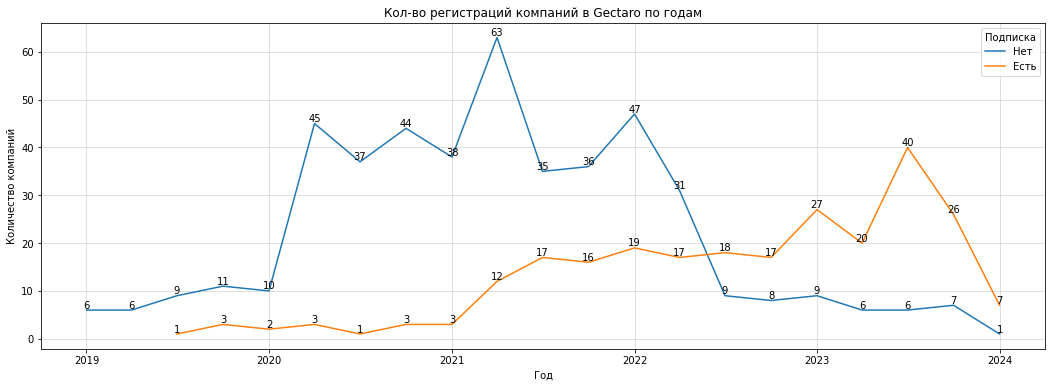

In [154]:
plt.figure(figsize=(18, 6))

# создание линейного графика
ax = sns.lineplot(data=year_register_pt, x='created_at', y='companies', hue='retention')

# добавление числовых значений
for index, row in year_register_pt.iterrows():
    plt.text(row['created_at'], row['companies'], str(row['companies']), ha='center', va='bottom')

plt.title('Кол-во регистраций компаний в Gectaro по годам')
plt.xlabel('Год')
plt.ylabel('Количество компаний')

# легенда
handles, _ = ax.get_legend_handles_labels() 
ax.legend(handles=handles, labels=['Нет', 'Есть'], title='Подписка')

plt.grid(True, alpha=0.5)
plt.show()

График читать так: в первом квартале $2024$ года зарегистрировалось $8$ компаний, у $7$ из них на данный есть подписка Gectaro, а у $1$ — подписки нет.

Объективно по компаниям, у которых на данный момент есть подписка `Gectaro`:
* Видим всплески регистраций компаний:
     * в первом квартале $2023$ года ($27$ регистраций)
     * в третьем квартале $2023$ года ($40$ регистраций)
     
Затем, кажется, в четвёртом квартале $2023$ года, идёт нормальный спад.\
Наконец, в первом квартале $2024$ года, аномальный спад.

Каким числом заканчивается $1$-й квартал $24$ года в истории?

In [155]:
billing_df['created_at'].max()

Timestamp('2024-03-13 10:24:06')

Дата и время: `2024-03-13 10:24:06`.\
Можно сказать, что история захватывает почти весь первый квартал $24$ года.\
Так что списать всё на нехватку половины марта не получится. **У Gectaro действительно есть проблемы**.

<br>

Увеличим масштаб и сделаем то же самое, но начиная с $2023$ года.

In [156]:
# сводная таблица
year2023_register_pt = actual_companies_df[actual_companies_df['created_at'] >= '2023-01-01'].groupby([actual_companies_df['created_at'].dt.to_period('M'), 'retention'])\
                                                                                             .agg(companies=('company_id', 'count'))\
                                                                                             .reset_index()
# period[A-DEC] > datetime64[ns]
year2023_register_pt['created_at'] = year2023_register_pt['created_at'].dt.to_timestamp()

<br>

Сделаем линейные графики.

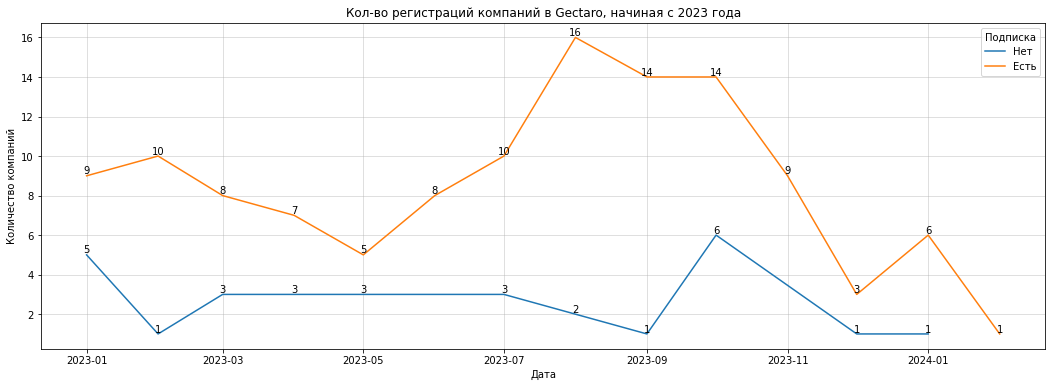

In [157]:
plt.figure(figsize=(18, 6))

# Создание линейного графика
ax = sns.lineplot(data=year2023_register_pt, x='created_at', y='companies', hue='retention')

# Добавление числовых значений
for index, row in year2023_register_pt.iterrows():
    plt.text(row['created_at'], row['companies'], str(row['companies']), ha='center', va='bottom')

plt.title('Кол-во регистраций компаний в Gectaro, начиная с 2023 года')
plt.xlabel('Дата')
plt.ylabel('Количество компаний')

handles, _ = ax.get_legend_handles_labels() 
ax.legend(handles=handles, labels=['Нет', 'Есть'], title='Подписка')

plt.grid(True, alpha=0.5)
plt.show()

Ранее упомянули, что в $4$-м квартале $2023$ года нормальный спад. Но это не так. Ситуация такая:
* В начале $4$-го квартала хороший показатель в $14$ регистраций подписывающихся компаний.
* В середине квартала — спад регистраций.
* В декабре — полный завал, всего $3$ компании.

В феврале и марте $1$-го квартала нынешнего года беспрецедентная засуха в `Gectaro`. Почему компании не хотят регистрироваться?

<br>

##### Количество сотрудников в компаниях

Посмотрим, как распределено количество сотрудников по компаниям групп retention и churn.

Создадим сводную таблицу.

In [158]:
# сводная таблица
comp_emp_pt = actual_companies_df.groupby(['number_of_employees', 'retention'])\
                                 .agg(companies=('company_id', 'count'))\
                                 .reset_index()\
                                 .sort_values(by='companies', ascending=False)

In [159]:
comp_emp_pt

number_of_employees  retention  companies
0                  1-4      False        330
1                  1-4       True        162
12                5-10      False         90
13                5-10       True         56
4                11-20      False         26
5                11-20       True         20
8                21-30      False          9
9                21-30       True          5
10               31-50      False          5
11               31-50       True          4
3              101-200       True          2
6         201 and more      False          2
7         201 and more       True          2
2              101-200      False          1
14              51-100      False          1
15              51-100       True          1

<br>

Отобразим распределение на групповой столбчатой диаграмме.

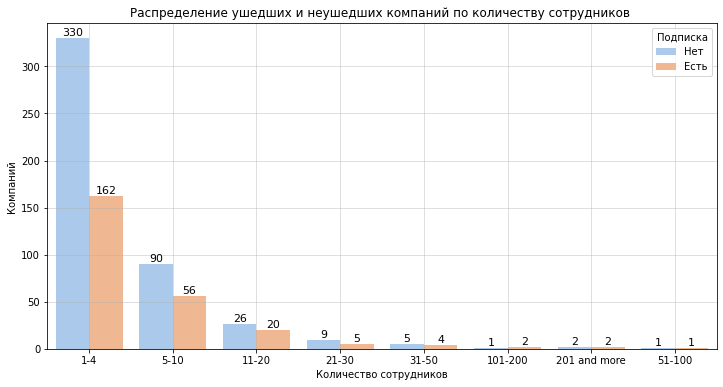

In [160]:
# столбчатая диаграмма
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=comp_emp_pt,
            x='number_of_employees',
            y='companies',
            hue='retention',
            palette='pastel')

# текстовая аннотация над каждой колонкой
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{int(height)}',
            ha='center',
            fontsize=11)

# заголовок и оси
plt.title('Распределение ушедших и неушедших компаний по количеству сотрудников ')
plt.xlabel('Количество сотрудников')
plt.ylabel('Компаний')
plt.grid(True, alpha=0.5)

# легенда
handles, _ = ax.get_legend_handles_labels() 
ax.legend(handles=handles, labels=['Нет', 'Есть'], title='Подписка')

plt.show()

Ожидаемо видеть, что чем меньше людей работает в компании, тем чаще такая компания встречается.

<br>

Отобразим распределение на круговой диаграмме.\
Но сначала нужно подготовить топ-5 категорий, а все остальные определить в категорию "Иное число сотрудников".

In [161]:
# 5 наиболее часто встречающихся категорий
top_categories = comp_emp_pt[comp_emp_pt['retention'] == True][['number_of_employees', 'companies']].nlargest(5, 'companies')

# кол-во компаний не из топ-5
others = comp_emp_pt[comp_emp_pt['retention'] == True][['number_of_employees', 'companies']]['companies'].sum() - top_categories['companies'].sum()

# иное число сотрудников и их компании
others_df = pd.DataFrame({'number_of_employees': 'Иное число сотрудников',
                          'companies': [others]})
    
# объединение топ-5 и других
pie_ret_pt = pd.concat([top_categories, others_df]).reset_index(drop=True)


# 5 наиболее часто встречающихся категорий
top_categories = comp_emp_pt[comp_emp_pt['retention'] == False][['number_of_employees', 'companies']].nlargest(5, 'companies')

# кол-во компаний не из топ-5
others = comp_emp_pt[comp_emp_pt['retention'] == False][['number_of_employees', 'companies']]['companies'].sum() - top_categories['companies'].sum()

# иное число сотрудников и их компании
others_df = pd.DataFrame({'number_of_employees': 'Иное число сотрудников',
                          'companies': [others]})
    
# объединение топ-5 и других
pie_churn_pt = pd.concat([top_categories, others_df]).reset_index(drop=True)

<br>

Построим круговые диаграммы.

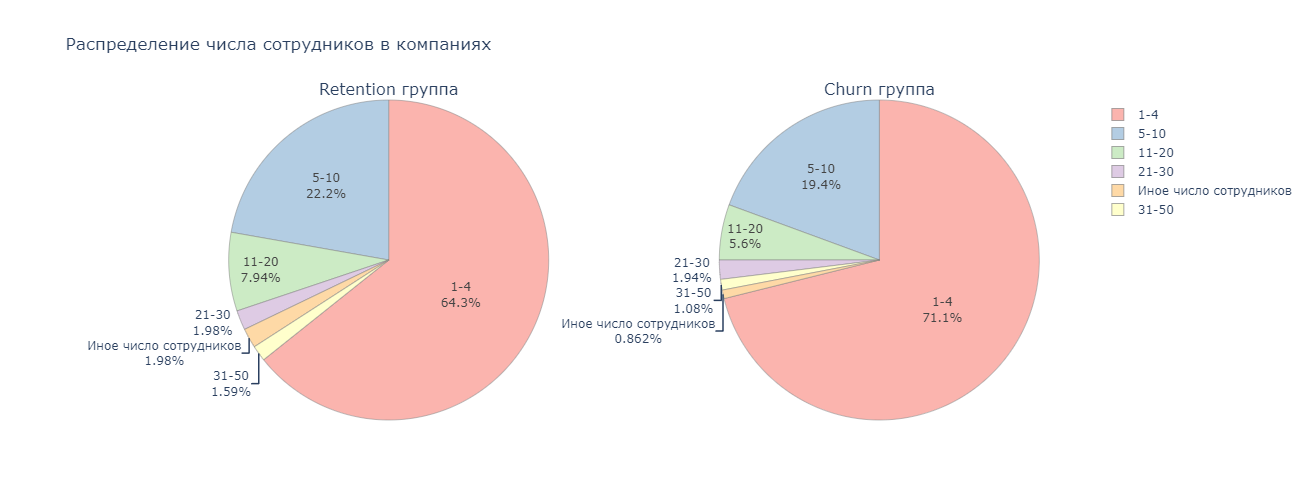

In [162]:
# создание объекта subplots с двумя колонками и одной строкой
fig = make_subplots(rows=1, cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]],       # определение типа диаграммы для каждого subplot
                    subplot_titles=['Retention группа', 'Churn группа'])  # названия для каждого subplot

# добавление первой круговой диаграммы (Retention группа)
fig.add_trace(go.Pie(labels=pie_ret_pt['number_of_employees'],  # Метки секторов
                      values=pie_ret_pt['companies'],           # Значения секторов
                      marker_line_color='#808080',              # Цвет границ секторов
                      marker_line_width=0.5),                   # Ширина границ секторов
              row=1, col=1)  # Указание расположения на первом subplot

# добавление второй круговой диаграммы (Churn группа)
fig.add_trace(go.Pie(labels=pie_churn_pt['number_of_employees'],  # Метки секторов
                      values=pie_churn_pt['companies'],           # Значения секторов
                      marker_line_color='#808080',                # Цвет границ секторов
                      marker_line_width=0.5),                     # Ширина границ секторов
              row=1, col=2)  # Указание расположения на втором subplot

# обновление макета графика
fig.update_layout(title_text='Распределение числа сотрудников в компаниях',               # Заголовок
                  height=500,                                                             # Высота графика
                  colorway=px.colors.qualitative.Pastel1 + px.colors.qualitative.Pastel2) # Цветовая палитра

# обновление параметров секторов диаграммы
fig.update_traces(textinfo='percent+label')  # Отображение процентов и меток на секторах

# отображение графика
fig.show()

Снова видим, что доли не сильно отличаются в обеих группах. Разве что к оттоку скорее склонны компании с количестом сотрудников от $1$ до $4$.\
Стоит отметить, что `Gectaro` на данный момент пользуются в том числе и "тяжеловесные" компании, в которых работают от $101$ человек и выше, таких компаний $4$.\
Ещё $3$ таких же тяжеловесных компаний подверглись оттоку, они больше не с `Gectaro`.\
В общем, в процентном соотношении группа retention всё-таки помощнее будет.

<br>

<br>

## Итоговая рефлексия

### Введение и сегментирование компаний

В сервисе `Gectaro` упоминается $1841$ компания, об этом говорит таблица `billings`.

Но в анализе участвовало всего $716$ компаний, это $38.9\%$ от всего числа.\
Такой сильный срез из-за того, что именно по этому числу компаний есть информация во всех таблицах, а не только в таблице со счётами `billings`.\
По состоянию на `28.03.24` $464$ компаний из $716$ не имеют подписки `Gectaro` и считаются ушедшими, а у остальных $252$ есть подписка.

<span style="font-weight: 600">Неушедшие компании (у которых действует подписка) будем относить к группе retention, а ушедшие (у которых кончилась подписка) — к группе churn</span>.

Есть $2$ самые активные компании, их ID — $1255$ и $1088$. Они были активны $46$ месяцев.

Этот график показывает количество компаний, которые были упомянуты в таблице `activities` за каждый месяц.

Наблюдаем активность компаний в следующем промежутке времени: $01.2019 - 03.2024$.\
Вероятно всего, столько и существует сервис `Gectaro` — $5$ лет и $2$ месяца.

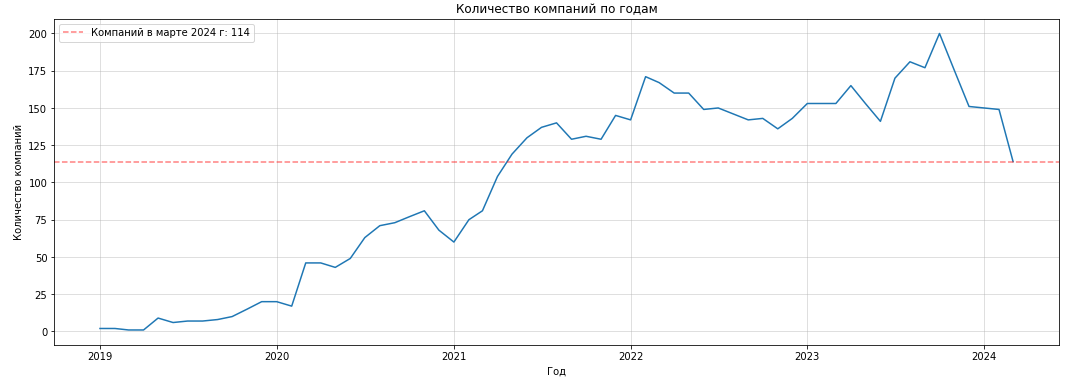

Сервис здорово оброс компаниями за всё время его существования.\
Но видна та самая проблема оттока клиентов: начиная с $3$ квартала заметен приличный спад количества компаний, пользующихся сервисом.\
Сервис опустился на уровень конца первого квартала $2021$ года.

<br>

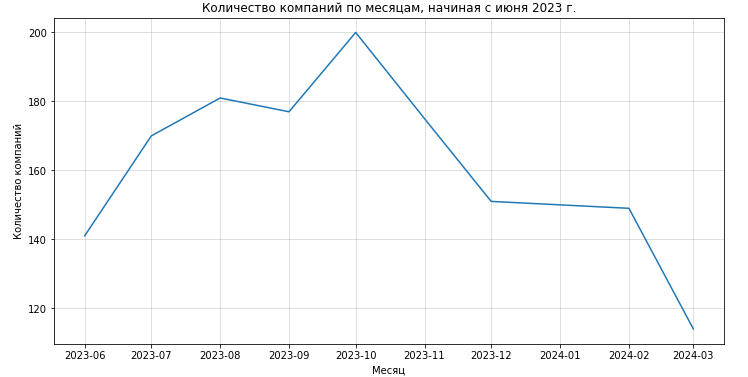

Ещё в октябре $2023$ года `Gectaro` был на пике. Затем спад в ноябре, декабре и, наконец, в марте.

<br>

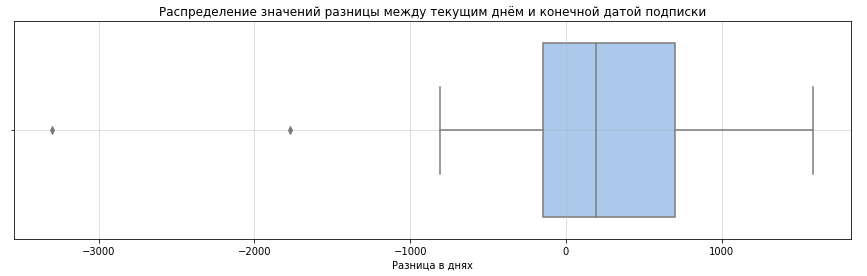

По этой диаграмме размаха можно понять, является ли компания клиентом `Gectaro` на данный момент, или уже нет.\
Всё, что за нулём — компании с подпиской. Всё, что после нуля — компании, у которых подписки уже нет.\
Как видно, внутри межквартильного размаха есть компании, имеющие подписку. Среди $716$ компаний всего $35.2\%$ компаний с подпиской.\
"Выдающихся" компаний всего $2$. У них подписка оформлена на очень долгий срок.

<br>

<br>

<br>

### Идентификация проблемы

#### Кол-во регистраций компаний в Gectaro по годам

Линейные графики покажут, как компании регистрировались в Gectaro в течение всей истории сервиса.

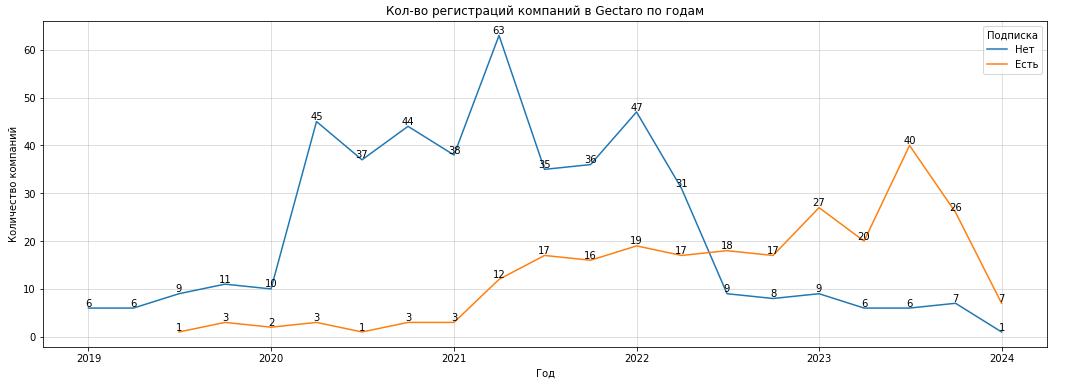

График читать так: в первом квартале $2024$ года зарегистрировалось $8$ компаний, у $7$ из них на данный есть подписка Gectaro, а у $1$ — подписки нет.

Объективно по компаниям, у которых на данный момент есть подписка `Gectaro`:
* Видим всплески регистраций компаний:
     * в первом квартале $2023$ года ($27$ регистраций)
     * в третьем квартале $2023$ года ($40$ регистраций)
     
Затем, в первом квартале $2024$ года, аномальный спад.

В логах хронология `Gectaro` кончается этой датой и временем: `2024-03-13 10:24:06`.\
Можно сказать, что история захватывает почти весь первый квартал $24$ года.\
Так что списать всё на нехватку половины марта не получится.

<span style='font-weight: 600'>Мы установили, что у Gectaro действительно есть проблемы.</span>

<br>

#### Кол-во регистраций компаний в Gectaro, начиная с 2023 года

Этот масштабированный график показывает, что проблемы видны в $4$-м квартале $2023$ года:

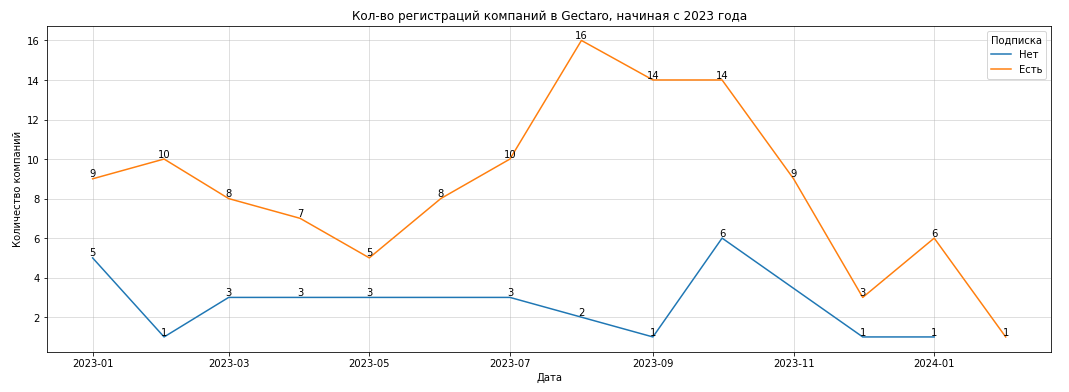

* В начале $4$-го квартала хороший показатель в $14$ регистраций подписывающихся компаний.
* В середине квартала — спад регистраций.
* В декабре — беспрецедентный полный завал, всего $3$ компании.

<span style='font-weight: 600'>В феврале и марте $1$-го квартала нынешнего года беспрецедентная засуха в `Gectaro`. Почему компании не хотят регистрироваться?</span>

<br>

<br>

<br>

### Активности компаний внутри сервиса

#### Суммы активностей каждой компании за все месяцы

##### Выраженные диаграммами размаха

Просуммировав все значения каждой переменной-активности за все месяцы и для каждой компании, мы получили распределения для компаний групп retention и churn.

В нормальных диапазонах диаграмм размаха учитываются значения, которые входят в $90\%$ значений. Остальные $10\%$ значений выражены выбросами.

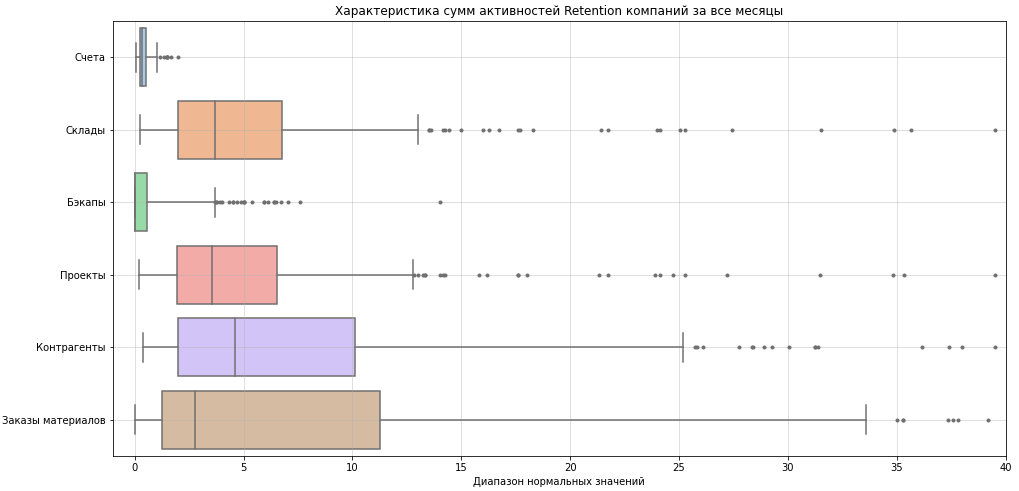

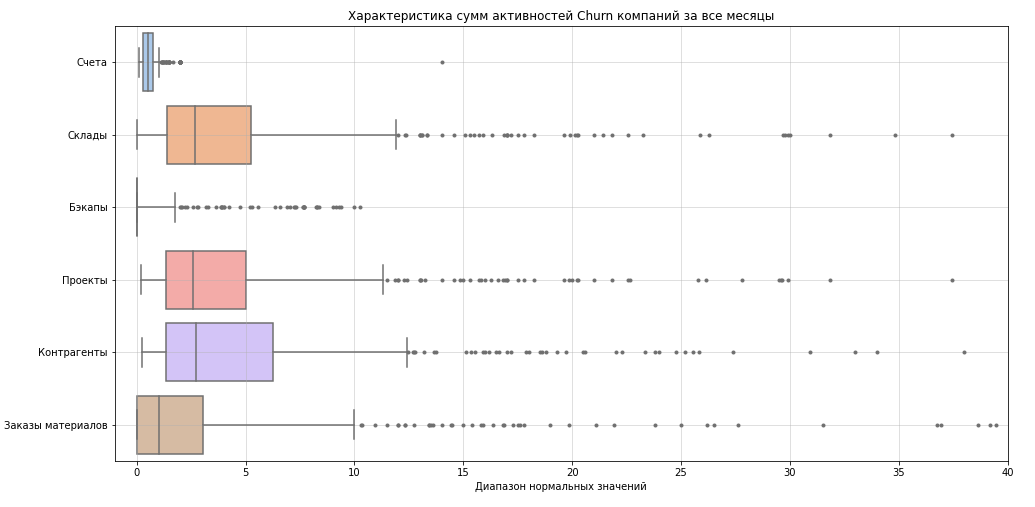

В глаза сильно бросается, что заказов материалов и контрагентов в группе retention значительно больше, чем в группе churn.

<span style="font-weight: 600">Выходит, заметна связь между уходом компании и количеством контрагентов и заказов материалов.\
У отточных компаний не много контрагентов и заказов материалов, а скорее недостаток того и другого. Это их отличает от тех, кто предпочитает остаться в Gectaro.</span>

<br>

##### Корреляция переменных

Среди всех переменных-активностей в обеих группах есть корреляция только между двумя показателями: количеством складов и количеством проектов.\
Наблюдается идеальная линейная зависимость между двумя этими переменными, так как коэффициент корреляции равен или крайне близок к $1$.\
Это значит, что чем выше количество складов, тем выше количество проектов, и наоборот.

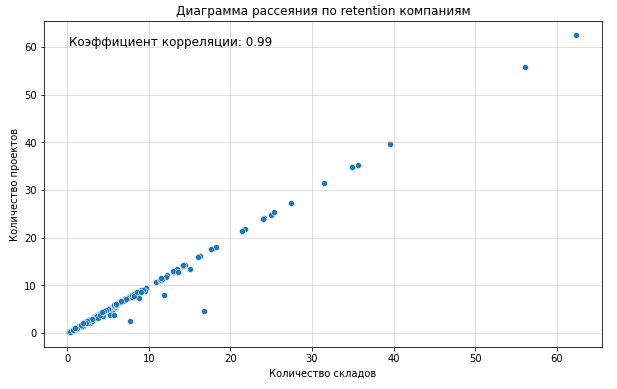

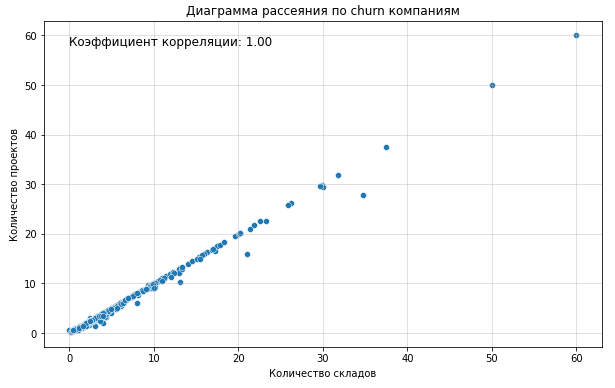

<br>

<br>

#### Суммы активностей всех компании за каждый месяц

##### Выраженные диаграммами с областями

Мы суммировали значения всех компаний по каждой переменной-активности за каждый месяц как для retention, так и для churn группы.\
Здесь мы выразим это диаграммами с областями.

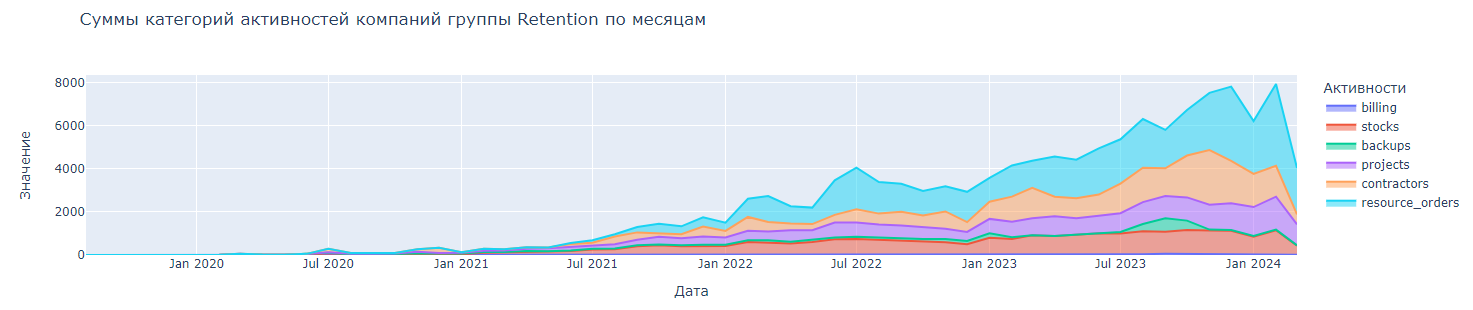

Чем ближе дата к сегодняшней, тем больше активностей проявляют компании, у которых есть подписка, что логично.

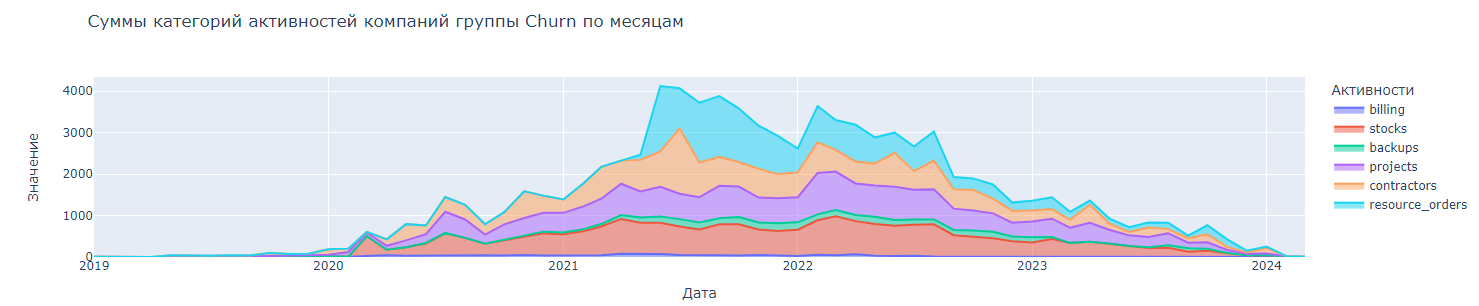

Компании, подписка которых исчерпалась, имеют пик активностей на середине истории Gectaro, в период с середины 2021 по середину 2022 года.\
Эти два графика создают впечатление, что срок жизни компаний внутри сервиса имеют цикл, и рано или поздно одни компании сменяют другие.

<br>

##### Суммы активностей, выраженные нормированными диаграммами с областями

Эти диаграммы показывают изменения вклада каждой категории-активности с течением времени.

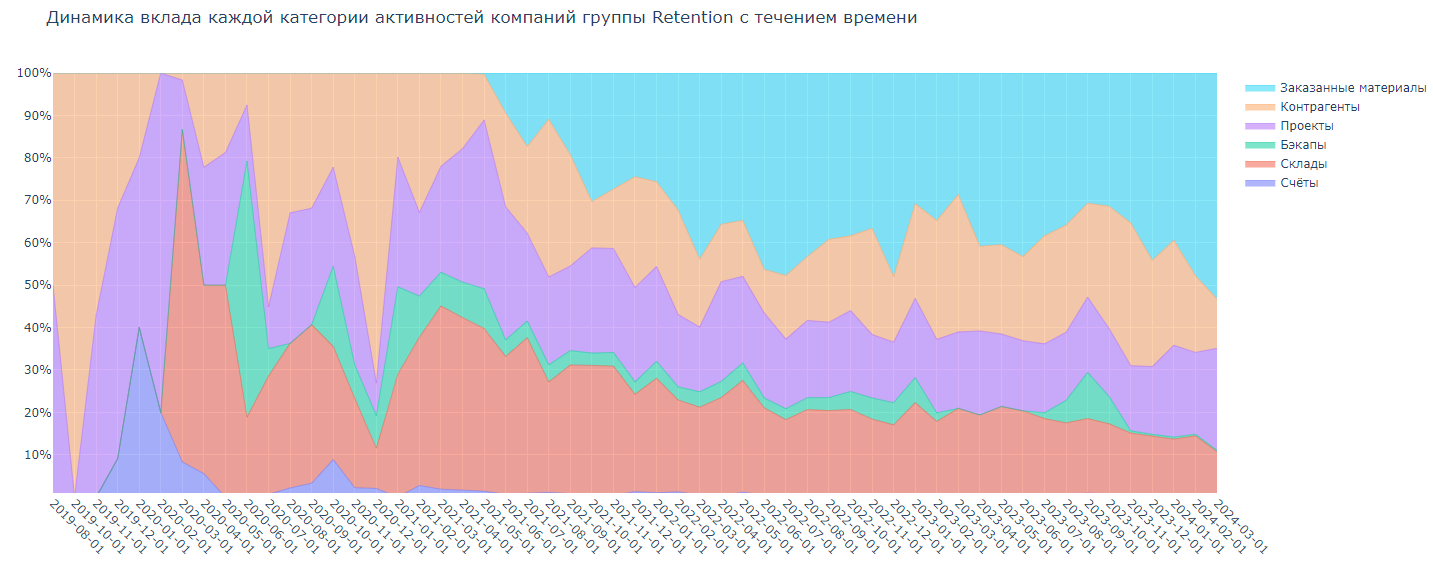

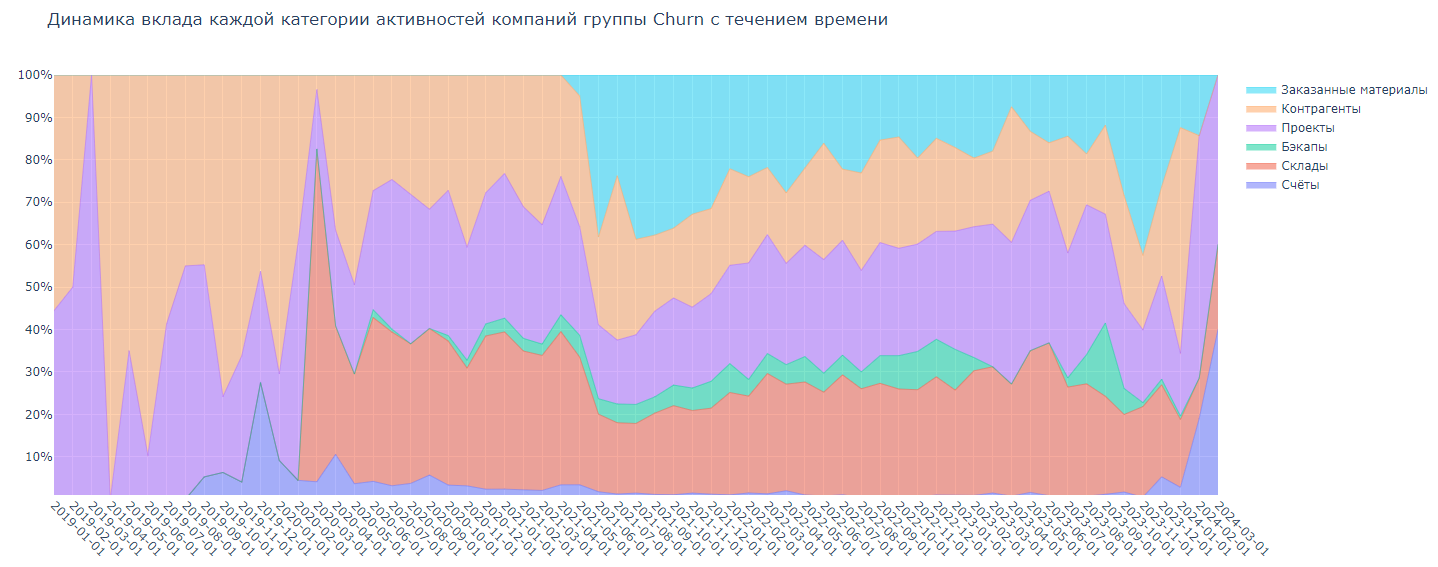

Среди двух этих графиков однозначно можно сказать одно: функцию заказа материалов ввели в мае $2021$ года.

Области активностей компаний группы Retention кажутся более сглаженными, сбалансированными, начиная с того момента, когда ввели эту фичу заказа материалов.\
Кроме того, эта функция занимает львиную долю у этих компаний.

Области группы Churn после введения заказа материалов выглядят более рваными и менее сбалансированными: доля заказов материалов мала, доля контрагентов чуть больше, а доля проектов велика.

<span style="font-weight: 600">Таким образом, нормированные диаграммы с областями показывают, что компании группы Churn не могут поймать свой лейтмотив, свою волну, то ли из-за того, что не знают, чего хотят от сервиса, то ли из-за того, что сервис им не подходит, а то ли из-за трудностей внутри компании.</span>

<br>

<br>

<br>

### Тарифы

Столбчатые диаграммы показывают, какими категориями тарифов пользуются компании обеих групп.

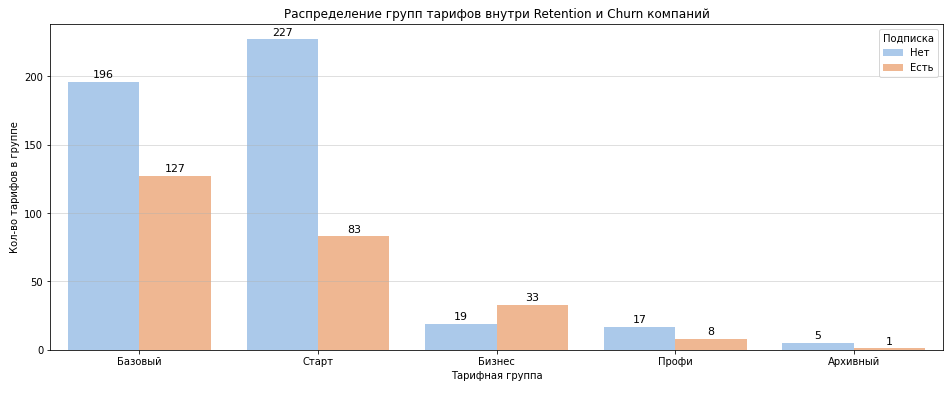

Круговые диаграммы показывают доли пользования разными категориями тарифов.

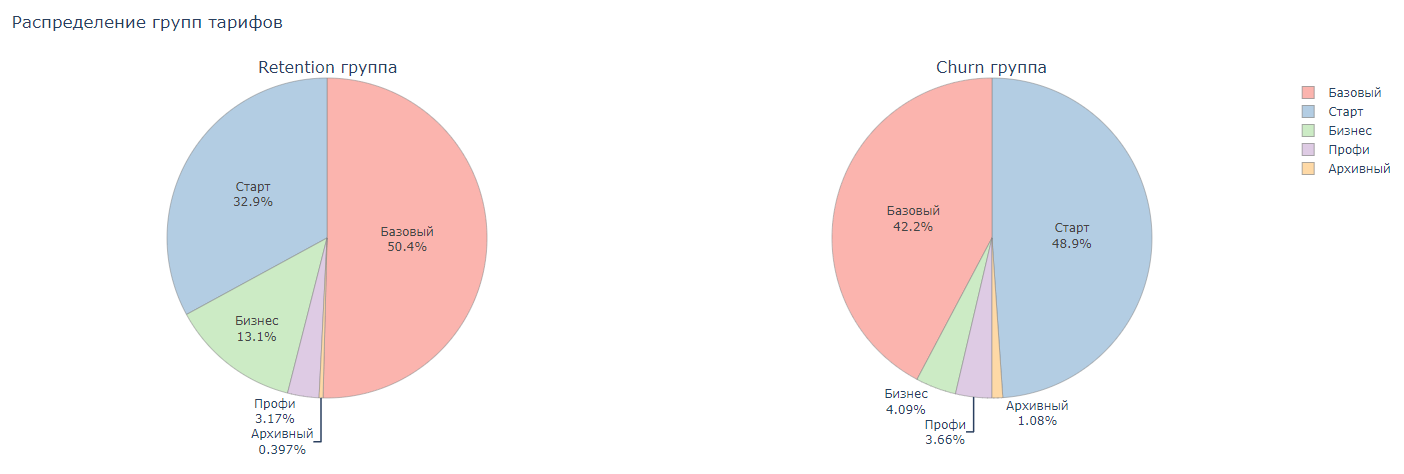

<span style="font-weight: 600">Какими тарифами пользуются компании, у которых действует подписка Gectaro на данный момент:</span>
1. Базовый ($127$ компаний, $50.4\%$ от всех внутри retention)
2. Старт ($83$ компаний, $32.9\%$)
3. Бизнес ($33$ компании, $13.1\%$)
4. Профи ($8$ компаний, $3.17\%$)
5. Архивный ($1$ компания, $0.39\%$)

<span style="font-weight: 600">Какими последними тарифами пользовались компании, у которых нет подписки Gectaro на данный момент:</span>
1. Старт ($227$ компаний, $48.9\%$ от всех внутри churn)
2. Базовый ($196$ компаний, $42.2\%$)
3. Бизнес ($19$ компании, $4.09\%$)
4. Профи ($17$ компаний, $3.66\%$)
5. Архивный ($5$ компаний, $1.08\%$)

Есть отличия в распределении долей групп retention и churn по тарифам базовый, старт, бизнес.

Компании группы retention больше предпочитают пользоваться базовой версией, она дороже и даёт больше возможностей пользующейся компании.\
Если смотреть на тариф бизнес, то этих компаний в процентном соотношений больше в retention, чем в churn группе.\
Самая большая доля у Churn компаний — это тарифы категории старт. Компании, которой впервые в сервисе Gectaro, логично попробовать сначала самую стартовую подписку для ознакомления с сервисом, прежде чем подумать о другой.

<span style="font-weight: 600">Значит, компании чаще всего уходят с тарифа Старт.</span>

<br>

<br>

<br>

### Направление деятельности

Столбчатые диаграммы показывают, каково направление деятельности компаний обеих групп.

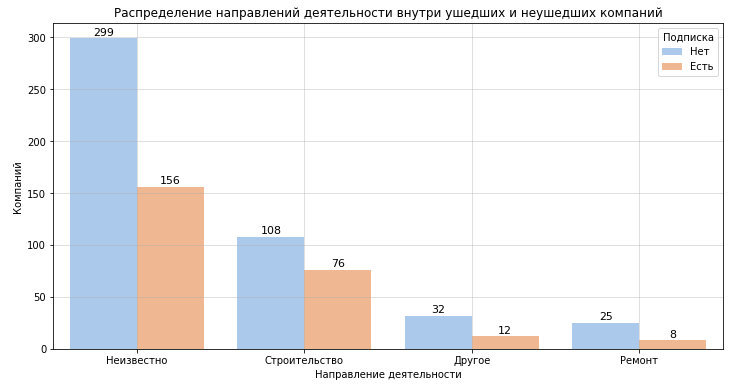

<br>

Круговые диаграммы показывают доли деятельностей компаний.

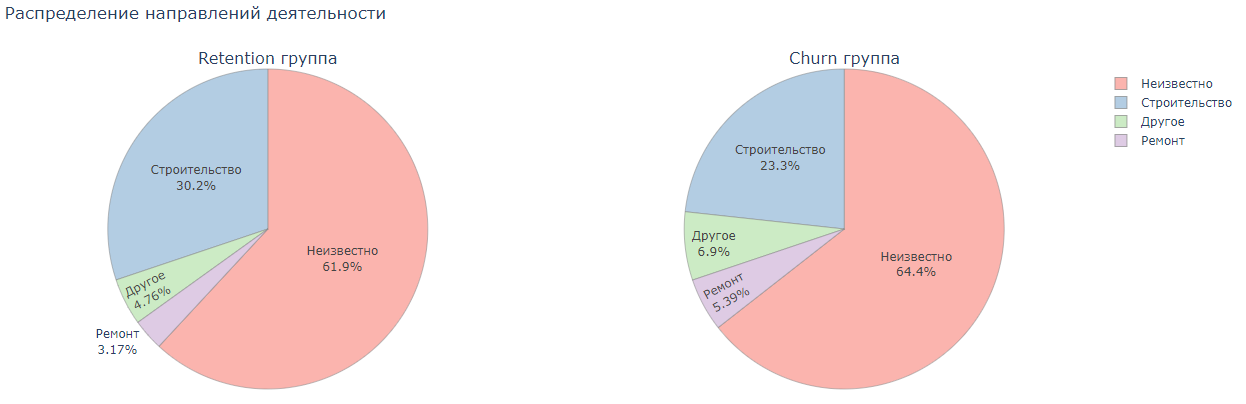

Мы получили распределение направлений деятельности компаний в абсолютном и относительном плане.\
Отличия в долях не кажутся столь значимыми, разве что в Retention группе доля строительных компаний почти на $7\%$ больше группы Churn.

<span style="font-weight: 600">В общем, направление деятельности компаний, которые чаще всего уходят, неизвестно.</span>

<br>

<br>

<br>

### Число сотрудников в компаниях

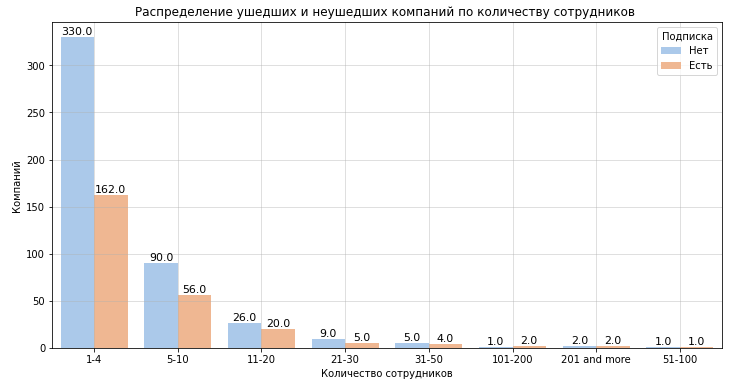

Ожидаемо видеть, что чем меньше людей работает в компании, тем чаще такая компания встречается.

<br>

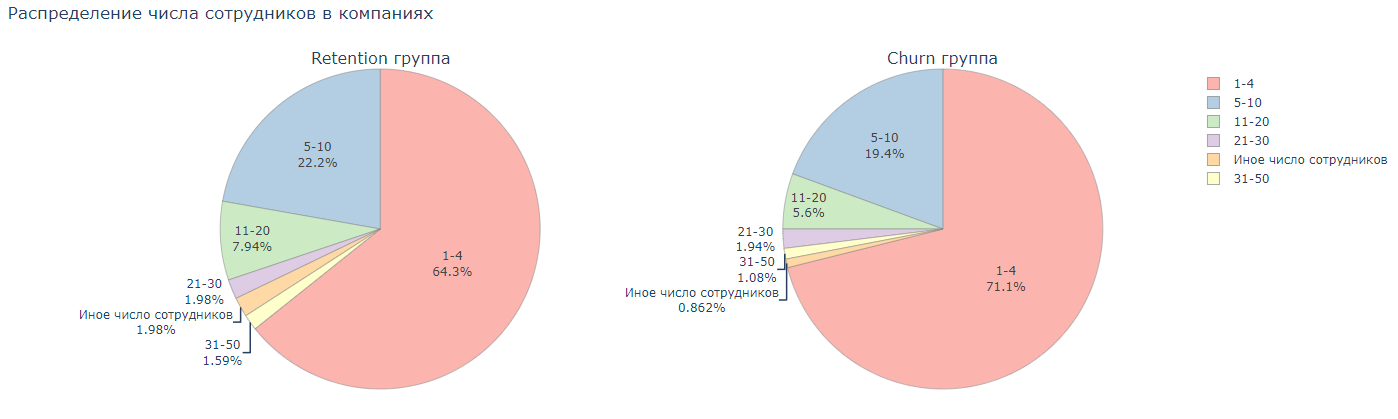

Снова видим, что доли не сильно отличаются в обеих группах. Разве что к оттоку скорее склонны компании с количестом сотрудников от $1$ до $4$.\
Стоит отметить, что `Gectaro` на данный момент пользуются в том числе и "тяжеловесные" компании, в которых работают от $101$ человек и выше, таких компаний $4$.\
Ещё $3$ таких же тяжеловесных компаний подверглись оттоку, они больше не с `Gectaro`.\
В процентном соотношении группа retention всё-таки помощнее будет.

<span style='font-weight: 600'>В общем, к оттоку стремится скорее такая компания, у которой число сотрудников от 1 до 4.</span>

<br>

<br>

<br>

### Итог

Итак, из $1841$ компаний был проведён исследовательский анализ $716$ компаний, что составляет $38.9\%$ от всего числа.\
Учитывалась вся история сервиса `Gectaro`, которая длится уже $5$ лет и $2$ месяца.

Мы обрисовали компанию, которая имеет тенденцию к оттоку:
1. У неё не много контрагентов и заказов материалов, а скорее недостаток того и другого.
2. Нет баланса в её деятельности внутри сервиса, не может поймать волну, лейтмотив: то ли из-за того, что не знает, чего хочет от сервиса, то ли из-за того, что сервис ей не подходит, а то ли из-за трудностей внутри неё.
3. Она чаще уходит с тарифа Старт.
4. Направление в её деятельности неизвестно.
5. Число сотрудников у неё от $1$ до $4$.

Представитель от `Gectaro`, важная ремарка для вас. Все эти пункты — не догма. В том числе и потому, что возникали трудности в анализе.

Сложности возникали из-за:
1. Плохой культуры хранения данных:
    1. Вы сами не знаете что означают некоторые колонки в ваших таблицах из-за того, что нет строгого алгоритма и строгой связи заполнения их данными.
    2. Вероятно, данные несвоевременно заполняются информацией о новых компаниях, потому что информация о $61.1\%$ компаний просто отсутствует:
        1. неизвестно, как они вели свою активность в сервисе;
        2. ничего неизвестно о их деятельности, их сотрудниках, дате их создания в сервисе.  
2. Скудной документации.
3. Отсутствия обратной связи от заказчика.

Жёсткому диску с фрагментированными файлами сложно выполнять свою работу, поэтому ПК будет сбоить.\
Этой метафорой можно охарактеризовать данное исследование.\
Так что сначала нужно решить проблемы первостепенные, а затем приступать к анализу своей целевой аудитории.

Рекомендации:
1. Задуматься о найме инженера данных старшего грейда, который бы пересмотрел культуру хранения ваших данных.
2. Затем написать чёткую документацию к вашим таблицам, чтобы было понятно человеку прохожему.

А компанию, стремящуюся к оттоку, обрисовали. Таким образом, у вас есть информация, которую можно обдумать внутри ваших отделов.